<a href="https://colab.research.google.com/github/jane-kirina/python_for_ds_and_ml_tasks/blob/main/module_1/topic_2/HW_1_2_Credit_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Імпорт необхідних бібліотек

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

# Імпорт даних

Вмонтуємо наш диск, якщо Ви працюєте в Google Colab. Якщо працюєте локально, пропустіть наступну клітинку.

In [241]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Знайдемо, де лежать наші файли з даними. В мене вони знаходяться тут:

In [242]:
!ls drive/MyDrive/Colab_Notebooks/_DLA_/module_1/data

application_data.csv.zip	columns_description.csv
application_data_processed.zip	previous_application.csv.zip


Зчитуємо дані.

In [243]:
df = pd.read_csv("drive/MyDrive/Colab_Notebooks/_DLA_/module_1/data/application_data.csv.zip")

In [244]:
# Огляд декількох записів з датафрейму
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         202500.00   406597.50     24700.50   
1               N             0         270000.00  1293502.50     35698.50   
2               Y             0          67500.00   135000.00      6750.00   
3               Y             0         135000.00   312682.50     29686.50   
4               Y             0         121500.00   513000.00     21865.50   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        351000.00   Unaccompanied          Working   
1       1129500.00          Family    State servant   
2        135000.00   Unaccompanied          Working   
3        297000.00   Unaccompanied          Working   
4        513000.00   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                        0.02       -9461           -637           -3648.00   
1                        0.00      -16765          -1188           -1186.00   
2                        0.01      -19046           -225           -4260.00   
3                        0.01      -19005          -3039           -9833.00   
4                        0.03      -19932          -3038           -4311.00   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531        26.00           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.00   
1                 1           1           0      Core staff             2.00   
2                 1           1           0        Laborers             1.00   
3                 1           0           0        Laborers             2.00   
4                 1           0           0      Core staff             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

# Перевірка структури даних

In [245]:
df.shape

(307511, 122)

Маємо ~307k рядків та 122 колонки.

## Статистичний звіт для числових змінних

In [246]:
df.describe()

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count   307511.00 307511.00     307511.00         307511.00   307511.00   
mean    278180.52      0.08          0.42         168797.92   599026.00   
std     102790.18      0.27          0.72         237123.15   402490.78   
min     100002.00      0.00          0.00          25650.00    45000.00   
25%     189145.50      0.00          0.00         112500.00   270000.00   
50%     278202.00      0.00          0.00         147150.00   513531.00   
75%     367142.50      0.00          1.00         202500.00   808650.00   
max     456255.00      1.00         19.00      117000000.00  4050000.00   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count    307499.00        307233.00                   307511.00   307511.00   
mean      27108.57        538396.21                        0.02   -16037.00   
std       14493.74        369446.46                        0.01     4363.99   
min        1615.50         40500.00                        0.00   -25229.00   
25%       16524.00        238500.00                        0.01   -19682.00   
50%       24903.00        450000.00                        0.02   -15750.00   
75%       34596.00        679500.00                        0.03   -12413.00   
max      258025.50       4050000.00                        0.07    -7489.00   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
count      307511.00          307511.00        307511.00    104582.00   
mean        63815.05           -4986.12         -2994.20        12.06   
std        141275.77            3522.89          1509.45        11.94   
min        -17912.00          -24672.00         -7197.00         0.00   
25%         -2760.00           -7479.50         -4299.00         5.00   
50%         -1213.00           -4504.00         -3254.00         9.00   
75%          -289.00           -2010.00         -1720.00        15.00   
max        365243.00               0.00             0.00        91.00   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count   307511.00       307511.00        307511.00         307511.00   
mean         1.00            0.82             0.20              1.00   
std          0.00            0.38             0.40              0.04   
min          0.00            0.00             0.00              0.00   
25%          1.00            1.00             0.00              1.00   
50%          1.00            1.00             0.00              1.00   
75%          1.00            1.00             0.00              1.00   
max          1.00            1.00             1.00              1.00   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count   307511.00   307511.00        307509.00             307511.00   
mean         0.28        0.06             2.15                  2.05   
std          0.45        0.23             0.91                  0.51   
min          0.00        0.00             1.00                  1.00   
25%          0.00        0.00             2.00                  2.00   
50%          0.00        0.00             2.00                  2.00   
75%          1.00        0.00             3.00                  2.00   
max          1.00        1.00            20.00                  3.00   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                    307511.00                307511.00   
mean                          2.03                    12.06   
std                           0.50                     3.27   
min                           1.00                     0.00   
25%                           2.00                    10.00   
50%                           2.00                    12.00   
75%                           2.00                    14.00   
max                           3.00                    23.00   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                   307511

# Аналіз категоріальних змінних

In [247]:
df.select_dtypes(include = "object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [248]:
# Перевірка кількості категоріальних змінних
len(df.select_dtypes(include = "object").columns)

16

Дані містять 16 `categorical` змінних

# Аналіз числових змінних

In [249]:
number_df = df.select_dtypes(include="number")

In [250]:
number_df.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [251]:
# Перевірка кількості числових змінних
len(number_df.columns)

106

Дані міcтять 106 `numerical` змінних

In [252]:
number_df.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0         202500.00   406597.50   
1      100003       0             0         270000.00  1293502.50   
2      100004       0             0          67500.00   135000.00   
3      100006       0             0         135000.00   312682.50   
4      100007       0             0         121500.00   513000.00   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0     24700.50        351000.00                        0.02       -9461   
1     35698.50       1129500.00                        0.00      -16765   
2      6750.00        135000.00                        0.01      -19046   
3     29686.50        297000.00                        0.01      -19005   
4     21865.50        513000.00                        0.03      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0           -637           -3648.00            -2120          NaN           1   
1          -1188           -1186.00             -291          NaN           1   
2           -225           -4260.00            -2531        26.00           1   
3          -3039           -9833.00            -2437          NaN           1   
4          -3038           -4311.00            -3458          NaN           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0             1.00                     2                            2   
1             2.00                     1                            1   
2             1.00                     2                            2   
3             2.00                     2                            2   
4             1.00                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0          0.08          0.26          0.14            0.02              0.04   
1          0.31          0.62           NaN            0.10              0.05   
2           NaN          0.56          0.73             NaN               NaN   
3           NaN          0.65           NaN             NaN               NaN   
4           NaN          0.32           NaN             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COM

# Робота з некоректними типами даних

Перевірка, чи немає у нас стовпця з неправильним типом даних

In [253]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64
FLAG_PHONE                        int64
FLAG_EMAIL                        int64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
WEEKDAY_APPR_PROCESS_START       object
HOUR_APPR_PROCESS_START           int64
REG_REGION_NOT_LIVE_REGION        int64
REG_REGION_NOT_WORK_REGION        int64
LIVE_REGION_NOT_WORK_REGION       int64
REG_CITY_NOT_LIVE_CITY            int64
REG_CITY_NOT_WORK_CITY            int64
LIVE_CITY_NOT_WORK_CITY           int64
ORGANIZATION_TYPE                object
EXT_SOURCE_1                    float64
EXT_SOURCE_2                    float64
EXT_SOURCE_3                    float64
APARTMENTS_AVG                  float64
BASEMENTAREA_AVG                float64
YEARS_BEGINEXPLUATATION_AVG     float64
YEARS_BUILD_AVG                 float64
COMMONAREA_AVG                  float64
ELEVATORS_AVG                   float64
ENTRANCES_AVG                   float64
FLOORSMAX_AVG                   float64
FLOORSMIN_AVG                   float64
LANDAREA_AVG                    float64
LIVINGAPARTMENTS_AVG            float64
LIVINGAREA_AVG                  float64
NONLIVINGAPARTMENTS_AVG         float64
NONLIVINGAREA_AVG               float64
APARTMENTS_MODE                 float64
BASEMENTAREA_MODE               float64
YEARS_BEGINEXPLUATATION_MODE    float64
YEARS_BUILD_MODE                float64
COMMONAREA_MODE                 float64
ELEVATORS_MODE                  float64
ENTRANCES_MODE                  float64
FLOORSMAX_MODE                  float64
FLOORSMIN_MODE                  float64
LANDAREA_MODE                   float64
LIVINGAPARTMENTS_MODE           float64
LIVINGAREA_MODE                 float64
NONLIVINGAPARTMENTS_MODE        float64
NONLIVINGAREA_MODE              float64
APARTMENTS_MEDI                 float64
BASEMENTAREA_MEDI               float64
YEARS_BEGINEXPLUATATION_MEDI    float64
YEARS_BUILD_MEDI                float64
COMMONAREA_MEDI                 float64
ELEVATORS_MEDI                  float64
ENTRANCES_MEDI                  float64
FLOORSMAX_MEDI                  float64
FLOORSMIN_MEDI                  float64
LANDAREA_MEDI                   float64
LIVINGAPARTMENTS_MEDI           float64
LIVINGAREA_MEDI                 float64
NONLIVINGAPARTMENTS_MEDI        float64
NONLIVINGAREA_MEDI              float64
FONDKAPREMONT_MODE               object
HOUSETYPE_MODE                   object
TOTALAREA_MODE                  float64
WALLSMATERIAL_MODE               object
EMERGENCYSTATE_MODE              object
OBS_30_CNT_SOCIAL_CIRCLE        float64
DEF_30_CNT_SOCIAL_CIRCLE        float64
OBS_60_CNT_SOCIAL_CIRCLE        float64
DEF_60_CNT_SOCIAL_CIRCLE        float64
DAYS_LAST_PHONE_CHANGE          float64
FLAG_DOCUMENT_2                   int64
FLAG_DOCUMENT_3                   int64
FLAG_DOCUMENT_4                   int64
FLAG_DOCUMENT_5                   int64


Дивлячись на дані та відповідні їм типи даних, можна змінити

1.   Елемент списку
2.   Елемент списку

тип стовпчика SKU.

In [254]:
df['SK_ID_CURR'] = df['SK_ID_CURR'].astype("str")

Також ми можемо змінити всі стовпці `flag` на тип даних, який є більш економний для зберігання.

Ось скільки пам'яті в Мб займають наші дані зараз.

In [255]:
df.memory_usage().sum()/1024/1024

np.float64(286.22710037231445)

Отже, ми можемо потенційно заощадити 57 Мб пам'яті! І трансформувати наш фрейм даних буде простіше. Давайте змінимо тип.


In [256]:
flag_cols = ['flag' in col.lower() for col in df.columns]

In [257]:
df[df.columns[flag_cols]].head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            N               Y           1               1                0   
1            N               N           1               1                0   
2            Y               Y           1               1                1   
3            N               Y           1               1                0   
4            N               Y           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                 1           1           0                0                1   
1                 1           1           0                0                1   
2                 1           1           0                0                0   
3                 1           0           0                0                1   
4                 1           0           0                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                1                0                 0                 0   

   FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0

In [258]:
df[df.columns[flag_cols]].nunique()

FLAG_OWN_CAR        2
FLAG_OWN_REALTY     2
FLAG_MOBIL          2
FLAG_EMP_PHONE      2
FLAG_WORK_PHONE     2
FLAG_CONT_MOBILE    2
FLAG_PHONE          2
FLAG_EMAIL          2
FLAG_DOCUMENT_2     2
FLAG_DOCUMENT_3     2
FLAG_DOCUMENT_4     2
FLAG_DOCUMENT_5     2
FLAG_DOCUMENT_6     2
FLAG_DOCUMENT_7     2
FLAG_DOCUMENT_8     2
FLAG_DOCUMENT_9     2
FLAG_DOCUMENT_10    2
FLAG_DOCUMENT_11    2
FLAG_DOCUMENT_12    2
FLAG_DOCUMENT_13    2
FLAG_DOCUMENT_14    2
FLAG_DOCUMENT_15    2
FLAG_DOCUMENT_16    2
FLAG_DOCUMENT_17    2
FLAG_DOCUMENT_18    2
FLAG_DOCUMENT_19    2
FLAG_DOCUMENT_20    2
FLAG_DOCUMENT_21    2
dtype: int64

Типи даних в pandas взяті з numpy, і ось тут список всіх типів даних в numpy:

https://numpy.org/doc/stable/user/basics.types.html

Кожен тип даних займає певну кількість байт у пам'яті. Давайте з'ясуємо, скільки займає 1 тип int8 та 1 тип int64 і скільки пам'яті ми заощадимо, якщо змінимо тип.

In [259]:
import numpy as np
from sys import getsizeof

In [260]:
getsizeof(np.int64(1))

32

In [261]:
getsizeof(np.int8(1))

25

In [262]:
7 * df.shape[0] * sum(flag_cols) / 1024 / 1024

57.48000717163086

In [263]:
str_flag_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [264]:
for col in str_flag_cols:
  df[col] = np.where(df[col]=='Y', 1, 0)

In [265]:
df[str_flag_cols].nunique()

FLAG_OWN_CAR       2
FLAG_OWN_REALTY    2
dtype: int64

In [266]:
df[df.columns[flag_cols]] = df[df.columns[flag_cols]].astype('int8')

In [267]:
df.memory_usage().sum()/1024/1024

np.float64(228.7470932006836)

# Робота з пропущеними значеннями

Найпростіше емпіричне правило для опрацювання пропущених значень: якщо пропущених значень більше за 40% - видаляємо колонку, якщо менше за 40% - аналізуємо, як можна заповнити і чи треба.

Зазвичай, якщо відсоток пропущених даних більший за 10 і немає чіткої (яка значно виділяється) моди (найчастішого) значення в даних, то лишаємо дані як є до використання методів машинного навчання. Далі якщо метод вимагає заповення пропущених значень, можемо експериментувати із заповеннями. Також хорошою практикою є створити окрему колонку-флаг (0/1), яка вказує, де були пропущені значення - це буде додаткова ознака для моделі.


Перевіримо, чи немає нульових значень в нашому наборі даних

In [268]:
df.isnull().values.any()

np.True_

Порахуємо загальну кількість нульових значень в наборі даних

In [269]:
df.isnull().values.sum()

np.int64(9152465)

Сформуємо список із стовпців з нульовими значеннями

In [270]:
df.columns[df.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [271]:
len(df.columns[df.isnull().any()])

67

Усього `67` стовпців мають одне або більше NULL-значень в даних

## Кількість та відсоток пропущених значень у стовпцях

In [272]:
null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)

In [273]:
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)

In [274]:
null_df.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
48                 COMMONAREA_AVG      214865            69.87
62                COMMONAREA_MODE      214865            69.87
76                COMMONAREA_MEDI      214865            69.87
84       NONLIVINGAPARTMENTS_MEDI      213514            69.43
70       NONLIVINGAPARTMENTS_MODE      213514            69.43
56        NONLIVINGAPARTMENTS_AVG      213514            69.43
86             FONDKAPREMONT_MODE      210295            68.39
54           LIVINGAPARTMENTS_AVG      210199            68.35
82          LIVINGAPARTMENTS_MEDI      210199            68.35
68          LIVINGAPARTMENTS_MODE      210199            68.35
66                 FLOORSMIN_MODE      208642            67.85
52                  FLOORSMIN_AVG      208642            67.85
80                 FLOORSMIN_MEDI      208642            67.85
47                YEARS_BUILD_AVG      204488            66.50
61               YEARS_BUILD_MODE      204488            66.50
75               YEARS_BUILD_MEDI      204488            66.50
21                    OWN_CAR_AGE      202929            65.99
81                  LANDAREA_MEDI      182590            59.38
53                   LANDAREA_AVG      182590            59.38
67                  LANDAREA_MODE      182590            59.38
59              BASEMENTAREA_MODE      179943            58.52
73              BASEMENTAREA_MEDI      179943            58.52
45               BASEMENTAREA_AVG      179943            58.52
41                   EXT_SOURCE_1      173378            56.38
71             NONLIVINGAREA_MODE      169682            55.18
57              NONLIVINGAREA_AVG      169682            55.18
85             NONLIVINGAREA_MEDI      169682            55.18
49                  ELEVATORS_AVG      163891            53.30
77                 ELEVATORS_MEDI      163891            53.30
63                 ELEVATORS_MODE      163891            53.30
89             WALLSMATERIAL_MODE      156341            50.84
44                 APARTMENTS_AVG      156061            50.75
72                APARTMENTS_MEDI      156061            50.75
58                APARTMENTS_MODE      156061            50.75
64                 ENTRANCES_MODE      154828            50.35
78                 ENTRANCES_MEDI      154828            50.35
50                  ENTRANCES_AVG      154828            50.35
55                 LIVINGAREA_AVG      154350            50.19
83                LIVINGAREA_MEDI      154350            50.19
69                LIVINGAREA_MODE      154350            50.19
87                 HOUSETYPE_MODE      154297            50.18
65                 FLOORSMAX_MODE      153020            49.76
51                  FLOORSMAX_AVG      153020            49.76
79                 FLOORSMAX_MEDI      153020            49.76
60   YEARS_BEGINEXPLUATATION_MODE      150007            48.78
74   YEARS_BEGINEXPLUATATION_MEDI      150007            48.78
46    YEARS_BEGINEXPLUATATION_AVG      150007            48.78
88                 TOTALAREA_MODE      148431            48.27
90            EMERGENCYSTATE_MODE      145755            47.40
28                OCCUPATION_TYPE       96391            31.35
43                   EXT_SOURCE_3       60965            19.83
116    AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
118    AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
119     AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
121    AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50
117     AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
120     AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
11                NAME_TYPE_SUITE        1292             0.42
94       DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
93       OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
92       DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
91       OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
42                   EXT_SOURCE_2         660        

## Видалення стовпців з NULL значеннями > 40%

Сформуємо список стовпців з NULL значеннями > 40% у список. Ми видалимо ці стовпці з датафрейму, оскільки в них занадто багато пропущених значень.

In [275]:
columns_to_be_deleted = null_df[null_df['null_percentage'] > 40].column_name.to_list()

In [276]:
len(columns_to_be_deleted)

49

Всього потрібно видалити `49` стовпців. Видалення їх з основного датафрейму **`df`**

In [277]:
df.drop(columns = columns_to_be_deleted, inplace = True)

Перевірка підрахунку стовпців після видалення. Мало б залишитись лише `73` стовпці

In [278]:
df.shape

(307511, 73)

## Перевірка стовпців з NULL значеннями < 40%

Створення датафрейму `null_df_under40` зі стовпцями, де відсоток пропущених значеннь менше 40%

In [279]:
null_df_under40 = null_df[null_df['null_percentage'] < 40]

In [280]:
null_df_under40.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
28               OCCUPATION_TYPE       96391            31.35
43                  EXT_SOURCE_3       60965            19.83
121   AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50
120    AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
116   AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
119    AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
118   AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
117    AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
11               NAME_TYPE_SUITE        1292             0.42
92      DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
91      OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
93      OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94      DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42                  EXT_SOURCE_2         660             0.21
10               AMT_GOODS_PRICE         278             0.09
8                     AMT_CREDIT           0             0.00
1                         TARGET           0             0.00
0                     SK_ID_CURR           0             0.00
7               AMT_INCOME_TOTAL           0             0.00
6                   CNT_CHILDREN           0             0.00
5                FLAG_OWN_REALTY           0             0.00
4                   FLAG_OWN_CAR           0             0.00
3                    CODE_GENDER           0             0.00
2             NAME_CONTRACT_TYPE           0             0.00
13           NAME_EDUCATION_TYPE           0             0.00
25              FLAG_CONT_MOBILE           0             0.00
24               FLAG_WORK_PHONE           0             0.00
27                    FLAG_EMAIL           0             0.00
26                    FLAG_PHONE           0             0.00
30          REGION_RATING_CLIENT           0             0.00
14            NAME_FAMILY_STATUS           0             0.00
9                    AMT_ANNUITY          12             0.00
12              NAME_INCOME_TYPE           0             0.00
17                    DAYS_BIRTH           0             0.00
18                 DAYS_EMPLOYED           0             0.00
19             DAYS_REGISTRATION           0             0.00
20               DAYS_ID_PUBLISH           0             0.00
22                    FLAG_MOBIL           0             0.00
23                FLAG_EMP_PHONE           0             0.00
15             NAME_HOUSING_TYPE           0             0.00
16    REGION_POPULATION_RELATIVE           0             0.00
40             ORGANIZATION_TYPE           0             0.00
39       LIVE_CITY_NOT_WORK_CITY           0             0.00
38        REG_CITY_NOT_WORK_CITY           0             0.00
37        REG_CITY_NOT_LIVE_CITY           0             0.00
35    REG_REGION_NOT_WORK_REGION           0             0.00
36   LIVE_REGION_NOT_WORK_REGION           0             0.00
34    REG_REGION_NOT_LIVE_REGION           0             0.00
33       HOUR_APPR_PROCESS_START           0             0.00
29               CNT_FAM_MEMBERS           2             0.00
32    WEEKDAY_APPR_PROCESS_START           0             0.00
31   REGION_RATING_CLIENT_W_CITY           0             0.00
99               FLAG_DOCUMENT_5           0             0.00
98               FLAG_DOCUMENT_4           0             0.00
95        DAYS_LAST_PHONE_CHANGE           1             0.00
96               FLAG_DOCUMENT_2           0             0.00
97               FLAG_DOCUMENT_3           0             0.00
105             FLAG_DOCUMENT_11           0             0.00
104             FLAG_DOCUMENT_10           0             0.00
103              FLAG_DOCUMENT_9           0             0.00
102              FLAG_DOCUMENT_8           0             0.00
101              FLAG_DOCUMENT_7           0             0.00
100              FLAG_DOCUMENT_6           0             0.00
106             FLAG_DOCUMENT_12           0         

Опрацюємо кожну з колонок.

### Аналіз стовпця `OCCUPATION_TYPE`

- нульові значення = 31.35%

In [281]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

Заміна NULL-значень на категорією `Unknown`

In [282]:
df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)

/tmp/ipython-input-2107983880.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)


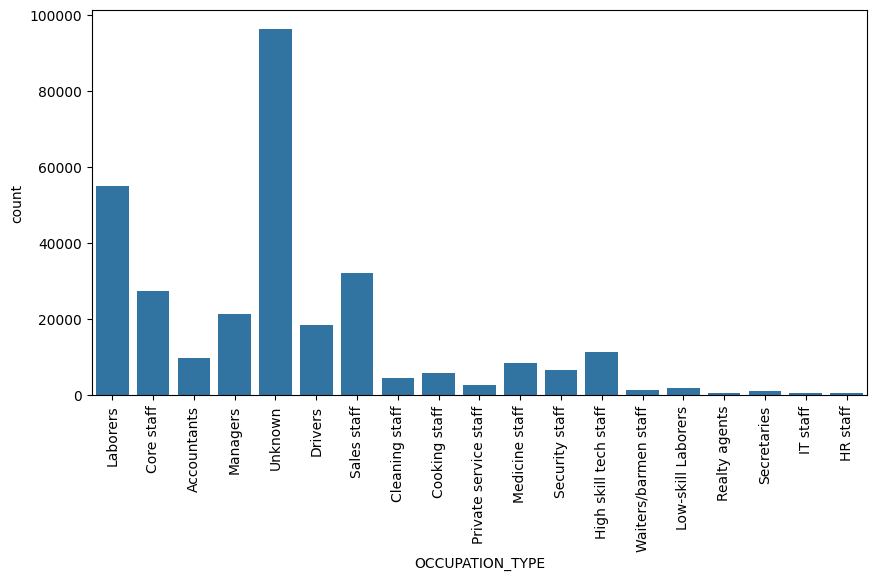

In [283]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "OCCUPATION_TYPE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
- Якщо поглянути на графік, то найбільшу кількість заявників на кредит мають `Laborers`
- Для імпутації краще залишити дані як є (пропущені значення становлять 31,35%) і не проводити імпутацію за якоюсь константою, як-от мода або мін/макс медіана, якщо це числовий стовпчик, оскільки це може викривити дані в подальших розрахунках.

Існує також можливість імпутації за допомогою більш "розумних" методів, але ми вивчимо їх пізніше, а зараз ми робимо те, що можемо, за допомогою деяких найпростіших перетворень.

### Аналіз стовпця `EXT_SOURCE_3`

- пропущені значення = 19.83%

In [284]:
df.EXT_SOURCE_3.value_counts().head()

EXT_SOURCE_3
0.75    1460
0.71    1315
0.69    1276
0.67    1191
0.65    1154
Name: count, dtype: int64

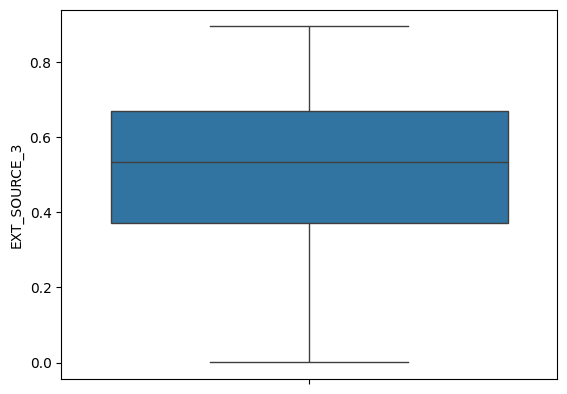

In [285]:
sns.boxplot(df.EXT_SOURCE_3)
plt.show()

Отримання процентильних значень для `EXT_SOURCE_3`

In [286]:
df.EXT_SOURCE_3.quantile(q = [0.25,0.5,0.75,1])

0.25   0.37
0.50   0.54
0.75   0.67
1.00   0.90
Name: EXT_SOURCE_3, dtype: float64

Найбільш повторюване значення в `EXT_SOURCE_3

In [287]:
df.EXT_SOURCE_3.mode()[0]

np.float64(0.746300213050371)

Перевірка середнього значення `EXT_SOURCE_3`

In [288]:
df.EXT_SOURCE_3.mean()

np.float64(0.5108529061799658)

**Спостереження**
-  Дивлячись на діагараму розмаху, медіана становить 0,535276
-  Найчастіше повторюване значення - 0,74630
-  Середнє значення - 0,51085
-  Хоча середнє та медіана є ближчими і можуть бути використані для імпутації, оскільки відсутнє відсоткове значення є більшим (19,83%), краще залишити дані як є і не проводити імпутації. Якщо метод вимагає імпутації, ми можемо імпутувати дані за допомогою медіани і створити ще один стовпчик, в якому буде позначено, які значення були імпутовані.

# ДЗ 1. Аналіз стовпців `AMT_REQ_CREDIT_BUREAU` з пропущеними значеннями

Виведіть середнє, моду, медіану та відсоток відсутніх даних для настуних колонок:

- `AMT_REQ_CREDIT_BUREAU_YEAR`
-	`AMT_REQ_CREDIT_BUREAU_MON`
-	`AMT_REQ_CREDIT_BUREAU_WEEK`

На основі виведених даних напишіть висновок про те, чи варто заповнювати пусті значення і якщо так, то яким чином?

### 1 - Відсоток відсутніх даних

Спочатку знайдемо відсоток відсутніх значень з нашого dataframe `null_df_under40` для всіх заданих стовпців

In [289]:
column_name_to_analys = ['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK']
null_df_under40.loc[null_df_under40['column_name'].isin(column_name_to_analys)]

column_name  null_count  null_percentage
118  AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
119   AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
121  AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50

In [290]:
null_persent_amt_bereau_year = null_df_under40[null_df_under40['column_name'] == 'AMT_REQ_CREDIT_BUREAU_YEAR'].null_percentage
null_persent_amt_bereau_year

121   13.50
Name: null_percentage, dtype: float64

Відсоток відсутніх даних для всіх заданих стовпців = `13,50%`

Також можна побачити, що для стовпців `AMT_REQ_CREDIT_BUREAU` є однакові значення ​ для `null_count` та `null_percentage`


## 1.2 - Додаткові обчислення
Виведемо всі стовпці з однаковими значеннями `null_count`,`null_percentage`, крім null (для зручності читання)

In [291]:
# Знаходимо усі рядки, де пара (null_count, null_percentage) зустрічається більше одного разу
duplicate_null_rows = null_df_under40[
    null_df_under40.duplicated(
        subset=['null_count', 'null_percentage'],
        keep=False
    )
].sort_values(['null_count', 'null_percentage']) # сортує їх так, щоб однакові рядки відображалися разом

# Видаляємо усі рядки з 0%
to_delete_null_duplicate = duplicate_null_rows[duplicate_null_rows['null_percentage'] == 0]
duplicate_null_rows.drop(index=to_delete_null_duplicate.index, inplace = True)

duplicate_null_rows

column_name  null_count  null_percentage
91     OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
92     DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
93     OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94     DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
116  AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
117   AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
118  AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
119   AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
120   AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
121  AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50

Окрім основних стовпців для аналізу, наступні стовпці також мають однакову структуру пропущених значень:
- `AMT_REQ_CREDIT_BUREAU_HOUR`
- `AMT_REQ_CREDIT_BUREAU_DAY`
- `AMT_REQ_CREDIT_BUREAU_QRT`

Стовпці `AMT_REQ_CREDIT_BUREAU` відображають кількість запитів до бюро кредитних історій за певний період часу

Відсутність значень у цих змінних може бути пов’язана з відсутністю кредитної історії в бюро або відсутністю кредитних запитів, а не з випадковими пропусками

Тому ці змінні мають значення для нашого аналізу `AMT_REQ_CREDIT_BUREAU` стовпців та включаються до подальшого аналізу



> Додаткова перевірка, чи всі ці стовпці мають однакові рядки(клієнти) з відсутніми значеннями

In [292]:
column_name_to_analys = column_name_to_analys + ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_QRT']

In [293]:
df_columns_with_nan = df[df[column_name_to_analys].isna().any(axis=1)]
df_columns_with_nan

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
3          100006       0         Cash loans           F             0   
9          100012       0    Revolving loans           M             0   
14         100018       0         Cash loans           F             0   
17         100021       0    Revolving loans           F             0   
20         100024       0    Revolving loans           M             1   
...           ...     ...                ...         ...           ...   
307484     456228       0         Cash loans           F             1   
307501     456245       0         Cash loans           F             0   
307504     456248       0         Cash loans           F             0   
307506     456251       0         Cash loans           M             0   
307507     456252       0         Cash loans           F             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
3                     1             0         135000.00   312682.50   
9                     1             0         135000.00   405000.00   
14                    1             0         189000.00   773680.50   
17                    1             1          81000.00   270000.00   
20                    1             0         135000.00   427500.00   
...                 ...           ...               ...         ...   
307484                0             0         540000.00   545040.00   
307501                1             3          81000.00   269550.00   
307504                1             0         153000.00   331920.00   
307506                0             0         157500.00   254700.00   
307507                1             0          72000.00   269550.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
3          29686.50        297000.00   Unaccompanied               Working   
9          20250.00        405000.00   Unaccompanied               Working   
14         32778.00        679500.00   Unaccompanied               Working   
17         13500.00        270000.00   Unaccompanied               Working   
20         21375.00        427500.00   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307484     35617.50        450000.00   Unaccompanied  Commercial associate   
307501     11871.00        225000.00   Unaccompanied  Commercial associate   
307504     16096.50        225000.00   Unaccompanied               Working   
307506     27558.00        225000.00   Unaccompanied               Working   
307507     12001.50        225000.00   Unaccompanied             Pensioner   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
3       Secondary / secondary special        Civil marriage   
9       Secondary / secondary special  Single / not married   
14      Secondary / secondary special               Married   
17      Secondary / secondary special               Married   
20      Secondary / secondary special               Married   
...                               ...                   ...   
307484  Secondary / secondary special               Married   
307501  Secondary / secondary special               Married   
307504  Secondary / secondary special             Separated   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
3       House / apartment                        0.01      -19005   
9       House / apartment                        0.02      -14469   
14      House / apartment                        0.01      -14583   
17      House / apartment                        0.01       -9776   
20      House / apartment                        0.02      -18252   
...                   ...                         ...         ...   
307484   Rented apartment                        0.03      -12847   
307501  House / apa

In [294]:
df_columns_with_nan[column_name_to_analys].head(15)

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_MON  \
3                          NaN                        NaN   
9                          NaN                        NaN   
14                         NaN                        NaN   
17                         NaN                        NaN   
20                         NaN                        NaN   
29                         NaN                        NaN   
34                         NaN                        NaN   
44                         NaN                        NaN   
45                         NaN                        NaN   
49                         NaN                        NaN   
69                         NaN                        NaN   
80                         NaN                        NaN   
83                         NaN                        NaN   
86                         NaN                        NaN   
99                         NaN                        NaN   

    AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_HOUR  \
3                          NaN                         NaN   
9                          NaN                         NaN   
14                         NaN                         NaN   
17                         NaN                         NaN   
20                         NaN                         NaN   
29                         NaN                         NaN   
34                         NaN                         NaN   
44                         NaN                         NaN   
45                         NaN                         NaN   
49                         NaN                         NaN   
69                         NaN                         NaN   
80                         NaN                         NaN   
83                         NaN                         NaN   
86                         NaN                         NaN   
99                         NaN                         NaN   

    AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_QRT  
3                         NaN                        NaN  
9                         NaN                        NaN  
14                        NaN                        NaN  
17                        NaN                        NaN  
20                        NaN                        NaN  
29                        NaN                        NaN  
34                        NaN                        NaN  
44                        NaN                        NaN  
45                        NaN                        NaN  
49                        NaN                        NaN  
69                        NaN                        NaN  
80                        NaN                        NaN  
83                        NaN                        NaN  
86                        NaN                        NaN  
99                        NaN                        NaN

## 2 - Розрахунок статистичних показників

Для `AMT_REQ_CREDIT_BUREAU` стовпців ми обчислимо *середнє значення*, *медіану* та *моду*.
Аналіз буде спочатку на даних без пропуску, після з заповненими нулями, оскільки відсутність значень пов’язана з відсутністю кредитної історії або кредитних запитів


> Розрахунок даних без NaN: характеристика поведінки клієнтів, у яких є бюро-дані

In [295]:
mode_no_nan = df[column_name_to_analys].mode().rename(index={0: 'mode'})
aggs_no_nan = df[column_name_to_analys].agg(['mean', 'median'])

stats_no_nan = pd.concat([aggs_no_nan, mode_no_nan])
stats_no_nan = stats_no_nan.transpose()

>  Розрахунок даний з NaN: загальний розподіл по вибірці

In [296]:
df_zero_filled = df.copy()
df_zero_filled[column_name_to_analys] = df_zero_filled[column_name_to_analys].fillna(0)

mode_zero_filled = df_zero_filled[column_name_to_analys].mode().rename(index={0: 'mode'})
aggs_zero_filled = df_zero_filled[column_name_to_analys].agg(['mean', 'median'])

stats_zero_filled = pd.concat([aggs_zero_filled, mode_zero_filled])
stats_zero_filled = stats_zero_filled.transpose()

>  Загальна таблиця з розрахунками

In [297]:
summary_stats_bureau = pd.concat(
    [
        stats_zero_filled.T.add_suffix('_NO_NAN'),
        stats_no_nan.T.add_suffix('_ZERO_FILLED')
    ],
    axis=1
).T


summary_stats_bureau.index = summary_stats_bureau.index.str.removeprefix('AMT_REQ_CREDIT_BUREAU_')
summary_stats_bureau


mean  median  mode
YEAR_NO_NAN       1.64    1.00  0.00
MON_NO_NAN        0.23    0.00  0.00
WEEK_NO_NAN       0.03    0.00  0.00
HOUR_NO_NAN       0.01    0.00  0.00
DAY_NO_NAN        0.01    0.00  0.00
QRT_NO_NAN        0.23    0.00  0.00
YEAR_ZERO_FILLED  1.90    1.00  0.00
MON_ZERO_FILLED   0.27    0.00  0.00
WEEK_ZERO_FILLED  0.03    0.00  0.00
HOUR_ZERO_FILLED  0.01    0.00  0.00
DAY_ZERO_FILLED   0.01    0.00  0.00
QRT_ZERO_FILLED   0.27    0.00  0.00

- `median` та `mode` дорівнюють нулю -> понад половина клієнтів не здійснювали жодних кредитних запитів у відповідні часові періоди
- `median` = 0 -> більшість клієнтів не мають кредитних запитів
- `mode` = 0 -> найчастіше значення у вибірці
- `mean` > 0.01 -> наявність невеликої кількості клієнтів з активними кредитними запитами
- З усіх даних `YEAR` має інше значеня:
  - `mean ≈ 1.64` (NO_NAN)
  - `mean ≈ 1.90` (ZERO_FILLED)
- У середньому клієнт здійснює приблизно 1–2 запити до кредитного бюро протягом року

## Звіт аналізу ДЗ

### Пропущені значення
`AMT_REQ_CREDIT_BUREAU` стовпці відображають **кількість запитів клієнта до бюро кредитних історій** за різні часові періоди перед подачею кредитної заявки

Відсутність значень може бути пов’язана з одним із наступних факторів:
- клієнт не має кредитної історії
- у клієнта не було кредитних запитів у часові періоди
- інформація з кредитного бюро була недоступна щоб додати у датасет

**Пропущені значення не означають помилку, а відображають відсутність кредитної активності або інформації**, що може бути інформативним сигналом з точки зору кредитного ризику

Тому **стратегія заповнення пропущених значень нулями є найефективнішою**:
- зберігає бізнес-логіку(відсутність кредитних запитів у відповідний період часу)
- не спотворює розподіл даних
- дозволяє нам зберегти дані

### `NO_NAN` та `ZERO_FILLED`
- `NO_NAN` — не включаючи NaN значення
- `ZERO_FILLED` — після заповнення пропущених значень нулями

1. `ZERO_FILLED` є незначно вищими, бо вони не є випадковими і, як зазначано раніше, пов’язані з клієнтами, які не мають кредитної історії в бюро або не здійснювали кредитних запитів.

2. Додавання нульових значень змінює розподіл змінних, але не змінює загальний патерн поведінки

### Stats
- `median` = 0 -> більшість клієнтів не мають кредитних запитів
- `mode` = 0 -> найчастіше значення у вибірці
- `mean` > 0.01 -> наявність невеликої кількості клієнтів з активними

1. Нульове значення `median` та `mode` звідчить що більшість клієнтів не роблять частих запитів у відповідні періоди

2. `mean` для всіх змінних є низьким,але не нульове. У виборці присутні клієнти з ненульовою кількістю кредитних запитів, які збільшують середнє значення

3. Найвищі середні значення є для річного періоду, що відповідає приблизно 1–2 кредитним запитам на рік у середньому. Для коротших часових інтервалів середні значення наближаються до нуля, що свідчить про рідкісну появу таких подій, однак їх наявність може бути інформативною з точки зору кредитного ризику

###  **Висновок**
Пропущені значення варто заповнювати, оскільки вони мають структурний, а не випадковий характер. Найбільш ефективним підходом є **заповнення пропусків нульовими значеннями**


---



# Перевірка стовпців зі значеннями NULL > 0% та < 1%

Створення датафрейму `null_df_under1` з відсотком пропущених значень > 0% та < 1% у кожному стовпці

In [298]:
null_df_under1 = null_df[(null_df['null_percentage'] > 0) & (null_df['null_percentage'] < 1)]

In [299]:
null_df_under1.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
11           NAME_TYPE_SUITE        1292             0.42
92  DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
91  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
93  OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94  DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42              EXT_SOURCE_2         660             0.21
10           AMT_GOODS_PRICE         278             0.09

### Аналіз стовпця `NAME_TYPE_SUITE`

In [300]:
null_df_under1[null_df_under1.column_name == 'NAME_TYPE_SUITE']

column_name  null_count  null_percentage
11  NAME_TYPE_SUITE        1292             0.42

In [301]:
df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

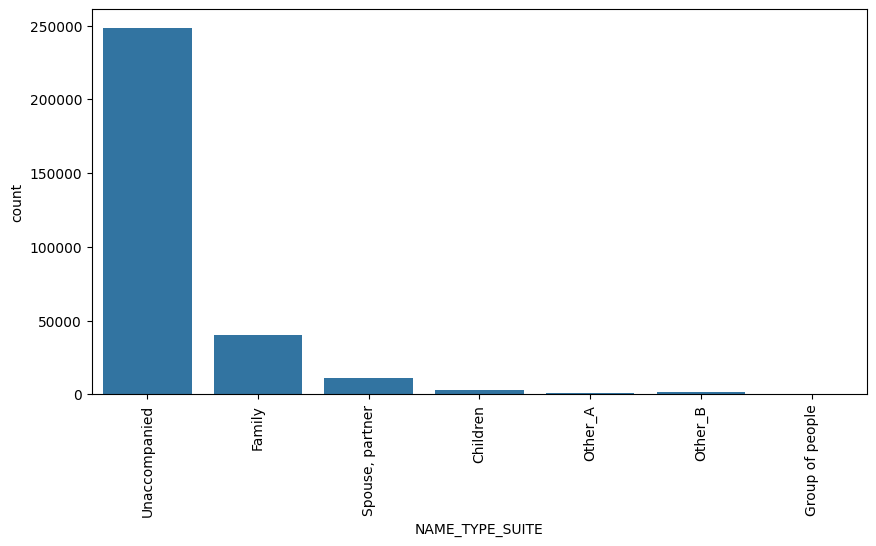

In [302]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
-   Дивлячись на графік, категорія `Unaccompanied` має найбільшу кількість заявників на отримання кредиту. Отже, більшість позичальників наважуються звертатися за кредитом без супроводу.
- Ми можемо продовжити імпутацію `Unaccompanied` в датафреймі, але краше надати перевагу другому варіанту.
- Ми також могли б імпутувати дані зі значенням `NA`, оскільки ця колонка є категоричною.
- Аналогічно, якщо в колонці не вистачає менше 1% даних, ми можемо її опустити. Але якщо ми вилучимо всі дані в усіх стовпчиках, де пропущено <=1% даних, ми можемо вилучити занадто багато даних. Тому я здебільшого зберігаю дані настільки, наскільки це можливо.

In [303]:
df['NAME_TYPE_SUITE'].fillna('NA', inplace=True)

/tmp/ipython-input-1528124425.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NAME_TYPE_SUITE'].fillna('NA', inplace=True)


### Аналіз стовпця `OBS_30_CNT_SOCIAL_CIRCLE`

In [304]:
null_df_under1[null_df_under1.column_name == 'OBS_30_CNT_SOCIAL_CIRCLE']

column_name  null_count  null_percentage
91  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33

In [305]:
df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts().head(10)

OBS_30_CNT_SOCIAL_CIRCLE
0.00    163910
1.00     48783
2.00     29808
3.00     20322
4.00     14143
5.00      9553
6.00      6453
7.00      4390
8.00      2967
9.00      2003
Name: count, dtype: int64

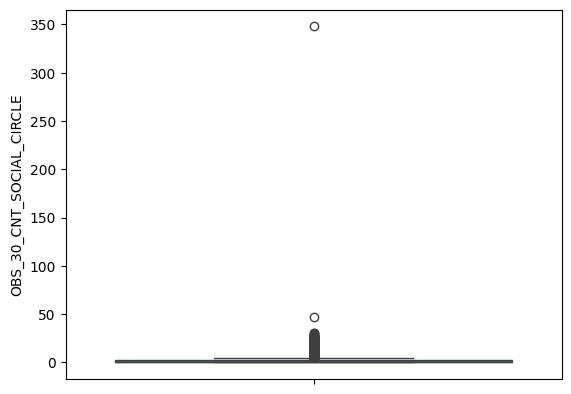

In [306]:
sns.boxplot(df.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

Розрахунок перцентилів `OBS_30_CNT_SOCIAL_CIRCLE`

In [307]:
df.OBS_30_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,1])

0.25     0.00
0.50     0.00
0.75     2.00
1.00   348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

Найбільш повторюване значення в `OBS_30_CNT_SOCIAL_CIRCLE`

In [308]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0]

np.float64(0.0)

Середнє значення `OBS_30_CNT_SOCIAL_CIRCLE`

In [309]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mean()

np.float64(1.4222454239942575)

**Спостереження**
- Дивлячись на діаграму розмаху, медіана дорівнює 0.0
- Найчастіше повторюване значення - 0.0
- Середнє значення - 1,4222
- Є два викидні значення на рівні 50 та 350.
- Медіана і мода близькі (з огляду на діапазон даних у цьому стовпчику) і можуть бути використані для імпутації. Це не призведе до зміщення, оскільки відсоток пропущених значень невеликий (0,33%)

In [310]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

/tmp/ipython-input-1727889282.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)


# ДЗ 2. Аналіз і заповнення пустих значень у колонках з малим відсотком пропущених

За прикладом вище проведіть аналіз пропущених значень в колонках
- EXT_SOURCE_2
- AMT_GOODS_PRICE

Для швидшого аналізу рекомендую написати фукнцію, яку Ви зможете викликати для кожної з колонок.

Зробіть висновок, що робити з пропущеними значеннями в кожному випадку і виконанайте ту дію, яку зазначили.

### 1 - Аналіз відсутніх даних

In [311]:
column_name_to_analys_under1 = ['EXT_SOURCE_2','AMT_GOODS_PRICE']
null_df_under1.loc[null_df_under1['column_name'].isin(column_name_to_analys_under1)]

column_name  null_count  null_percentage
10  AMT_GOODS_PRICE         278             0.09
42     EXT_SOURCE_2         660             0.21

Відсоток відсутніх даних наступний:
- `AMT_GOODS_PRICE` = `0.09%`
- `EXT_SOURCE_2` = `0.21%`


## 2 - `AMT_GOODS_PRICE` аналіз та заповнення

`AMT_GOODS_PRICE` - вартість товару, який купується в кредит

In [312]:
# Загальна інформація
df['AMT_GOODS_PRICE'].describe()

count    307233.00
mean     538396.21
std      369446.46
min       40500.00
25%      238500.00
50%      450000.00
75%      679500.00
max     4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

<Axes: >

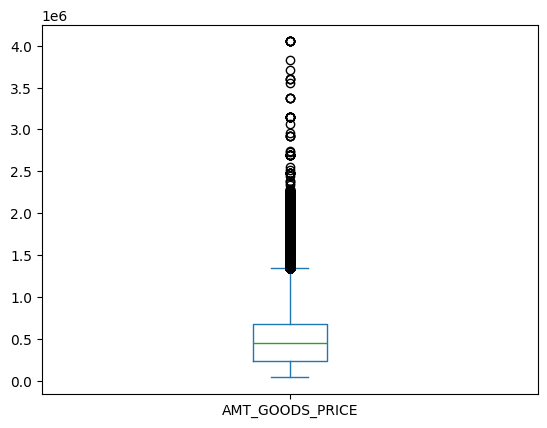

In [313]:
# Розподіл
df['AMT_GOODS_PRICE'].plot(kind='box')

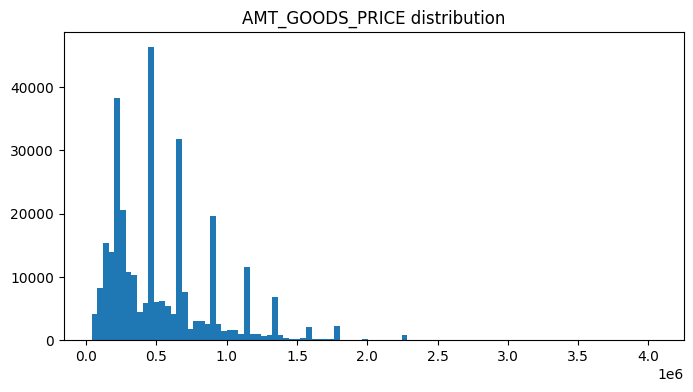

In [314]:
plt.figure(figsize=(8,4))
plt.hist(df['AMT_GOODS_PRICE'].dropna(), bins=100)
plt.title('AMT_GOODS_PRICE distribution')

plt.show()


1. `mean` > `median` може значити що є дорогі покупки, як нерухомість та авто
2. Типово для фінансів: багато недорогих товарів, мало дуже дорогих
3. Розподіл дискретний покаує на стандартизовані ціни(типові кредитні продукти)

In [315]:
# Знайдемо кореляцію між
df[['AMT_GOODS_PRICE','AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY']].corr()

AMT_GOODS_PRICE  AMT_CREDIT  AMT_INCOME_TOTAL  AMT_ANNUITY
AMT_GOODS_PRICE              1.00        0.99              0.16         0.78
AMT_CREDIT                   0.99        1.00              0.16         0.77
AMT_INCOME_TOTAL             0.16        0.16              1.00         0.19
AMT_ANNUITY                  0.78        0.77              0.19         1.00

Кореляція між AMT_GOODS_PRICE та:
- `AMT_CREDIT` = `0.99` - майже лінійна залежність
- `AMT_ANNUITY` = `0.78` - сильний звʼязок
- `AMT_INCOME_TOTAL` = `0.16` слабкий звʼязок(дохід впливає на можливість кредиту, але не на вартість товару)

Для цього стовпця краще використовувати імутацію:

1. `AMT_GOODS_PRICE` - описує масштаб покупки та сильно корелює з `AMT_CREDIT`, ми не можемо видалити її

2. Пропуски можуть бути не випадковими: це можуть бути нові клієнтити або тип кредиту без конкретного товару
спеціальні продукти
3. Імпутація зберігає розподіл
    - не створює штучних значень
    - зберігає економічну логіку
    - не ламає кореляції


In [316]:
ratio = df['AMT_GOODS_PRICE'] / df['AMT_CREDIT']
median_ratio = ratio.median()

df.loc[df['AMT_GOODS_PRICE'].isna(), 'AMT_GOODS_PRICE'] = df['AMT_CREDIT'] * median_ratio

# Провірка
df['AMT_GOODS_PRICE'].isna().sum()

np.int64(0)

## 3 - `EXT_SOURCE_2` аналіз та заповнення

`EXT_SOURCE_2` — показує кредитну надійність клієнта, розраховану зовнішньою компанією. Окрім `EXT_SOURCE_2` існуюсть `EXT_SOURCE_1` та `EXT_SOURCE_3`

Причини пропусків можуть бути такими:
- клієнт новий (no credit history)
- бюро не надало дані
- технічні проблеми
- відсутність згоди

Ці колонки є найважливищіми у датасеті, тому `EXT_SOURCE_2` видаляти не треба

Відсутність `EXT_SOURCE_2` означає, що про клієнта немає зовнішньої кредитної історії або дані недоступні, а такі клієнти статистично частіше мають дефолт. Тому для `EXT_SOURCE_2` краще зробити флаг та заповнити пропуски через імпутацію

In [317]:
df['EXT_SOURCE_2_MISSING_FLAG'] = df['EXT_SOURCE_2'].isna().astype(int)

> Даний флаг дає зрозуміння про підвищений ризик з таким клієнтом

In [318]:
median_ext_2 = df['EXT_SOURCE_2'].median()
df['EXT_SOURCE_2'] = df['EXT_SOURCE_2'].fillna(median_ext_2)

> Заповнюємо медіаною, щоб не створювати викидів


## Звіт аналізу ДЗ

### `AMT_GOODS_PRICE`
1. Розподіл `AMT_GOODS_PRICE` є сильно асиметричним з довгим правим хвостом, що відповідає реальній структурі ринку кредитних товарів: більшість клієнтів купують товари середньої вартості, а дорогі покупки (авто, нерухомість) здійснюєтся невеликою часткою

2. **Для заповненні даних ми використовуємо ratio-імпутація:**
    - відновлюємо реалістичну вартість
    - використовуємо наявну інформацію
    - сума кредиту майже повністю визначається вартістю товару

### `EXT_SOURCE_2`
1. `EXT_SOURCE_2` - одна з найсильніших фіч у всьому датасеті і самі пропуски дають нам додаткову інформацію. Саме тому було реалізована **комбінація з флагом та імпутації**:
    - Створюємо флаг пропуску та заповнюємо EXT_SOURCE_2 медіаною, щоб зберегти інформацію про відсутність і не спотворити розподіл

### Інши варіанти, окрім імпутацію, можуть мати негативний ефект:
    - Видалення рядків -> втрата даних
    - Залишити nan може привести до помилки в моделі
    - Заповнити 0	приведе до логічної помилки

###  **Висновок**
Пропущені значення були заповнені методами, що зберігають економічну логіку, статистичні властивості даних та допоможуть при розробки моделі:
- `EXT_SOURCE_2` -> **імпутація медіанною + флаг**
- `AMT_GOODS_PRICE` -> **імпутацію на основі співвідношення до суми кредиту**


---



# Робота з неправильними/невідомими значеннями даних

### Аналіз стовпця `CODE_GENDER`

Перевірка діапазону значень

In [319]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

Стать має бути тільки чоловіча або жіноча. Значення `XNA` може вказувати на те, що значення не було надано заявником або пропущено кредитним спеціалістом, який перевіряє заявку

In [320]:
df[df['CODE_GENDER'] == 'XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
35657      141289       0    Revolving loans         XNA             1   
38566      144669       0    Revolving loans         XNA             0   
83382      196708       0    Revolving loans         XNA             0   
189640     319880       0    Revolving loans         XNA             1   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                 1             0         207000.00   382500.00   
38566                 1             2         157500.00   270000.00   
83382                 1             1         135000.00   405000.00   
189640                1             0         247500.00   540000.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657      19125.00        337500.00   Unaccompanied               Working   
38566      13500.00        225000.00          Family               Working   
83382      20250.00        225000.00   Unaccompanied               Working   
189640     27000.00        900000.00   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                         0.02      -20232         -10044   
38566                         0.03      -13717          -2797   
83382                         0.04      -10647          -1228   
189640                        0.04       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657           -10024.00            -3537           1               1   
38566            -2241.00            -4659           1               1   
83382             -183.00            -1671           1               1   
189640           -4099.00            -2326           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                 1                 1           1           0   
38566                 1                 1           1           0   
83382                 1                 1           1           0   
189640                1                 1           1           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657              Unknown             2.00                     3   
38566   Low-skill Laborers             4.00                     2   
83382           Core staff             3.00                     2   
189640             Unknown             2.00                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                        0                       

Оскільки дані виглядають достовірними, ми перевіримо можливість застосування методу імпутації.
- Заявників-жінок удвічі більше, ніж заявників-чоловіків
- Отже, ми прирівняємо `CODE_GENDER` до 'F'

In [321]:
df['CODE_GENDER'] = df['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

Перевірка, чи вилучено `XNA`

In [322]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

### Аналіз стовпця `DAYS_BIRTH`

In [323]:
df['DAYS_BIRTH'].value_counts().head()

DAYS_BIRTH
-13749    43
-13481    42
-10020    41
-18248    41
-15771    40
Name: count, dtype: int64

Існує ~17K+ унікальних записів, всі з яких, схоже, мають від'ємні значення

In [324]:
df['DAYS_BIRTH'].unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061])

In [325]:
df['DAYS_BIRTH'].nunique()

17460

In [326]:
df['DAYS_BIRTH'].describe()

count   307511.00
mean    -16037.00
std       4363.99
min     -25229.00
25%     -19682.00
50%     -15750.00
75%     -12413.00
max      -7489.00
Name: DAYS_BIRTH, dtype: float64

Перетворення `Days Birth` на додатні дні

In [327]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: -x if x < 0 else x)

In [328]:
df['DAYS_BIRTH'].value_counts()

DAYS_BIRTH
13749    43
13481    42
10020    41
18248    41
15771    40
         ..
24958     1
25048     1
24980     1
25061     1
25045     1
Name: count, Length: 17460, dtype: int64

Всі дні в `DAYS_BIRTH` мають додатні значення - це може бути зручніше для аналізу.

#### Створимо нову колонку `YEARS_BIRTH` для зручності аналізу

In [329]:
df['YEARS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: round(x/365))

### Аналіз стовпця `NAME_FAMILY_STATUS`

Перевірка діапазону значень

In [330]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

Стать має бути тільки чоловіча або жіноча. Значення `Unknown` може означати, що значення не було вказане заявником або пропущене кредитним спеціалістом, який перевіряє заявку

In [331]:
df[df['NAME_FAMILY_STATUS'] == 'Unknown']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
41982      148605       0    Revolving loans           M             0   
187348     317181       0    Revolving loans           F             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                 1             0         450000.00   675000.00   
187348                1             0         202500.00   585000.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982      33750.00        603324.99              NA  Commercial associate   
187348     29250.00        522881.66              NA  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                         0.02       12396          -1161   
187348                        0.03       12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
41982            -3265.00            -4489           1               1   
187348           -1597.00            -1571           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
41982                 1                 1           1           0   
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982         Managers              NaN                     2   
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982                         1               Insurance          0.70   
187348                        0  Business Entity Type 2          0.65   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
41982            NaN                      3.00                      0.00   
187348          0.67                      1.00                      0.00   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
41982                       3.00                      0.00   
187348                      1.00                      0.00   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
41982                  -876.00                0                0   
187348                 -654.00                0                0   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
41982                 0                1                0                0   
187348                0                0                0                1   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
41982                 0                0                 0                 0   
187348                0                0                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
41982                  0                 0                 0   
187348                 0                 0                 0   

        FLAG_DOCUMENT_15 

In [332]:
df['NAME_FAMILY_STATUS'].value_counts(normalize = True) * 100

NAME_FAMILY_STATUS
Married                63.88
Single / not married   14.78
Civil marriage          9.68
Separated               6.43
Widow                   5.23
Unknown                 0.00
Name: proportion, dtype: float64

Оскільки дані виглядають достовірними, ми продовжимо перевірку методу імпутації.
- Одружені заявники складають понад 63% заявників.
- Отже, ми прирівняємо `NAME_FAMILY_STATUS` до `Married`.

In [333]:
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x == 'Unknown' else x)

Перевірка чи вилучено `Unknown`

In [334]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64

### Аналіз стовпця`DAYS_EMPLOYED`

In [335]:
df['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
Name: count, dtype: int64

In [336]:
df['DAYS_EMPLOYED'].value_counts(normalize = True) * 100

DAYS_EMPLOYED
 365243   18.01
-200       0.05
-224       0.05
-230       0.05
-199       0.05
           ... 
-11471     0.00
-12878     0.00
-10573     0.00
-12990     0.00
-14184     0.00
Name: proportion, Length: 12574, dtype: float64

In [337]:
len(df[df['DAYS_EMPLOYED'] < 365243])

252137

In [338]:
df[df['DAYS_EMPLOYED'] < 365243].DAYS_EMPLOYED.value_counts()

DAYS_EMPLOYED
-200      156
-224      152
-230      151
-199      151
-212      150
         ... 
-12037      1
-16554      1
-11276      1
-8348       1
-9129       1
Name: count, Length: 12573, dtype: int64

In [339]:
df['DAYS_EMPLOYED'].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694])

In [340]:
df['DAYS_EMPLOYED'].nunique()

12574

**Спостереження**
- Існує ~55K+ записів, для яких `DAYS_EMPLOYED` дорівнює 365243 дням
- Решта 252K+ записів мають від'ємне значення днів
- Існує 12 574 унікальних значень для `DAYS_EMPLOYED`

 - Колонка `DAYS_EMPLOYED` вказує на те, за скільки днів до подачі заявки особа почала поточну роботу, заявник/кредитний спеціаліст повинен ввести від'ємні значення, щоб вказати дні, що передують даті подачі заявки.<br>
 - Ми конвертуємо від'ємні значення в `DAYS_EMPLOYED` в додатні дні, щоб стандартизувати дні під час використання в розрахунках

In [341]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: -x if x < 0 else x)

In [342]:
df['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
365243    55374
200         156
224         152
230         151
199         151
Name: count, dtype: int64

Ми бачимо, що всі дні в `DAYS_EMPLOYED` мають додатні значення

**Для ~55K+ записів, для яких `DAYS_EMPLOYED` становить 365243 дні**
- Конвертуючи це в роки, ми отримуємо 1000 років, які фізично неможливо використати для працевлаштування заявника
- Це відповідає 18% даних і не може бути аномалією
- Вони можуть бути або пенсіонерами, або безробітними, і, дивлячись на дані, наш висновок є правильним

> Є два способи впоратися з цим
>> 1) Ми залишаємо дані такими, якими вони є, і враховуємо це під час аналізу АБО  <br>
>> 2) Ми розраховуємо середню кількість днів зайнятості без урахування цієї категорії та вписуємо її замість 365243 днів для пенсіонерів. <br>
>> Для безробітних кількість днів зайнятості може дорівнювати 0

*Примітка*
 - Під час розрахунків у цьому стовпчику ми повинні враховувати цей сценарій, оскільки інакше він спотворює наші результати

In [343]:
df[df['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Pensioner     55352
Unemployed       22
Name: count, dtype: int64

#### Створимо нову колонку `YEARS_EMPLOYED` для зручності аналізу

In [344]:
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_REGISTRATION`

In [345]:
df['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
-1.00    113
-7.00     98
-6.00     96
-4.00     92
-2.00     92
Name: count, dtype: int64

In [346]:
df['DAYS_REGISTRATION'].value_counts(normalize = True).head()

DAYS_REGISTRATION
-1.00   0.00
-7.00   0.00
-6.00   0.00
-4.00   0.00
-2.00   0.00
Name: proportion, dtype: float64

In [347]:
df['DAYS_REGISTRATION'].unique()

array([ -3648.,  -1186.,  -4260., ..., -16396., -14558., -14798.])

In [348]:
df['DAYS_REGISTRATION'].nunique()

15688

Перетворення `DAYS_REGISTRATION` в додатні дні

In [349]:
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: -x if x < 0 else x)

In [350]:
df['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
1.00    113
7.00     98
6.00     96
4.00     92
2.00     92
Name: count, dtype: int64

Всі дні в `DAYS_REGISTRATION` мають додатні значення

#### Створимо нову колонку `YEARS_REGISTRATION` для зручності аналізу

In [351]:
df['YEARS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_ID_PUBLISH`

In [352]:
df['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
Name: count, dtype: int64

In [353]:
df['DAYS_ID_PUBLISH'].value_counts(normalize = True).head()

DAYS_ID_PUBLISH
-4053   0.00
-4095   0.00
-4046   0.00
-4417   0.00
-4256   0.00
Name: proportion, dtype: float64

In [354]:
df['DAYS_ID_PUBLISH'].unique()

array([-2120,  -291, -2531, ..., -6194, -5854, -6211])

In [355]:
df['DAYS_ID_PUBLISH'].nunique()

6168

Перетворення `DAYS_ID_PUBLISH` в додатні дні

In [356]:
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: -x if x < 0 else x)

In [357]:
df['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
4053    169
4095    162
4046    161
4417    159
4256    158
Name: count, dtype: int64

Всі дні в `DAYS_ID_PUBLISH` мають додатні значення

#### Створимо нову колонку `YEARS_ID_PUBLISH` для зручності аналізу

In [358]:
df['YEARS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_LAST_PHONE_CHANGE`

In [359]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
0.00     37672
-1.00     2812
-2.00     2318
-3.00     1763
-4.00     1285
Name: count, dtype: int64

In [360]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts(normalize = True).head()

DAYS_LAST_PHONE_CHANGE
0.00    0.12
-1.00   0.01
-2.00   0.01
-3.00   0.01
-4.00   0.00
Name: proportion, dtype: float64

In [361]:
df['DAYS_LAST_PHONE_CHANGE'].unique()

array([-1134.,  -828.,  -815., ..., -3988., -3899., -3538.])

In [362]:
df['DAYS_LAST_PHONE_CHANGE'].nunique()

3773

Перетворення `DAYS_LAST_PHONE_CHANGE` в додатні дні

In [363]:
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: -x if x < 0 else x)

In [364]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
0.00    37672
1.00     2812
2.00     2318
3.00     1763
4.00     1285
Name: count, dtype: int64

Всі дні в `DAYS_LAST_PHONE_CHANGE` мають додатні значення

#### Створення нової колонки `YEARS_LAST_PHONE_CHANGE` для зручності аналізу

In [365]:
df['YEARS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: round(x/365,0))

# Автоматичні функції

### Створення функції `age_cat` для категоризації `YEARS_BORNING`

In [366]:
def age_cat(years):
    if years <= 20:
        return '0-20'
    elif years > 20 and years <= 30:
        return '20-30'
    elif years > 30 and years <= 40:
        return '30-40'
    elif years > 40 and years <= 50:
        return '40-50'
    elif years > 50 and years <= 60:
        return '50-60'
    elif years > 60 and years <= 70:
        return '60-70'
    elif years > 70:
        return '70+'

### Одномірний (категоріальний vs цільовий) та двомірний (категоріальний vs категоріальний) аналіз (гістограма) - категоріальні стовпчики

In [367]:
import matplotlib.pyplot as plt


def bi_cat_countplot(df, column, hue_column):
    unique_hue_values = df[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,6)

    pltname = f'Нормалізований розподіл значень за категорією: {column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[0], title=pltname)

    # анотація значень в барплоті
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%')

    pltname = f'Кількість даних за категорією: {column}'
    counts = df.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container)


def uni_cat_target_compare(df, column):
    bi_cat_countplot(df, column, hue_column='TARGET' )


def bi_countplot_target(df0, df1, column, hue_column):
  pltname = 'Клієнт зі складнощами щодо платності'
  print(pltname.upper())
  bi_cat_countplot(df1, column, hue_column)
  plt.show()

  pltname = 'Клієнти зі своєчасними платежами'
  print(pltname.upper())
  bi_cat_countplot(df0, column, hue_column)
  plt.show()


### Обчислення мінімального та максимального діапазону відхилень для числових стовпців

In [368]:
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

# Робота з викидами для числових стовпців

In [369]:
import warnings

def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Графік розподілу для ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Боксплот для ' + column
      plt.title(pltname)

      plt.show()

### Аналіз стовпця `CNT_CHILDREN`

In [370]:
df['CNT_CHILDREN'].value_counts().sort_values(ascending = False).head()

CNT_CHILDREN
0    215371
1     61119
2     26749
3      3717
4       429
Name: count, dtype: int64

In [371]:
(df['CNT_CHILDREN'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

CNT_CHILDREN
0   70.04
1   19.88
2    8.70
3    1.21
4    0.14
Name: proportion, dtype: float64

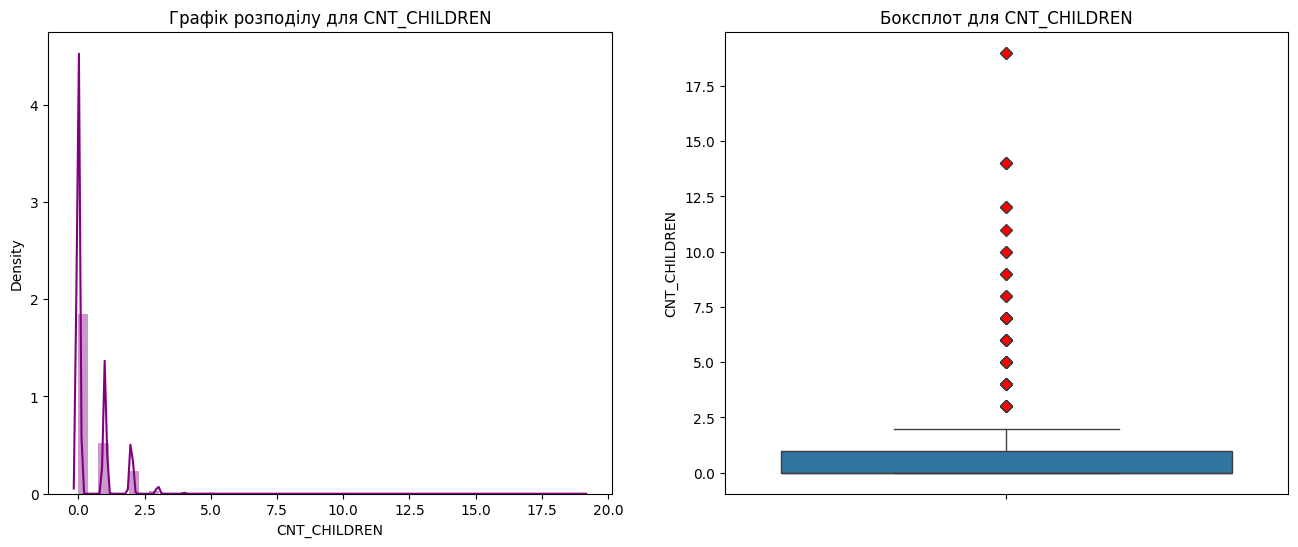

In [372]:
dist_box(df,'CNT_CHILDREN')

Розрахуємо IQR (Inter Quartile range)

In [373]:
Q1 = df['CNT_CHILDREN'].quantile(0.25)
Q3 = df['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


Значення *до* (Q1 - 1,5 * IQR) та *після* (Q3 + 1,5 * IQR) є викидами

In [374]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value))

Мінімальне значення, до якого існують викиди: -1.5
Максимальне значення, після якого існують викиди: 2.5


**Спостереження**
- Дивлячись на дані, ми бачимо, що кількість заявників, які мають більше 7 дітей, є дуже мінімальною (2 або 3 в кожній категорії)
- Крім того, дивлячись на дані для заявників з 10 дітьми, заявники мають лише 31 й 41 рік відповідно. Це виглядає як одиничний випадок й може розглядатися як відхилення від норми
- Як дистрибутивні, так і діаграми розмаху чітко показують, що значення, які перевищують значення 2.5, є відхиленнями від норми.

**Висновок**
- Заявники, які мають 3 або більше дітей, є випадками, що відхиляються від норми. Ми можемо надати спеціальний аналіз для цих випадків.

### Аналіз стовпця `AMT_INCOME_TOTAL`

In [375]:
df['AMT_INCOME_TOTAL'].value_counts().sort_values(ascending = False).head()

AMT_INCOME_TOTAL
135000.00    35750
112500.00    31019
157500.00    26556
180000.00    24719
90000.00     22483
Name: count, dtype: int64

In [376]:
(df['AMT_INCOME_TOTAL'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_INCOME_TOTAL
135000.00   11.63
112500.00   10.09
157500.00    8.64
180000.00    8.04
90000.00     7.31
Name: proportion, dtype: float64

In [377]:
df['AMT_INCOME_TOTAL'].describe(percentiles = [0.75,0.99,0.999])

count      307511.00
mean       168797.92
std        237123.15
min         25650.00
50%        147150.00
75%        202500.00
99%        472500.00
99.9%      900000.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

Побудуємо графік для `AMT_INCOME_TOTAL`

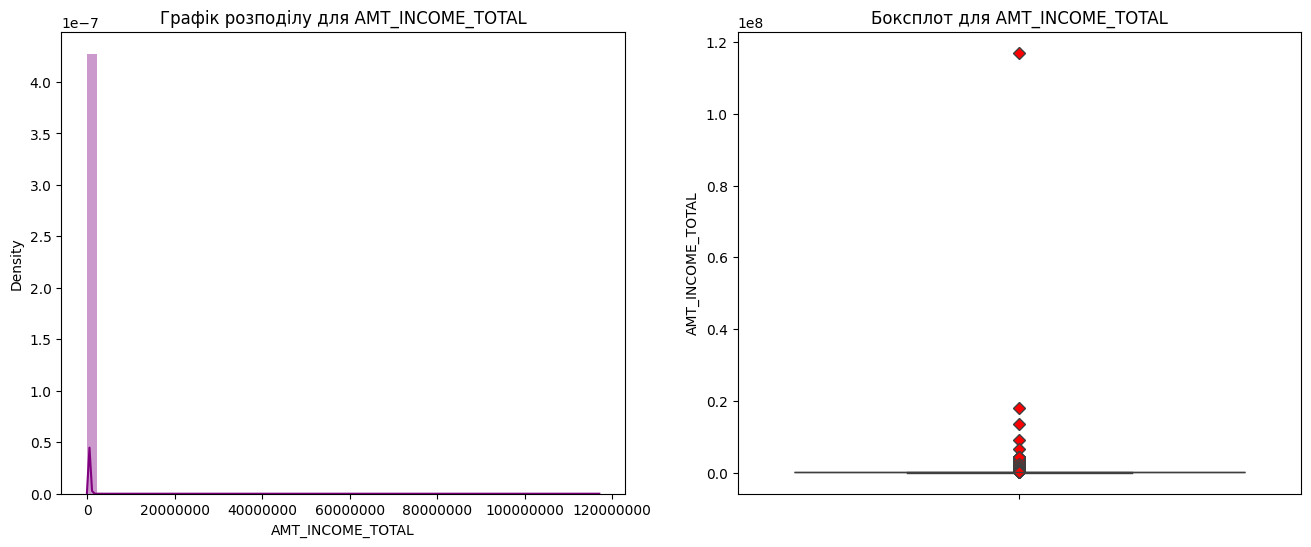

In [378]:
dist_box(df,'AMT_INCOME_TOTAL')

- Графіки кінцевого результату дуже тонкі, й ми можемо спостерігати викид близько ~120 мільйонів.
- Давайте побудуємо графік, розглядаючи лише дохід нижче 99,9% значення, тобто 900 тисяч.

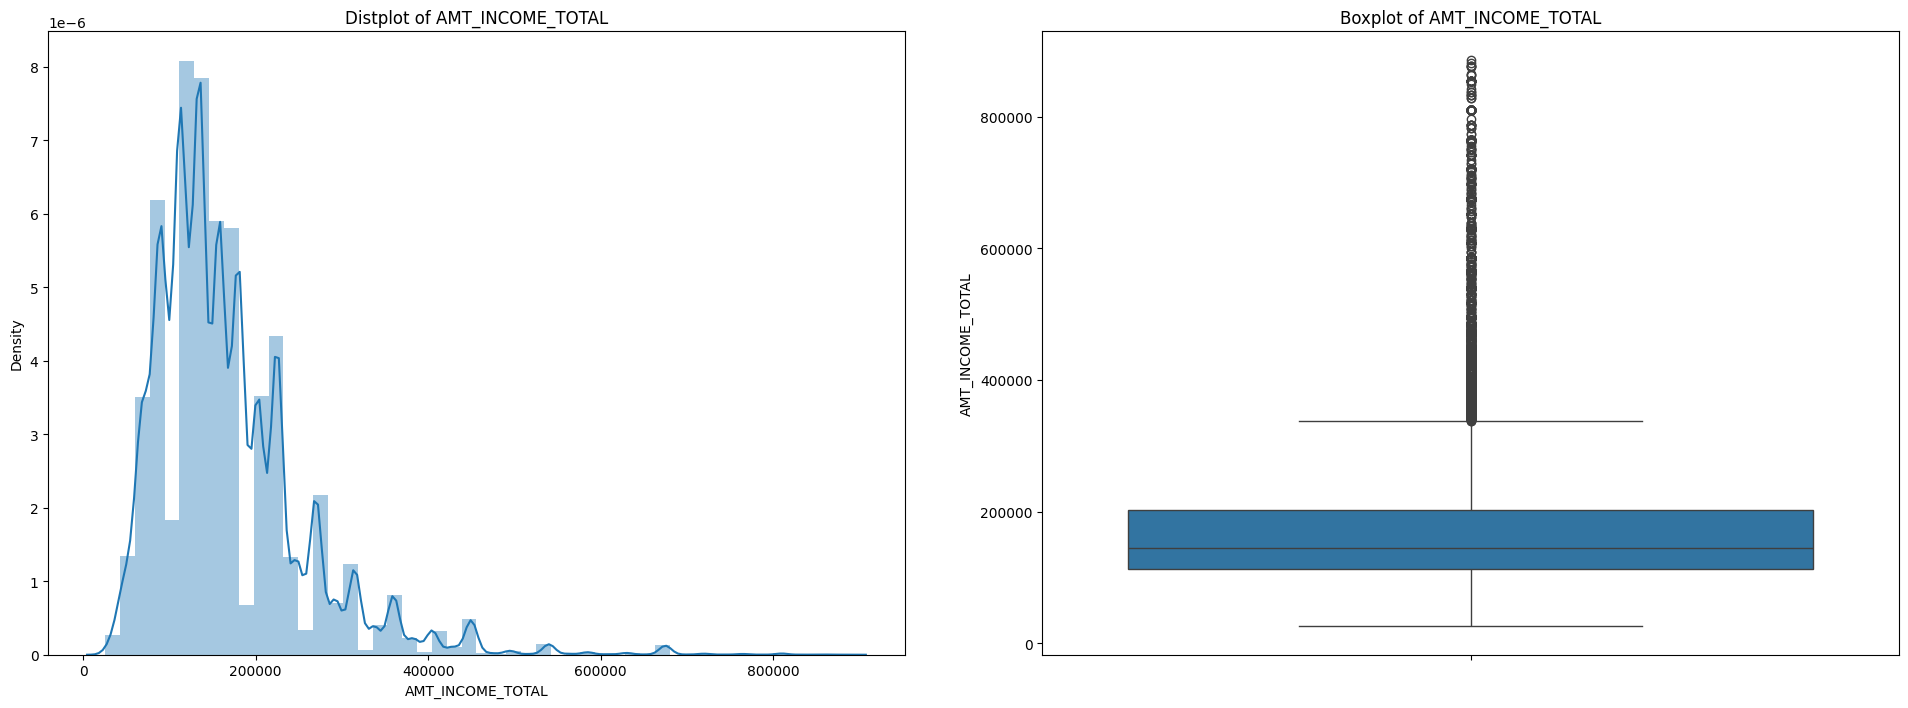

In [379]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Distplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Boxplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

Тепер ми можемо чітко побачити розподіл і діапазон даних на обох графіках.
 - Це означає, що значення понад 900 тис. грн доходу явно є викидами

In [380]:
df[df['AMT_INCOME_TOTAL'] > 900000].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
1504     101769       0    Revolving loans           M             1   
1723     102015       0         Cash loans           F             0   
3371     103938       0         Cash loans           F             0   
4603     105384       0    Revolving loans           F             1   
5673     106637       0         Cash loans           M             1   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1504                1             0        1080000.00   180000.00   
1723                1             0        1935000.00   269550.00   
3371                0             1        1350000.00  2410380.00   
4603                1             0        1350000.00   405000.00   
5673                1             3         967500.00   450000.00   

      AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1504      9000.00        180000.00   Unaccompanied  Commercial associate   
1723     10534.50        225000.00   Unaccompanied             Pensioner   
3371    109053.00       2250000.00              NA  Commercial associate   
4603     20250.00        405000.00   Unaccompanied  Commercial associate   
5673     30073.50        450000.00   Unaccompanied  Commercial associate   

                NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1504               Higher education            Married  House / apartment   
1723  Secondary / secondary special            Married  House / apartment   
3371               Higher education            Married  House / apartment   
4603               Higher education            Married  House / apartment   
5673               Higher education            Married  House / apartment   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
1504                        0.07       13633           5536   
1723                        0.01       18636         365243   
3371                        0.07       12213            843   
4603                        0.02       14781           4768   
5673                        0.05       11901            546   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
1504               3.00             4971           1               1   
1723            3401.00             2168           1               0   
3371             757.00             4132           1               1   
4603            3469.00             4045           1               1   
5673            2932.00              215           1               1   

      FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
1504                0                 1           0           0   
1723                0                 1           1           0   
3371                0                 1           1           0   
4603                0                 1           0           0   
5673                0                 1           0           0   

     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1504         Unknown             2.00                     1   
1723         Unknown             2.00                     2   
3371        Managers             3.00                     1   
4603        Managers             2.00                     2   
5673        Managers             5.00                     1   

      REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
1504                            1                     FRIDAY   
1723                            2                     MONDAY   
3371                            1                     SUNDAY   
4603                            2                    TUESDAY   
5673                            1                     MONDAY   

      HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1504                       13                           0   
1723                       11                           0   
3371                       13                           0   
4603          

**Спостереження**
- Дивлячись на дані, ми бачимо, що дохід понад 900 тис. грн (99,9% значення) є викидом
- Як діаграма розподілу, так і діаграма розмаху чітко показують нам ту саму тенденцію

**Висновок**
- Апліканти з доходом понад 900 тис. грн (99,9% значення) є викидами

# ДЗ 3. Аналіз викидів

Подібно до прикладу, проаналізуйте на викиди колонок
- `CNT_FAM_MEMBERS`
- `AMT_ANNUITY`

Зазначте, які значення в них можна вважати викидами.

## 1 - Аналіз `AMT_ANNUITY`
`AMT_ANNUITY` - це щомісячний платіж за кредитом. Зазвичай, по бізнес-логіці:
- `AMT_ANNUITY` строго `> 0`, бо це регулярний платиж
    - кредит видан -> платіж існує -> він додатній -> `> 0`
- Нульове значення може означати:
  - кредит безкоштовний, що неможливо -> помилка у даних
  - відмова від кредиту
  - може значити пропущене значення, яке заповнили як 0


In [381]:
df['AMT_ANNUITY'].describe()

count   307499.00
mean     27108.57
std      14493.74
min       1615.50
25%      16524.00
50%      24903.00
75%      34596.00
max     258025.50
Name: AMT_ANNUITY, dtype: float64

In [382]:
# Перевірка некоректних значень
(df['AMT_ANNUITY'] < 0).sum()

np.int64(0)

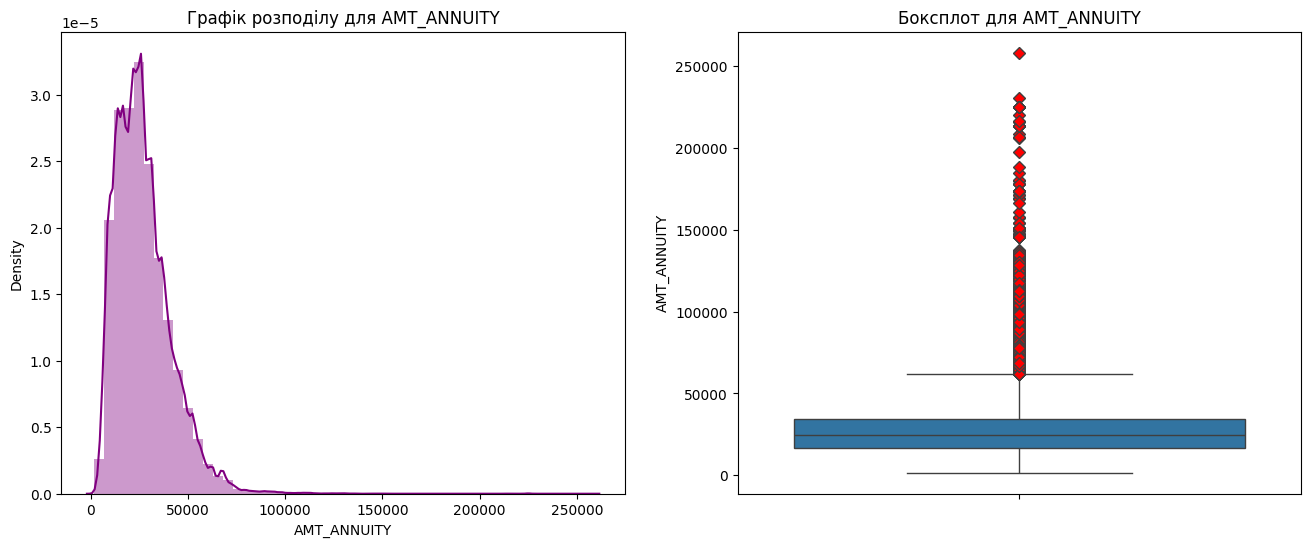

In [383]:
dist_box(df,'AMT_ANNUITY')

- Основна маса значень у 5k-40k, пік у 20k–30k
- Дуже довгий правий хвіст десь до 260k

**Висновок:** Це класичний **right-skewed heavy-tail distribution**, що є типовою ситуацією для фінансів - багато невеликих кредитів і декілька великих

### 1.1 - Валідація через іншу фічу(`AMT_GOODS_PRICE`)
Схожий висновок можно побачити у [`AMT_GOODS_PRICE` аналізу](https://colab.research.google.com/drive/1Np59UVZToJ721Lz7TEKThP0R6uQLHeTT#scrollTo=2_AMT_GOODS_PRICE_), де також можно побачити
дорогі покупки, як нерухомість та авто

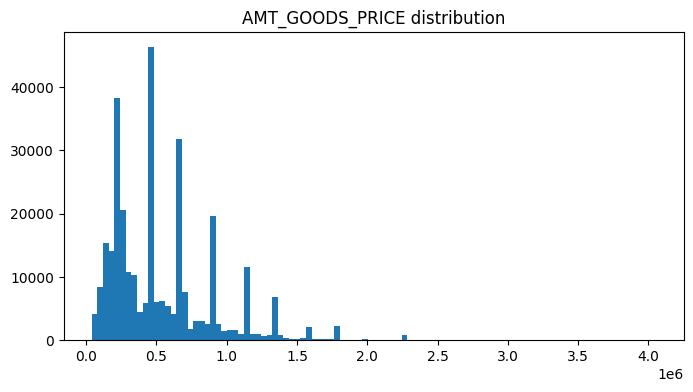

In [384]:
plt.figure(figsize=(8,4))
plt.hist(df['AMT_GOODS_PRICE'].dropna(), bins=100)
plt.title('AMT_GOODS_PRICE distribution')

plt.show()

> Як і у `AMT_ANNUITY`, на графіку присутній **right-skewed heavy-tail distribution**. Це можно інтерпретати через бізнес-логіку:
> - основна маса -> побутова техніка та дрібні кредити
> - хвіст -> авто та нерухомість

In [385]:
df[['AMT_GOODS_PRICE', 'AMT_ANNUITY']].corr()

AMT_GOODS_PRICE  AMT_ANNUITY
AMT_GOODS_PRICE             1.00         0.78
AMT_ANNUITY                 0.78         1.00

> Окрім розподілу, `AMT_ANNUITY` та `AMT_GOODS_PRICE` мають кореляцію = `0.78` - лінійний розподіл
>
> Це підтверджує, що високі значення `AMT_ANNUITY` здебільшого **обумовлені великими кредитами, а не помилками даних**

### 1.2 - Розрахунок IQR(upper та lower)


In [386]:
Q1 = df['AMT_ANNUITY'].quantile(0.25)
Q3 = df['AMT_ANNUITY'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f'Lower межа: {lower}')
print(f'Upper межа: {upper}')

Lower межа: -10584.0
Upper межа: 61704.0


In [387]:
outliers = df[
    (df['AMT_ANNUITY'] < lower) |
    (df['AMT_ANNUITY'] > upper)
]

print(f'Кількість викидів, рядків: {len(outliers)}')
print(f'Відсоток викидів: {round((len(outliers)/len(df)) * 100, 2)}%')
print(f'Діапазон верхніх викидів: {upper} - {df['AMT_ANNUITY'].describe().loc['max']}')
print(f'Мінімальне значення: {df['AMT_ANNUITY'].describe().loc['min']}')

Кількість викидів, рядків: 7504
Відсоток викидів: 2.44%
Діапазон верхніх викидів: 61704.0 - 258025.5
Мінімальне значення: 1615.5


> - **Нижніх викидів** нема: мережа від’ємна, а мінімум = `1615.5`
> - **Верхні викиди** мають діапазон `61704–258025` та `2.44%` викидів: не критично багато і типовий heavy tail
> `2.44%` це не шум, а інший сегмент клієнтів

### 1.3 - Обробка даних

Найкращий варіант для нас це лог-трансформація:
- лог зменшує вплив хвоста без втрати інформації
- викидів небагато: `2.44%`, менше `5%`
- вони реальні, що доведено через сильньну кореляцію з `AMT_GOODS_PRICE`


In [388]:
df['AMT_ANNUITY_LOG'] = np.log1p(df['AMT_ANNUITY'])

## 2 - Аналіз `CNT_FAM_MEMBERS`

`CNT_FAM_MEMBERS` - кількість членів сім'ї у клієнта

In [389]:
df['CNT_FAM_MEMBERS'].describe()

count   307509.00
mean         2.15
std          0.91
min          1.00
25%          2.00
50%          2.00
75%          3.00
max         20.00
Name: CNT_FAM_MEMBERS, dtype: float64

In [390]:
count = df['CNT_FAM_MEMBERS'].value_counts()
percent = df['CNT_FAM_MEMBERS'].value_counts(normalize = True) * 100

result = pd.concat([count, percent], axis=1)
result.columns = ['count', 'percent']

result.sort_values(by='count', ascending=False)


count  percent
CNT_FAM_MEMBERS                 
2.00             158357    51.50
1.00              67847    22.06
3.00              52601    17.11
4.00              24697     8.03
5.00               3478     1.13
6.00                408     0.13
7.00                 81     0.03
8.00                 20     0.01
9.00                  6     0.00
10.00                 3     0.00
14.00                 2     0.00
12.00                 2     0.00
20.00                 2     0.00
16.00                 2     0.00
13.00                 1     0.00
15.00                 1     0.00
11.00                 1     0.00

In [391]:
print('Процент людей з:')
print(f'- 1-4: {round(result.iloc[:4].sum()['percent'], 2)}%')
print(f'- 5: {round(result.loc[5, 'percent'], 2)}%')
print(f'- 6: {round(result.loc[6, 'percent'], 2)}%')
print(f'- 7: {round(result.loc[7:20].sum()['percent'], 2)}%')

Процент людей з:
- 1-4: 98.7%
- 5: 1.13%
- 6: 0.13%
- 7: 0.04%


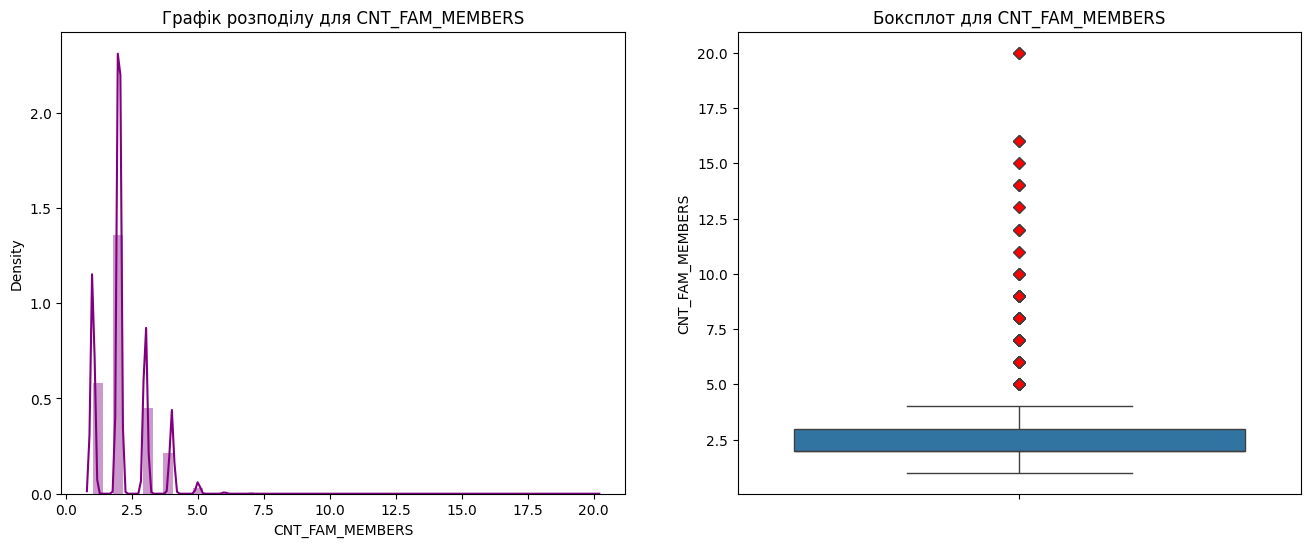

In [392]:
dist_box(df,'CNT_FAM_MEMBERS')

> `98.7%` знаходяться в діапазоні 1–4
>
> Значення 5–6 зустрічаються рідко, але є допустимими
>
> Значення >= 7 становлять менше `0.1%` вибірки та вважаються статистичними викидами



### 2.1 - Аналіз через IQR

In [393]:

Q1 = df['CNT_FAM_MEMBERS'].quantile(0.25)
Q3 = df['CNT_FAM_MEMBERS'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
print(f'Lower межа: {lower}')
print(f'Upper межа: {upper}')


Q1 = 2.0, Q3 = 3.0, IQR = 1.0
Lower межа: 0.5
Upper межа: 4.5


> - нормальний діапазон за IQR: `[0.5, 4.5]` або 1-4
> - 5+ -> статистичні викиди

### 2.2 - Обработка викидів

Для зменшення впливу викидів застосовано winsorization з верхньою межею 5:
- прибираємо вплив викидів
- зберегаємл інформацію про 'великі сім’і'


In [394]:
# Беремо значення 5 через IQR аналіз
df['CNT_FAM_MEMBERS_CLIPPED'] = df['CNT_FAM_MEMBERS'].clip(1, 5)

## Звіт аналізу ДЗ

### `AMT_ANNUITY`
`AMT_ANNUITY` має класичний right-skewed distribution, що є типовим для фінансів - більшість клієнтів мають невеликі кредити, а невелика частка — великі кредити (нерухомість або автомобілі)

Найкраща стратегія для обробки даних:
- не видаляти викиди, оскільки вони несуть корисну інформацію
- використати лог-трансформацію, оскільки викиди є частиною бізнес-логіки, а не шумом

### `CNT_FAM_MEMBERS`
`CNT_FAM_MEMBERS` показує, що більшість клієнтів мають 1–4 члени сім’ї, тоді як значення 5 і більше зустрічаються рідко. Значення понад 7 є поодинокими та формують довгий “хвіст” розподілу

Найкраща стратегія для обробки даних:
- не видаляти значення, щоб уникнути втрати інформації
- застосувати winsorization (обмеження верхньої межі), щоб зменшити вплив екстремальних значень на модель


###  **Висновок**
- `AMT_ANNUITY`: було застосовано **лог-трансформацію**, оскільки вона:
    - зберігає інформацію
    - зменшує skewness
    - підходить для heavy tail
- `CNT_FAM_MEMBERS`: було застосовано **winsorization**, оскільки вона:
  - зменшує вплив статистичних та екстремальних викидів
  - зберігає інформацію про наявність великих сімей
  - підвищує стабільність моделі

---



# Розбиття на біни безперервних колонок для аналізу

### Категоризація стовпця `AMT_GOODS_PRICE

In [395]:
df['AMT_GOODS_PRICE'].value_counts().sort_values(ascending = False).head()

AMT_GOODS_PRICE
450000.00    26022
225000.00    25282
675000.00    24962
900000.00    15416
270000.00    11428
Name: count, dtype: int64

In [396]:
(df['AMT_GOODS_PRICE'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_GOODS_PRICE
450000.00   8.46
225000.00   8.22
675000.00   8.12
900000.00   5.01
270000.00   3.72
Name: proportion, dtype: float64

Подивимось статистичний звіт для `AMT_GOODS_PRICE

In [397]:
df['AMT_GOODS_PRICE'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count     307511.00
mean      538135.43
std       369416.30
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
99%      1800000.00
99.99%   2933964.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

Розподілимо значення в `AMT_GOODS_PRICE` на 5 бінів і створимо новий стовпець `AMT_GOODS_PRICE_CATEGORY`.

In [398]:
df['AMT_GOODS_PRICE_CATEGORY'] = pd.cut(df['AMT_GOODS_PRICE'],
                                        bins = 5, labels = ['very low', 'low', 'medium', 'high', 'very high'])

Перевірка заповнення значень згідно з очікуванням

In [399]:
df['AMT_GOODS_PRICE_CATEGORY'].value_counts()

AMT_GOODS_PRICE_CATEGORY
very low     247247
low           56091
medium         4108
high             47
very high        18
Name: count, dtype: int64

### Категоризація стовпця `YEARS_BIRTH`

Ми будемо класифікувати `YEARS_BIRTH` замість `DAYS_BIRTH`, оскільки роки легше інтерпретувати, ніж дні

In [400]:
df['YEARS_BIRTH'].value_counts().sort_values(ascending = False).head()

YEARS_BIRTH
39    9023
38    8793
37    8727
40    8602
41    8495
Name: count, dtype: int64

In [401]:
(df['YEARS_BIRTH'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

YEARS_BIRTH
39   2.93
38   2.86
37   2.84
40   2.80
41   2.76
Name: proportion, dtype: float64

Подивимось статистичний звіт для  `YEARS_BIRTH`

In [402]:
df['YEARS_BIRTH'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    307511.00
mean         43.94
std          11.96
min          21.00
25%          34.00
50%          43.00
75%          54.00
99%          67.00
99.99%       69.00
max          69.00
Name: YEARS_BIRTH, dtype: float64

Категоризуймо значення з `YEARS_BIRTH` у новий стовпець `YEARS_BIRTH_CATEGORY`.

In [403]:
df['YEARS_BIRTH_CATEGORY'] = df['YEARS_BIRTH'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [404]:
df['YEARS_BIRTH_CATEGORY'].value_counts().sort_values(ascending = False)

YEARS_BIRTH_CATEGORY
30-40    82770
40-50    75509
50-60    67955
20-30    48869
60-70    32408
Name: count, dtype: int64

### Категоризація стовпця `YEARS_REGISTRATION`

Ми будемо класифікувати `YEARS_REGISTRATION` замість `DAYS_REGISTRATION`, оскільки роки легше інтерпретувати, ніж дні

In [405]:
df['YEARS_REGISTRATION'].value_counts().sort_values(ascending = False).head()

YEARS_REGISTRATION
1     15661
2     15564
3     13894
13    12866
12    12697
Name: count, dtype: int64

In [406]:
(df['YEARS_REGISTRATION'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

YEARS_REGISTRATION
1    5.09
2    5.06
3    4.52
13   4.18
12   4.13
Name: proportion, dtype: float64

Подивимось статистичний звіт для `YEARS_REGISTRATION`

In [407]:
df['YEARS_REGISTRATION'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    307511.00
mean         13.66
std           9.66
min           0.00
25%           6.00
50%          12.00
75%          20.00
99%          38.00
99.99%       54.25
max          68.00
Name: YEARS_REGISTRATION, dtype: float64

Категоризуймо значення з `YEARS_REGISTRATION` в новий стовпець `YEARS_REGISTRATION_CATEGORY`.

In [408]:
df['YEARS_REGISTRATION_CATEGORY'] = df['YEARS_REGISTRATION'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [409]:
df['YEARS_REGISTRATION_CATEGORY'].value_counts().sort_values(ascending = False)

YEARS_REGISTRATION_CATEGORY
0-20     230697
20-30     59288
30-40     16051
40-50      1406
50-60        60
60-70         9
Name: count, dtype: int64

# Зберігання оновлених даних зі стисненням

In [410]:
# filename = "drive/MyDrive/Machine Learning для людей/data/credit/application_data_processed"
# filename = "drive/MyDrive/Colab_Notebooks/_DLA_/module_1/data/credit/application_data_processed"
# compression_options = dict(method='zip', archive_name=f'{filename}.csv')
# df.to_csv(f'{filename}.zip', compression=compression_options, index=False)

# Перевірка дисбалансу для цільового стовпця `TARGET`

### Аналіз стовпця `TARGET`

In [411]:
df['TARGET'].value_counts().sort_values(ascending = False)

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [412]:
df['TARGET'].value_counts(normalize = True).sort_values(ascending = False) * 100

TARGET
0   91.93
1    8.07
Name: proportion, dtype: float64

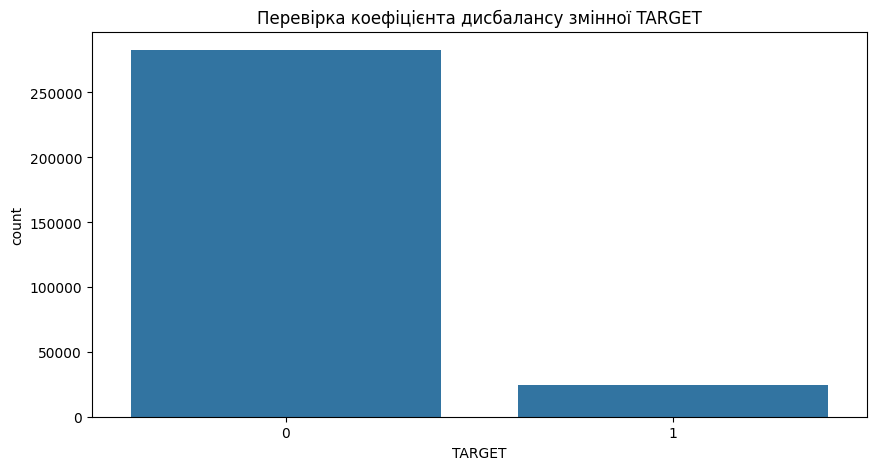

In [413]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['TARGET'], data = df)
plt.title('Перевірка коефіцієнта дисбалансу змінної TARGET')
plt.show()

**Спостереження**

- Ми маємо дисбаланс у змінній `TARGET` на основі % спостережень
 - Значення `TARGET` 1 - це клієнт, який має труднощі з оплатою (прострочення платежу більше ніж на X днів принаймні за одним з перших Y платежів за кредитом). Це лише 8,07% даних
 - Значення `TARGET` 0 - всі інші випадки, окрім 1. Це 91,93% даних

# Розподіл даних на основі `TARGET`

### Створіть новий фрейм даних зі значенням `TARGET` 1
- Значення `TARGET` 1 представляє клієнта з платіжними труднощами (він/вона прострочив платіж більш ніж на X днів принаймні по одному з перших Y платежів за кредитом). Це лише 8,07% даних

In [414]:
df1 = df[df['TARGET'] == 1]

In [415]:
df1.TARGET.value_counts()

TARGET
1    24825
Name: count, dtype: int64

### Створити новий фрейм даних зі значенням `TARGET` 0
- Значення `TARGET` 0 представляє всі інші випадки, крім 1. Це 91.93% даних

In [416]:
df0 = df[df['TARGET'] == 0]

In [417]:
df0.TARGET.value_counts()

TARGET
0    282686
Name: count, dtype: int64

# Одномірний аналіз категоріальних змінних

### Аналіз стовпця `NAME_CONTRACT_TYPE`

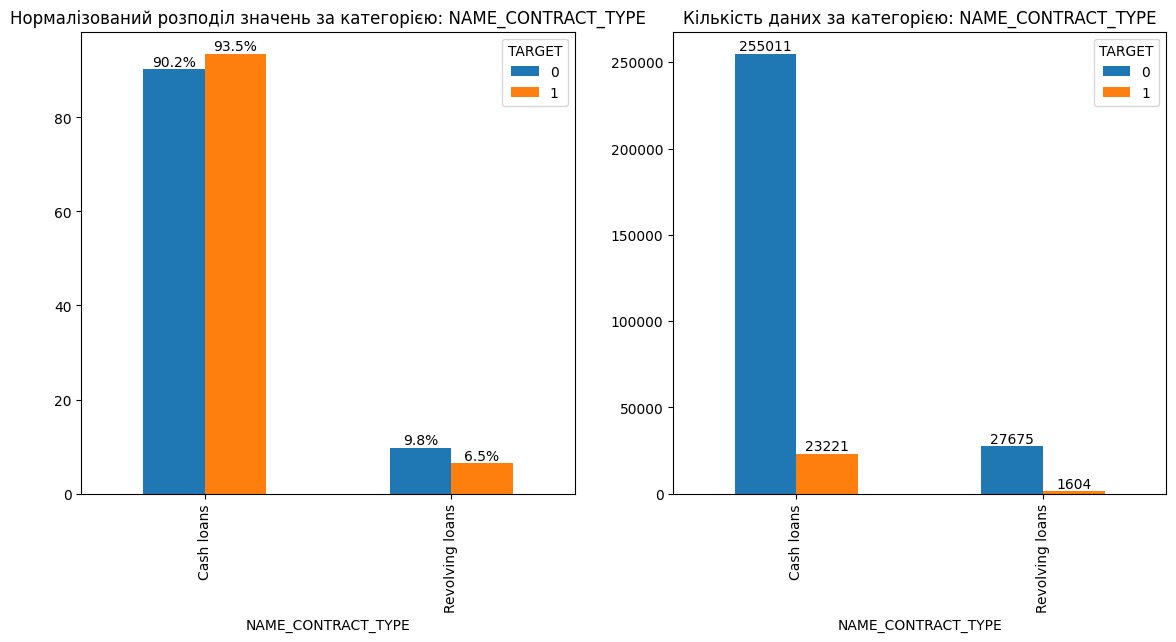

In [418]:
uni_cat_target_compare(df, 'NAME_CONTRACT_TYPE')

**Спостереження**

- Дивлячись на гістограми, ми не бачимо суттєвих відмінностей у `NAME_CONTRACT_TYPE` між клієнтами, які мають труднощі з оплатою, та клієнтами, які платять вчасно

**Висновок**
- Колонка `NAME_CONTRACT_TYPE` не надає жодних переконливих доказів на користь клієнтів, які мають труднощі з оплатою АБО вчасно сплачують

# ДЗ 4. Одновимірний аналіз категоріальної колонки

За наведеним прикладом вище, проведіть аналіз залежності між категоріальною колонкою і цільовою для колонок
- CODE_GENDER
- FLAG_OWN_CAR

Опціонально (для тих, кому цікаво дослідити більше даних)
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS


Чи є вплив цих змінних на цільову та який саме?

## 1 - `CODE_GENDER`
`CODE_GENDER` - стать клієнта, який подав заявку на кредит. Після заповнення, має 2 значення: `F` та `M`

TARGET:
- `1` – клієнт мав прострочку (дефолт)
- `0` – без дефолту


In [419]:
def categorical_target_analysis(df, column, target='TARGET'):
    result = df.groupby(column)[target].agg(['mean','count'])
    result.columns = ['default_rate', 'count']

    result['default_rate'] = (result['default_rate'] * 100).round(2)

    return result.sort_values('default_rate', ascending=False)

In [420]:
def relative_default_difference(df, cat_col, group1, group2, target_col='TARGET'):
    rates = df.groupby(cat_col)[target_col].mean()
    r1 = rates.loc[group1]
    r2 = rates.loc[group2]
    relative = (r1 - r2) / r2 * 100
    return r1, r2, relative

In [421]:
categorical_target_analysis(df, 'CODE_GENDER')

default_rate   count
CODE_GENDER                      
M                   10.14  105059
F                    7.00  202452

In [422]:
male_rate, female_rate, relative_diff = relative_default_difference(df, 'CODE_GENDER', group1='M', group2='F')

print(f'Default (Female): {female_rate:.4f}')
print(f'Default (Male):   {male_rate:.4f}')
print(f'Різниця:   {relative_diff:.2f}%')

Default (Female): 0.0700
Default (Male):   0.1014
Різниця:   44.90%


> Чоловіки дефолтять приблизно на `45%` частіше

Можливі причини:
- різниця у типах зайнятості
- вища частка самозайнятих
- поведінкові фінансові фактори


## 2 - `FLAG_OWN_CAR`
`FLAG_OWN_CAR` - чи має клієнт машину:
- `Y` – має авто
- `N` – не має авто


In [423]:
categorical_target_analysis(df, 'FLAG_OWN_CAR')

default_rate   count
FLAG_OWN_CAR                      
0                     8.50  202924
1                     7.24  104587

In [424]:
with_car_rate, no_car_rate, relative_diff = relative_default_difference(df, 'FLAG_OWN_CAR', group1=1, group2=0)

print(f'Без машини: {no_car_rate:.4f}')
print(f'З машиною:   {with_car_rate:.4f}')
print(f'Різниця:   {relative_diff:.2f}%')

Без машини: 0.0850
З машиною:   0.0724
Різниця:   -14.78%


> Вплив є, але слабший, ніж у статі
>
>  Клієнти з автомобілем мають на `14.8%` менший відносний ризик дефолту, ніж клієнти без автомобіля


In [425]:
no_car_rate, with_car_rate, relative_diff = relative_default_difference(
    df, 'FLAG_OWN_CAR', group1=0, group2=1
)

print(f"Без машини: {no_car_rate:.4f}")
print(f"З машиною:  {with_car_rate:.4f}")
print(f"Різниця:    {relative_diff:.2f}%")


Без машини: 0.0850
З машиною:  0.0724
Різниця:    17.35%


> клієнти без автомобіля мають `17%` вищий ризик дефолту, ніж клієнти з автомобілем

Власність авто часто корелює з:
- стабільнішим доходом
- кращим фінансовим станом

## Звіт аналізу ДЗ

### `CODE_GENDER`
`CODE_GENDER` — стать клієнта, який подав заявку на кредит. Аналіз показав суттєву різницю у рівні дефолту між категоріями:
- Жінки: ~7.0% дефолтів
- Чоловіки: ~10.1% дефолтів

Ця ознака є інформативною і підходить для використання у моделі:
  - Чоловіки -> вищий ризик дефолту
  - Жінки -> нижчий ризик дефолту

### `FLAG_OWN_CAR`
`FLAG_OWN_CAR` — індикатор наявності автомобіля у клієнта

Аналіз показав, що:
- клієнти без автомобіля мають рівень дефолту близько `8.5%`
- клієнти з автомобілем — близько `7.2%`

Вплив ознаки на цільову змінну присутній, але є слабшим, ніж у `CODE_GENDER`. Ця ознака слабко інформативна, але корисна в поєднанні з іншими фічами


###  **Висновок**
- `CODE_GENDER` вплив є:
    - підходить для використання у моделі
    - можна застосовувати **target encoding / one-hot**

- `FLAG_OWN_CAR` вплив слабкий:
  - Не ключовий предиктор, але допомагає як додаткова інформацію
  - можна застосовувати **binary encoding / one-hot**

---



# Кореляційний аналіз числових змінних

### Побудова кореляційної матриці для випадків із платіжними труднощами

In [426]:
df1.select_dtypes(include=["int64","float64"]).shape

(24825, 42)

Є 66 числових стовпчиків. Створимо кореляційну матрицб `corr` для кращого перегляду результатів

In [427]:
corr_df1 = df1.select_dtypes(include=["int64","float64"]).corr()

In [428]:
corr_df1.head()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
TARGET               NaN           NaN               NaN         NaN   
CNT_CHILDREN         NaN          1.00              0.00       -0.00   
AMT_INCOME_TOTAL     NaN          0.00              1.00        0.04   
AMT_CREDIT           NaN         -0.00              0.04        1.00   
AMT_ANNUITY          NaN          0.03              0.05        0.75   

                  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
TARGET                    NaN              NaN                         NaN   
CNT_CHILDREN             0.03            -0.01                       -0.03   
AMT_INCOME_TOTAL         0.05             0.04                        0.01   
AMT_CREDIT               0.75             0.98                        0.07   
AMT_ANNUITY              1.00             0.75                        0.07   

                  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
TARGET                   NaN            NaN                NaN   
CNT_CHILDREN           -0.26          -0.19              -0.15   
AMT_INCOME_TOTAL       -0.00          -0.01              -0.00   
AMT_CREDIT              0.14           0.00               0.03   
AMT_ANNUITY             0.01          -0.08              -0.03   

                  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
TARGET                        NaN              NaN                   NaN   
CNT_CHILDREN                 0.03             0.89                  0.04   
AMT_INCOME_TOTAL             0.00             0.01                 -0.02   
AMT_CREDIT                   0.05             0.05                 -0.06   
AMT_ANNUITY                  0.02             0.08                 -0.07   

                  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
TARGET                                    NaN                      NaN   
CNT_CHILDREN                             0.04                    -0.02   
AMT_INCOME_TOTAL                        -0.02                     0.01   
AMT_CREDIT                              -0.07                     0.03   
AMT_ANNUITY                             -0.09                     0.03   

                  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
TARGET                                   NaN                         NaN   
CNT_CHILDREN                           -0.02                       -0.02   
AMT_INCOME_TOTAL                        0.01                        0.01   
AMT_CREDIT                              0.02                        0.03   
AMT_ANNUITY                             0.03                        0.07   

                  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
TARGET                                    NaN                     NaN   
CNT_CHILDREN                            -0.01                   -0.00   
AMT_INCOME_TOTAL                         0.01                   -0.00   
AMT_CREDIT                               0.03                   -0.03   
AMT_ANNUITY                              0.06                   -0.01   

                  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
TARGET                               NaN                      NaN   
CNT_CHILDREN                        0.05                     0.05   
AMT_INCOME_TOTAL                   -0.00                    -0.00   
AMT_CREDIT                         -0.04                    -0.02   
AMT_ANNUITY                         0.00                     0.01   

                  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
TARGET                     NaN           NaN                       NaN   
CNT_CHILDREN             -0.01         -0.02                      0.03   
AMT_INCOME_TOTAL          0.01         -0.02                     -0.00   
AMT_CREDIT                0.12          0.08                      0.02   
AMT_ANNUITY               0.12          0.04                      0.01   

                  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL

Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

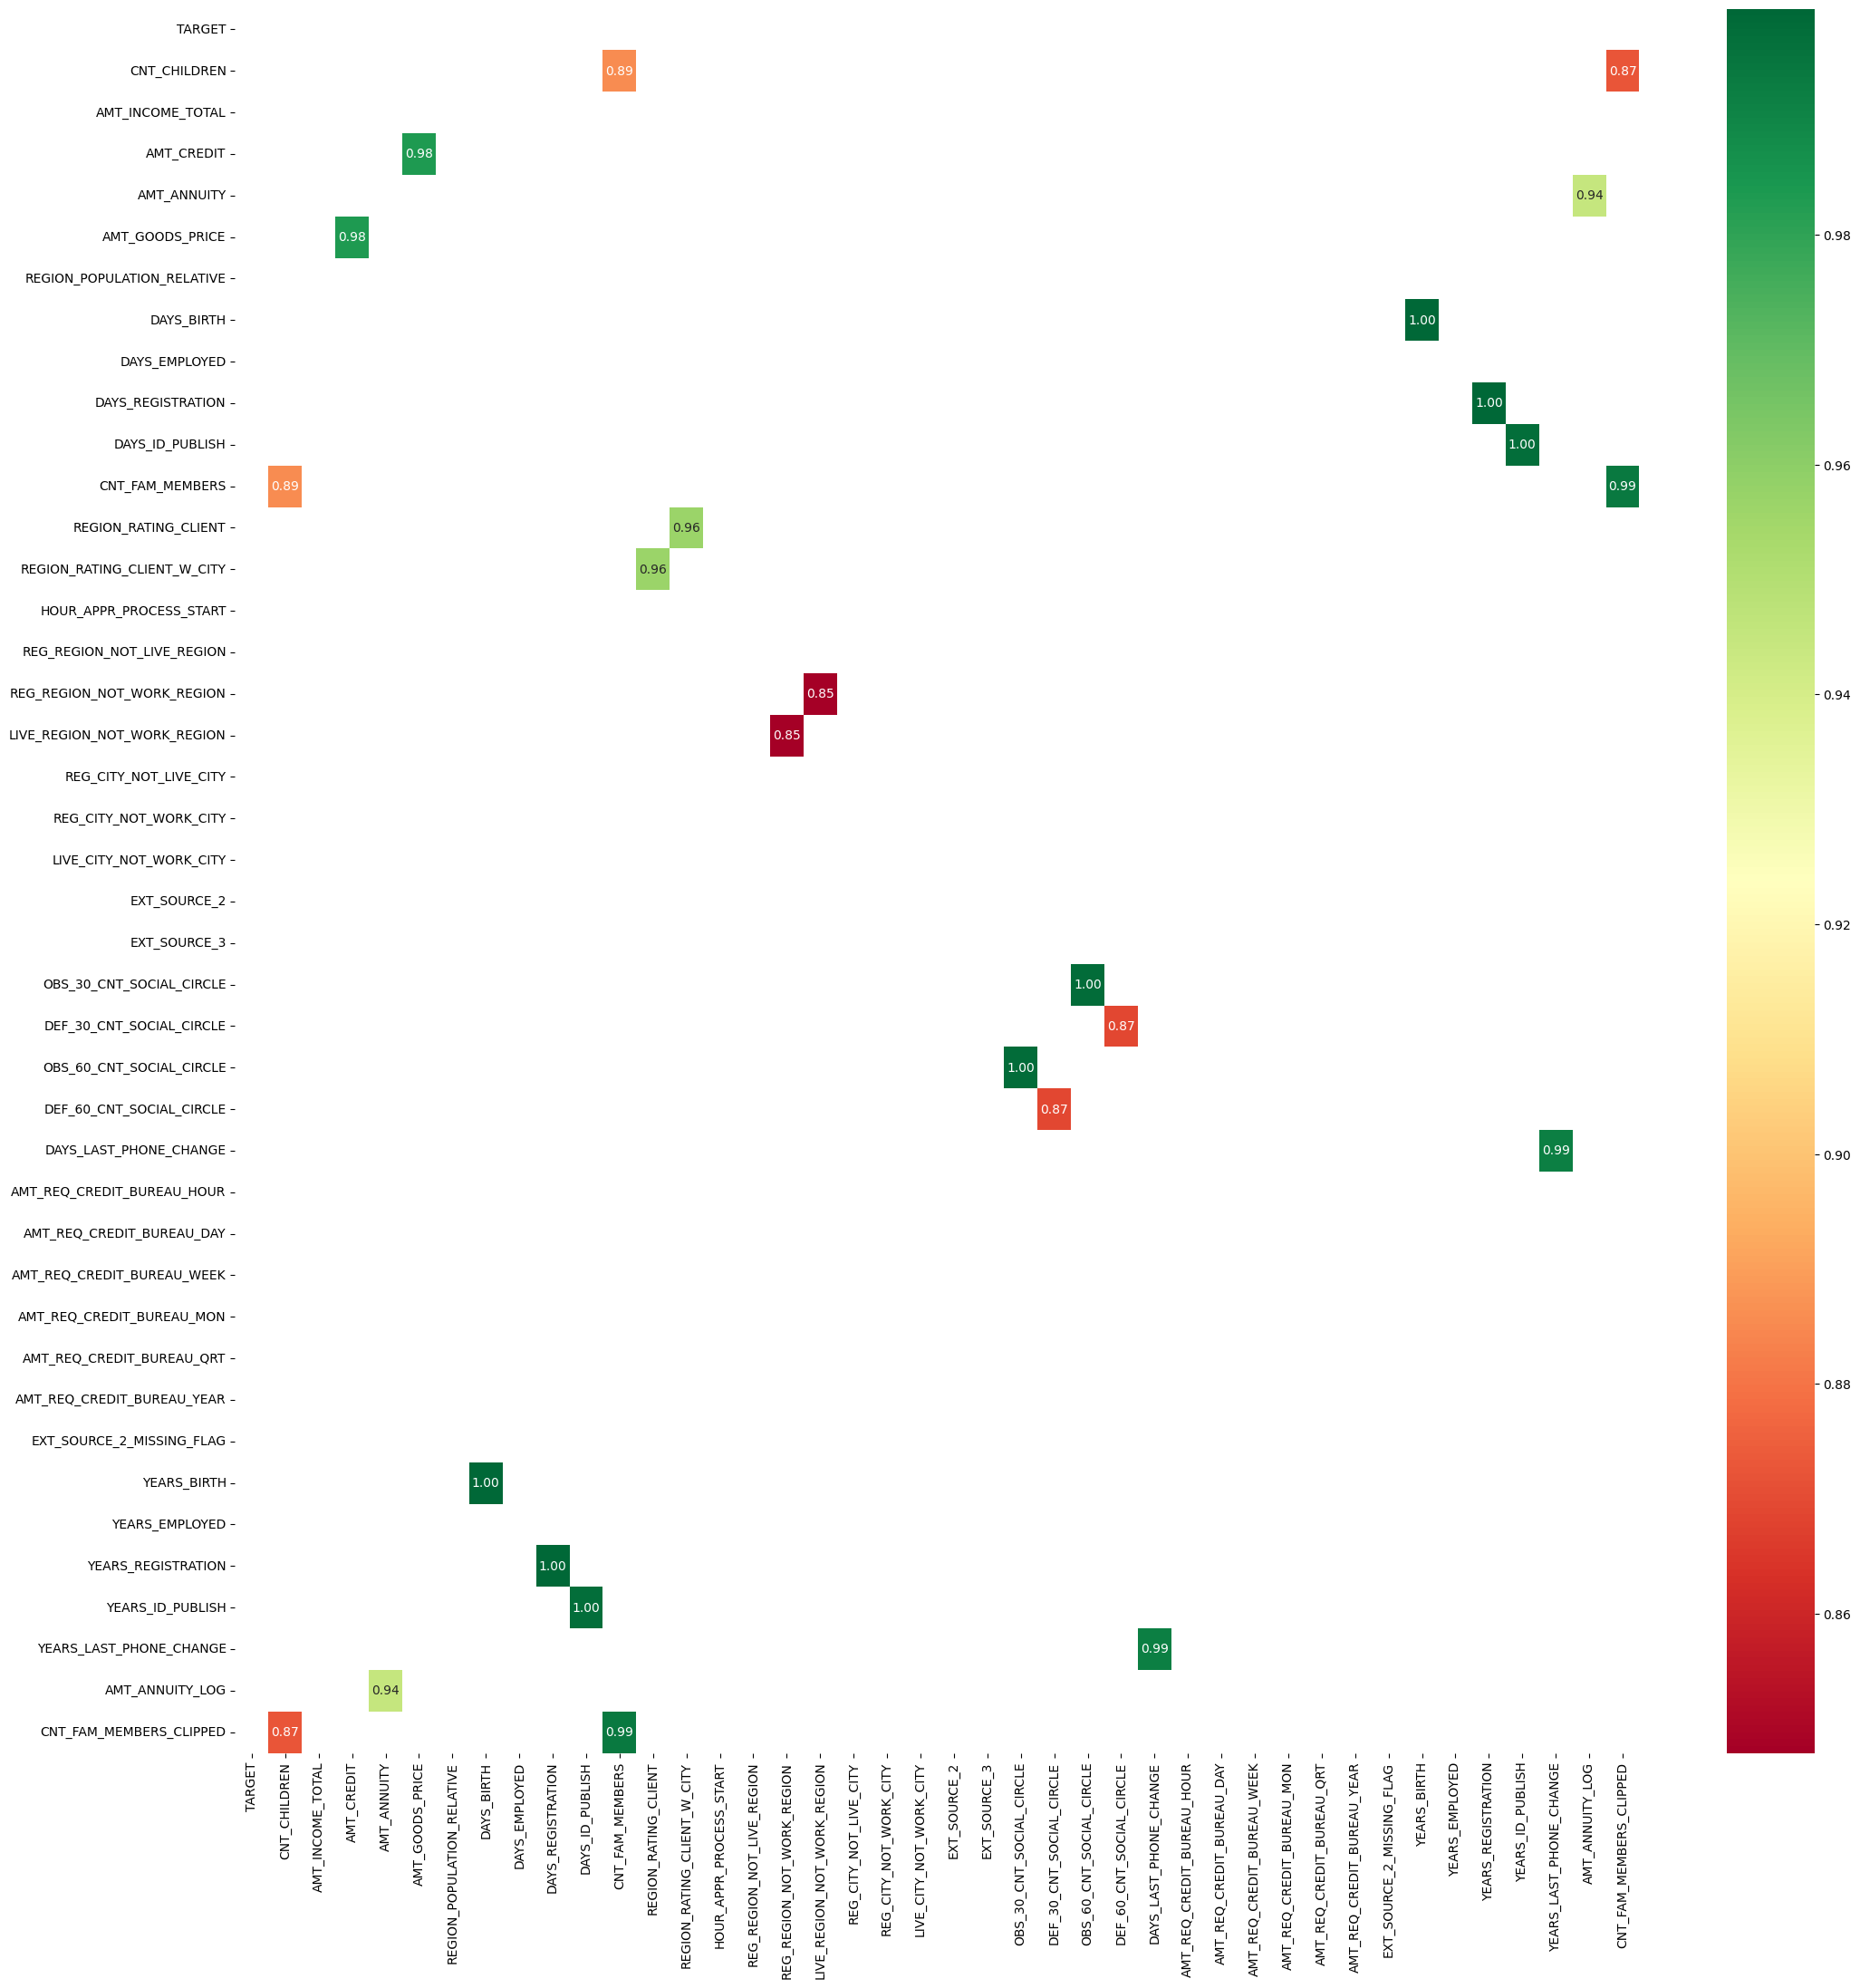

In [429]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1[(corr_df1 >= 0.8) & (corr_df1 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для випадків із платіжними труднощами

In [430]:
corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending = False).head(22)

AMT_GOODS_PRICE              AMT_CREDIT                    0.98
AMT_CREDIT                   AMT_GOODS_PRICE               0.98
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.96
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.96
AMT_ANNUITY_LOG              AMT_ANNUITY                   0.94
AMT_ANNUITY                  AMT_ANNUITY_LOG               0.94
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.89
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.89
CNT_CHILDREN                 CNT_FAM_MEMBERS_CLIPPED       0.87
CNT_FAM_MEMBERS_CLIPPED      CNT_CHILDREN                  0.87
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.87
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.87
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.85
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.85
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.78
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.78
AMT_ANNUITY                  AMT_GOODS_PRICE               0.75
AMT_GOODS_PRICE              AMT_ANNUITY                   0.75
AMT_ANNUITY                  AMT_CREDIT                    0.75
AMT_CREDIT                   AMT_ANNUITY                   0.75
                             AMT_ANNUITY_LOG               0.74
AMT_ANNUITY_LOG              AMT_CREDIT                    0.74
dtype: float64

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE -              AMT_CREDIT                    0.98
- REGION_RATING_CLIENT -         REGION_RATING_CLIENT_W_CITY   0.96
- CNT_FAM_MEMBERS -              CNT_CHILDREN                  0.89
- DEF_60_CNT_SOCIAL_CIRCLE -     DEF_30_CNT_SOCIAL_CIRCLE      0.87
- REG_REGION_NOT_WORK_REGION -   LIVE_REGION_NOT_WORK_REGION   0.85
- LIVE_CITY_NOT_WORK_CITY -      REG_CITY_NOT_WORK_CITY        0.78
- AMT_ANNUITY -                  AMT_GOODS_PRICE               0.75
- AMT_ANNUITY -                  AMT_CREDIT                    0.75
- DAYS_EMPLOYED -                FLAG_DOCUMENT_6               0.62
- DAYS_BIRTH -                   DAYS_EMPLOYED                 0.58

### Побудова кореляційної матриці для випадків із вчасними платежеми

In [431]:
df0.select_dtypes(include=["int64","float64"]).shape

(282686, 42)

Є 66 числових стовпчиків. Створимо кореляційну матрицю `corr` для кращого перегляду результатів

In [432]:
corr_df0 = df0.select_dtypes(include=["int64","float64"]).corr()

In [433]:
corr_df0.head()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
TARGET               NaN           NaN               NaN         NaN   
CNT_CHILDREN         NaN          1.00              0.03        0.00   
AMT_INCOME_TOTAL     NaN          0.03              1.00        0.34   
AMT_CREDIT           NaN          0.00              0.34        1.00   
AMT_ANNUITY          NaN          0.02              0.42        0.77   

                  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
TARGET                    NaN              NaN                         NaN   
CNT_CHILDREN             0.02            -0.00                       -0.02   
AMT_INCOME_TOTAL         0.42             0.35                        0.17   
AMT_CREDIT               0.77             0.99                        0.10   
AMT_ANNUITY              1.00             0.78                        0.12   

                  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
TARGET                   NaN            NaN                NaN   
CNT_CHILDREN           -0.34          -0.25              -0.19   
AMT_INCOME_TOTAL       -0.06          -0.14              -0.06   
AMT_CREDIT              0.05          -0.07              -0.01   
AMT_ANNUITY            -0.01          -0.10              -0.04   

                  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
TARGET                        NaN              NaN                   NaN   
CNT_CHILDREN                 0.03             0.88                  0.02   
AMT_INCOME_TOTAL            -0.02             0.03                 -0.19   
AMT_CREDIT                   0.00             0.06                 -0.10   
AMT_ANNUITY                 -0.01             0.08                 -0.13   

                  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
TARGET                                    NaN                      NaN   
CNT_CHILDREN                             0.02                    -0.01   
AMT_INCOME_TOTAL                        -0.20                     0.08   
AMT_CREDIT                              -0.11                     0.05   
AMT_ANNUITY                             -0.15                     0.05   

                  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
TARGET                                   NaN                         NaN   
CNT_CHILDREN                           -0.01                        0.01   
AMT_INCOME_TOTAL                        0.07                        0.14   
AMT_CREDIT                              0.02                        0.05   
AMT_ANNUITY                             0.04                        0.08   

                  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
TARGET                                    NaN                     NaN   
CNT_CHILDREN                             0.02                    0.02   
AMT_INCOME_TOTAL                         0.13                    0.01   
AMT_CREDIT                               0.05                   -0.03   
AMT_ANNUITY                              0.08                   -0.01   

                  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
TARGET                               NaN                      NaN   
CNT_CHILDREN                        0.07                     0.07   
AMT_INCOME_TOTAL                    0.02                     0.02   
AMT_CREDIT                         -0.02                     0.00   
AMT_ANNUITY                         0.00                     0.01   

                  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
TARGET                     NaN           NaN                       NaN   
CNT_CHILDREN             -0.02         -0.04                      0.01   
AMT_INCOME_TOTAL          0.14         -0.07                     -0.03   
AMT_CREDIT                0.13          0.04                     -0.00   
AMT_ANNUITY               0.13          0.03                     -0.01   

                  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL

Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

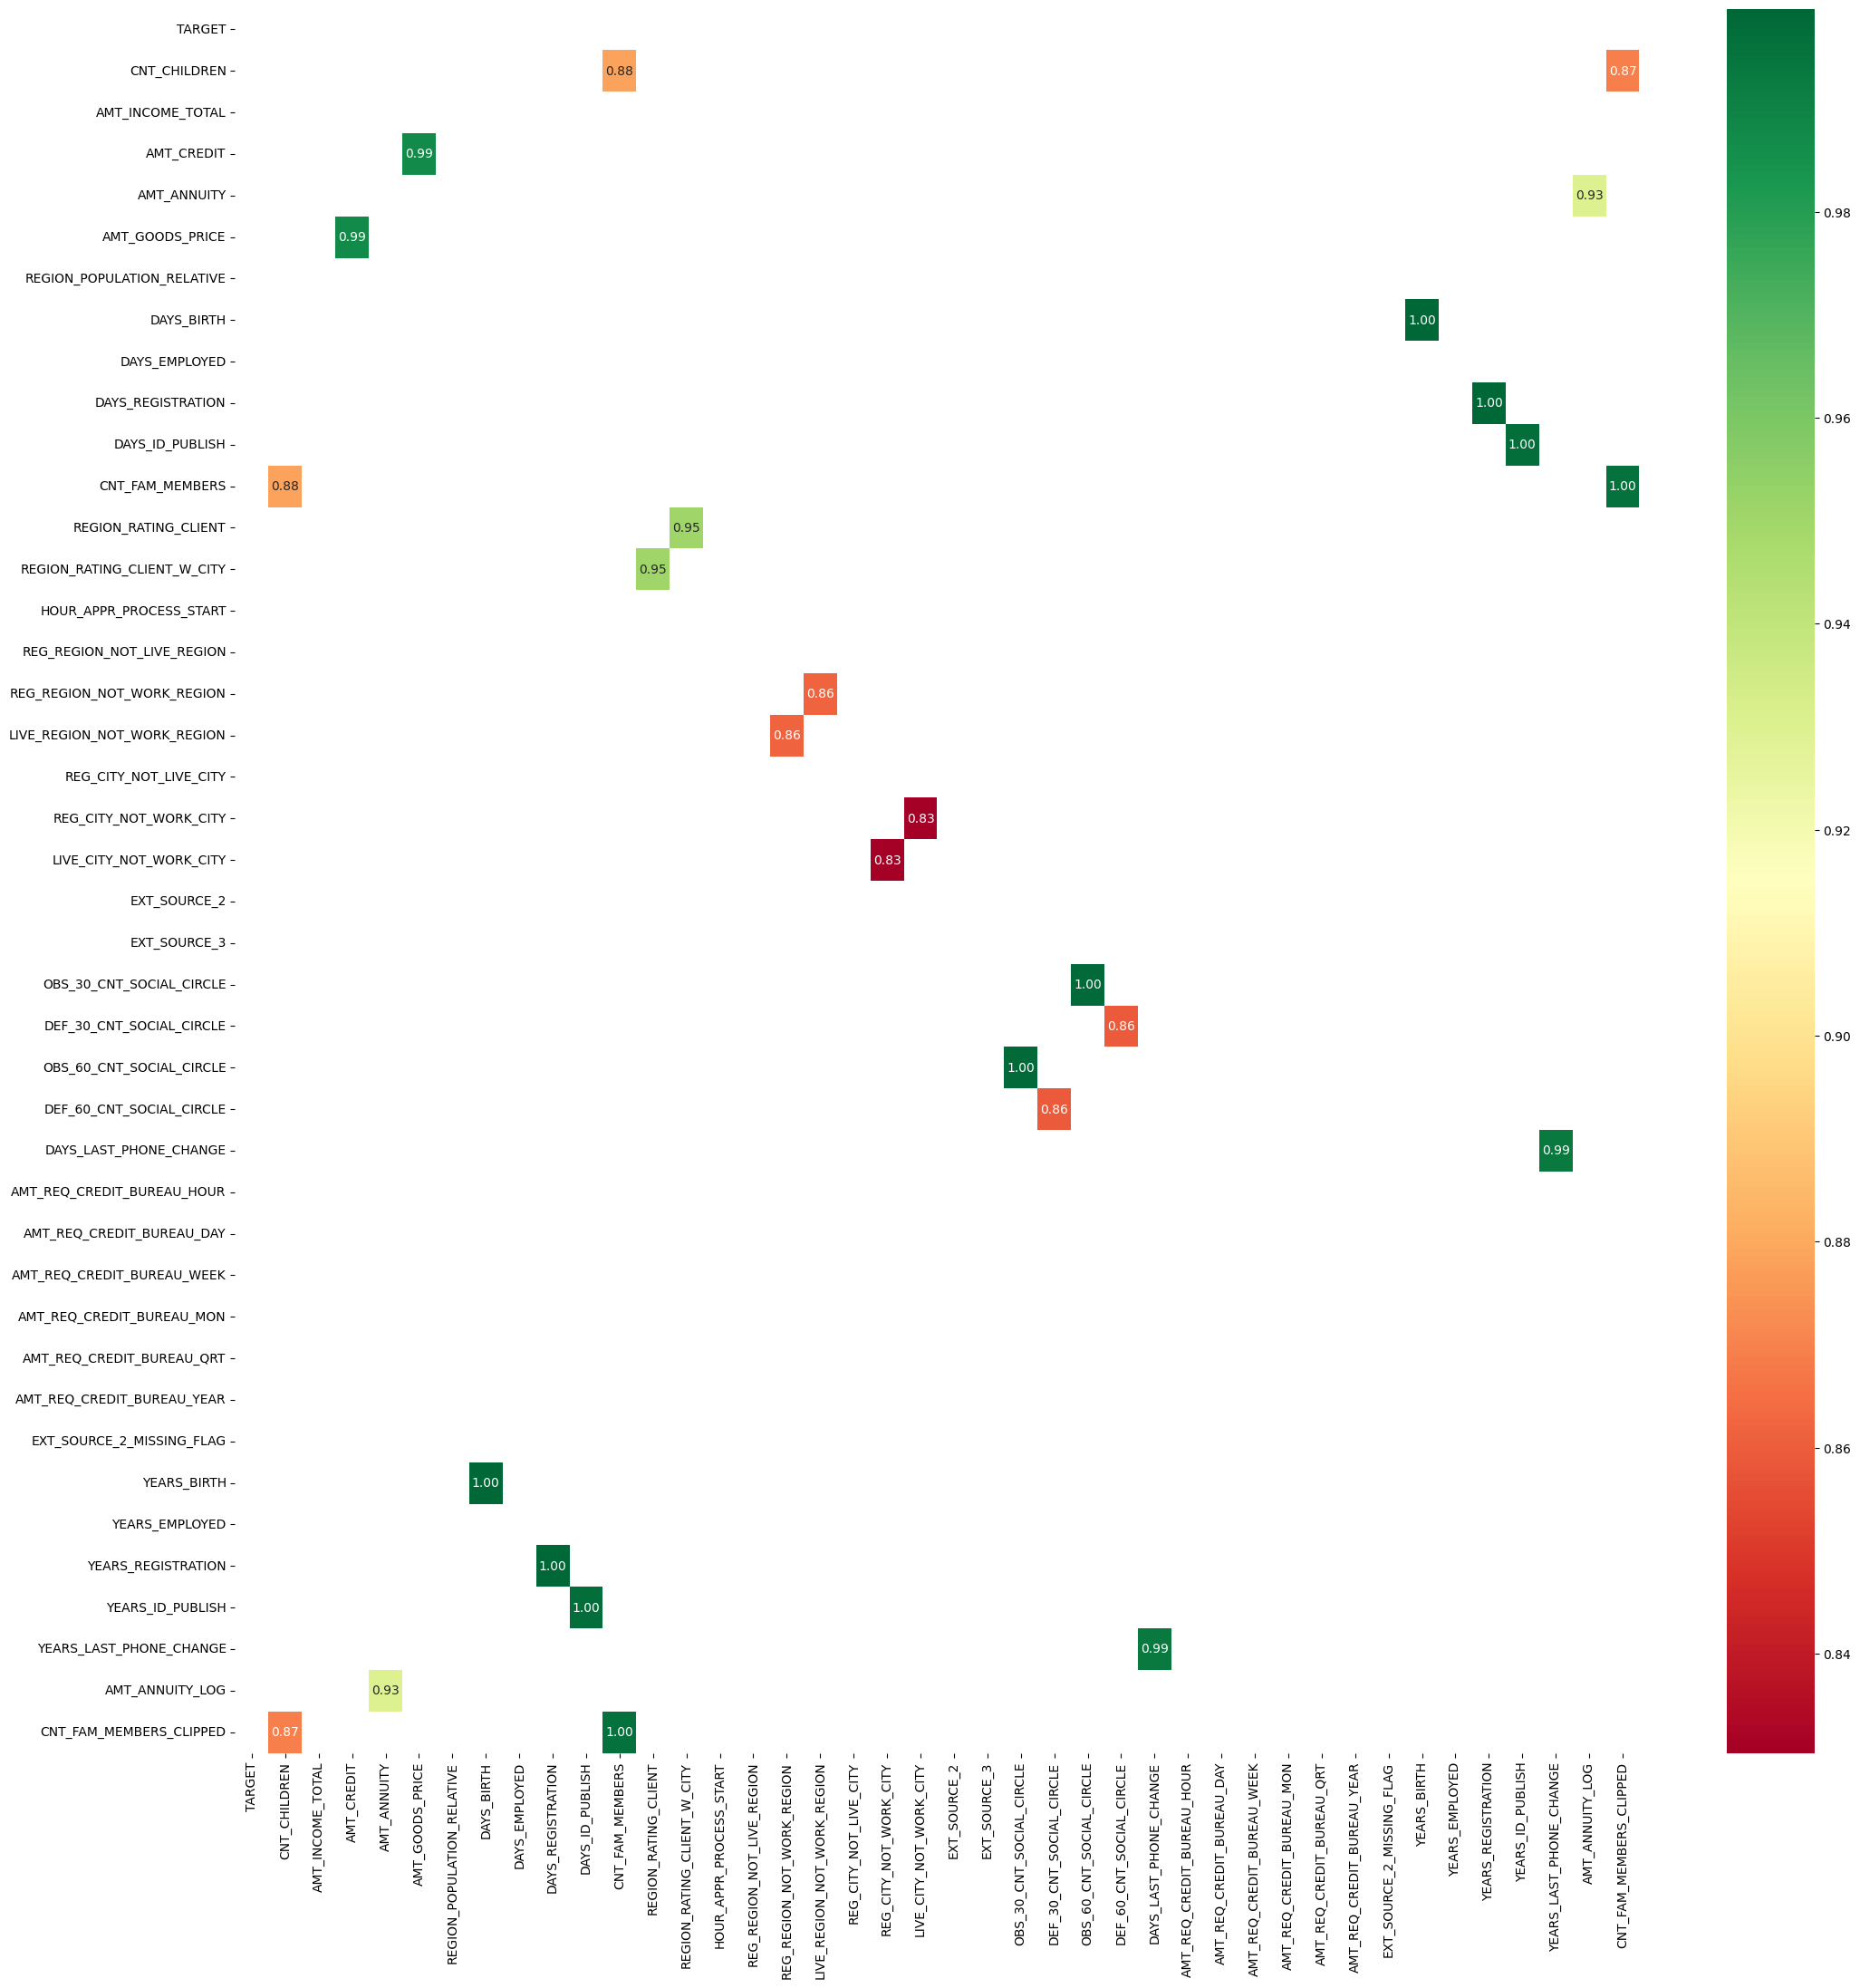

In [434]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df0[(corr_df0 >= 0.8) & (corr_df0 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для вчасних платежів

In [435]:
corr_df0[corr_df0 <= 0.99].unstack().sort_values(ascending = False).head(28)

AMT_CREDIT                   AMT_GOODS_PRICE               0.99
AMT_GOODS_PRICE              AMT_CREDIT                    0.99
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.95
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
AMT_ANNUITY                  AMT_ANNUITY_LOG               0.93
AMT_ANNUITY_LOG              AMT_ANNUITY                   0.93
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.88
CNT_FAM_MEMBERS_CLIPPED      CNT_CHILDREN                  0.87
CNT_CHILDREN                 CNT_FAM_MEMBERS_CLIPPED       0.87
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.86
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.86
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.83
AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
AMT_GOODS_PRICE              AMT_ANNUITY                   0.78
AMT_ANNUITY                  AMT_CREDIT                    0.77
AMT_CREDIT                   AMT_ANNUITY                   0.77
AMT_ANNUITY_LOG              AMT_CREDIT                    0.77
AMT_CREDIT                   AMT_ANNUITY_LOG               0.77
AMT_GOODS_PRICE              AMT_ANNUITY_LOG               0.76
AMT_ANNUITY_LOG              AMT_GOODS_PRICE               0.76
DAYS_BIRTH                   DAYS_EMPLOYED                 0.63
DAYS_EMPLOYED                DAYS_BIRTH                    0.63
DAYS_BIRTH                   YEARS_EMPLOYED                0.63
YEARS_EMPLOYED               DAYS_BIRTH                    0.63
dtype: float64

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE              AMT_CREDIT                    0.99
- REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
- CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
- REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
- DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
- LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
- AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
- AMT_ANNUITY                  AMT_CREDIT                    0.77
- DAYS_BIRTH                   DAYS_EMPLOYED                 0.63
- DAYS_EMPLOYED                FLAG_DOCUMENT_6               0.60

### Порівняємо 10 найкращих кореляцій між випадками із платіжними труднощами та вчасними платежами

**Спостереження**

- Топ-10 кореляцій для Труднощів з оплатою та Вчасних платежів однакові, за винятком незначних відмінностей у відсотках кореляції
- Найвища кореляція для комбінації `AMT_GOODS_PRICE` та `AMT_CREDIT`.
- Для набору даних "Труднощі з оплатою" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,98
- Для набору даних "Вчасні платежі" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,99

# Одновимірний аналіз числових змінних

### Аналіз стовпця `AMT_CREDIT`

#### Пошук викидів в `AMT_CREDIT` при випадках із платіжними труднощами

Розрахунок IQR (Inter Quartile range)

In [436]:
Q1 = df1['AMT_CREDIT'].quantile(0.25)
Q3 = df1['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

448915.5


Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [437]:
Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value1))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value1))

Мінімальне значення, до якого існують викиди: -388973.25
Максимальне значення, після якого існують викиди: 1406688.75


#### Пошук викидів в `AMT_CREDIT` при випадках із вчасними оплатами

Розрахунок IQR (Inter Quartile range)

In [438]:
Q1 = df0['AMT_CREDIT'].quantile(0.25)
Q3 = df0['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

540000.0


Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [439]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: -540000.0
Максимальне значення, після якого існують викиди: 1620000.0


Видалення викидів і побудова діаграми розподілу

In [440]:
def kde_no_outliers(df0, df1, Max_value0, Max_value1, column):
  plt.figure(figsize = (14,6))
  sns.kdeplot(df1[df1[column] <= Max_value1][column],label = 'Payment difficulties')
  sns.kdeplot(df0[df0[column] <= Max_value0][column],label = 'On-Time Payments')
  plt.ticklabel_format(style='plain', axis='x')
  plt.xticks(rotation = 45)
  plt.legend()
  plt.show()

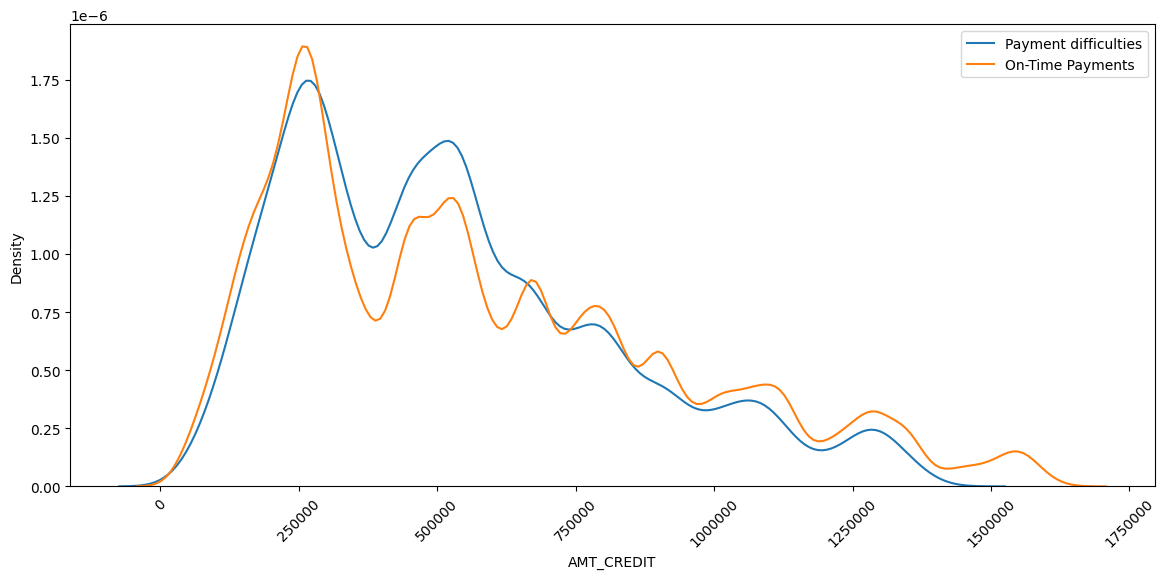

In [441]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'AMT_CREDIT')

**Спостереження**

- Для `AMT_CREDIT` від 250000 до приблизно 650000 більше клієнтів мають труднощі з оплатою
- Для `AMT_CREDIT` > 750000 більше клієнтів, які вчасно здійснюють платежі

# ДЗ 5. Одновимірний аналіз числової колонки

За наведеним вище прикладом, проведіть одновимірний аналіз (виявлення викидів, їх усунення та побудова KDE  графіку) для числових змінних
- `YEARS_BIRTH`
- `AMT_GOODS_PRICE`
- `DAYS_EMPLOYED`

Опціонально:
- `CNT_CHILDREN`
- `AMT_INCOME_TOTAL`

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.

Зробіть висновки з аналізу.

## 1 - Загальна функція для аналізу

In [442]:
def full_numeric_analysis(df, column, bins):
  data = df[column]
  print(f'----- Аналіз колонки: `{column}` -----')
  print(data.describe())

  print('----- IQR для викидів -----')

  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)

  IQR = Q3 - Q1

  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  print(f'Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}')
  print(f'Lower межа: {lower}')
  print(f'Upper межа: {upper}')

  outliers_count = ((data < lower) | (data> upper)).sum()
  print(f'Кількість викидів: {outliers_count}')

  print('----- Візуалізація -----')

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  # Boxplot
  sns.boxplot(x=data, ax=axes[0])
  axes[0].set_title(f'Boxplot: {column}')

  # Histogram + KDE
  data_analys = data[(data >= lower) & (data <= upper)]
  sns.histplot(data_analys, bins=bins, kde=True, ax=axes[1])
  axes[1].set_title(f'Histogram + KDE (без викидів): {column}')

  plt.tight_layout()
  plt.show()

  return data_analys


## 2 - Виклик функції для аналізу


### 2.1 - `YEARS_BIRTH`

----- Аналіз колонки: `YEARS_BIRTH` -----
count   307511.00
mean        43.94
std         11.96
min         21.00
25%         34.00
50%         43.00
75%         54.00
max         69.00
Name: YEARS_BIRTH, dtype: float64
----- IQR для викидів -----
Q1 = 34.0, Q3 = 54.0, IQR = 20.0
Lower межа: 4.0
Upper межа: 84.0
Кількість викидів: 0
----- Візуалізація -----


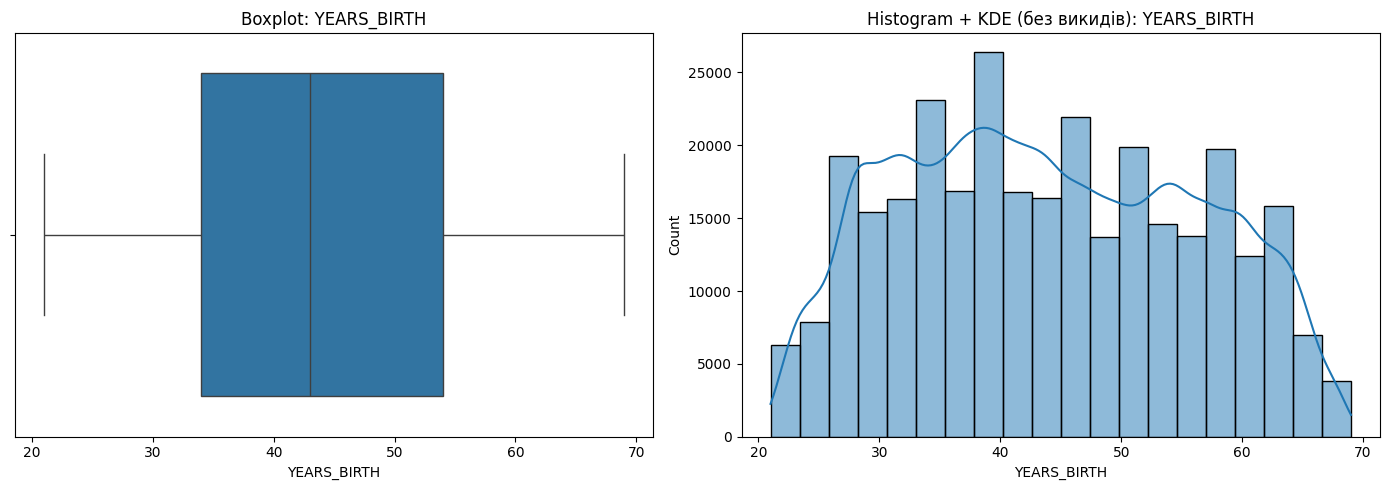

0         26
1         46
2         52
3         52
4         55
          ..
307506    26
307507    57
307508    41
307509    33
307510    46
Name: YEARS_BIRTH, Length: 307511, dtype: int64

In [443]:
years_birth_analys = full_numeric_analysis(df, 'YEARS_BIRTH', bins=20)
years_birth_analys

- Розподіл близький до нормального
- Викиди мінімальні
- Основна маса клієнтів — працездатного віку

---

- *Описова статистика*: Має **реалістичний діапазон віку** для кредитних клієнтів
- *Аналіз IQR*: всі значення віку лежать у допустимих межах, аномалій нема
  - Lower: 4 роки
  - Upper: 84 роки
  - Кількість викидів: 0
- *Boxplot*: Викидів немає, розподіл стабільний
  - симетричний, медіана майже по центру коробки
- *Histogram + KDE*: KDE плавний, без різких 'хвостів'
  - дані чисті
  - розподіл **близький до нормального**

### 2.2 - `AMT_GOODS_PRICE`

----- Аналіз колонки: `AMT_GOODS_PRICE` -----
count    307511.00
mean     538135.43
std      369416.30
min       40500.00
25%      238500.00
50%      450000.00
75%      679500.00
max     4050000.00
Name: AMT_GOODS_PRICE, dtype: float64
----- IQR для викидів -----
Q1 = 238500.0, Q3 = 679500.0, IQR = 441000.0
Lower межа: -423000.0
Upper межа: 1341000.0
Кількість викидів: 14728
----- Візуалізація -----


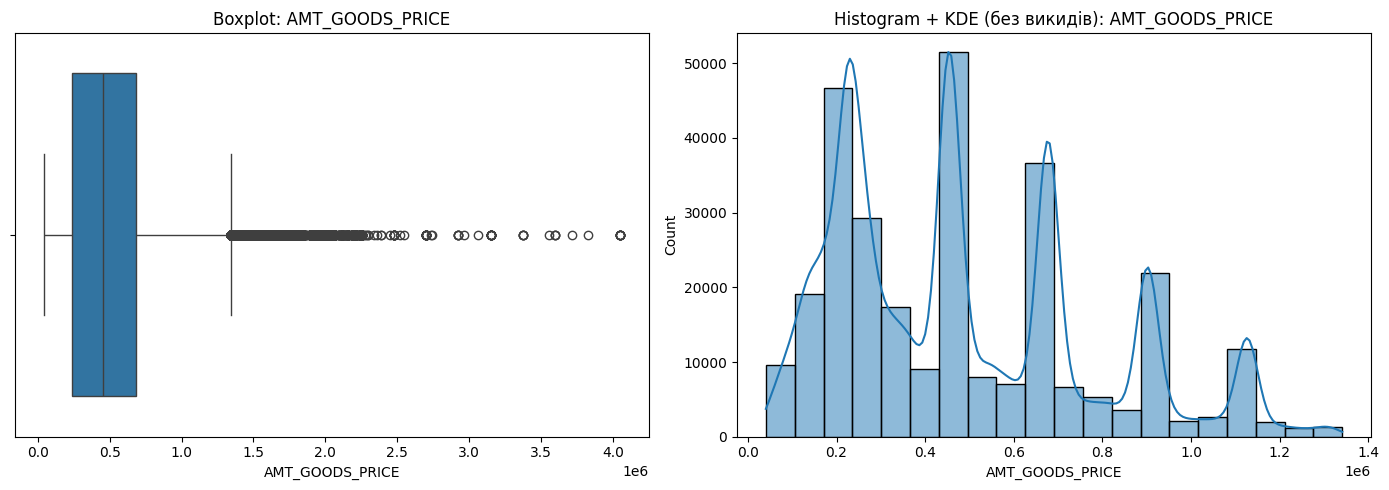

0         351000.00
1        1129500.00
2         135000.00
3         297000.00
4         513000.00
            ...    
307506    225000.00
307507    225000.00
307508    585000.00
307509    319500.00
307510    675000.00
Name: AMT_GOODS_PRICE, Length: 292783, dtype: float64

In [444]:
amt_goods_price_analys = full_numeric_analysis(df, 'AMT_GOODS_PRICE', bins=20)
amt_goods_price_analys

- викиди є інформативними, а не технічними
- повне видалення викидів може призвести до втрати важливої інформації
- фіча має складну структуру розподілу

---

- *Описова статистика*: Середнє більше за медіану -> правостороння асиметрія
- *Аналіз IQR*: викиди — це дуже дорогі товари, а не помилки вимірювання
  - Lower: -423000(фактично не має сенсу для ціни)
  - Upper: 1341000
  - Кількість викидів: 14728
- *Boxplot*: Класичний приклад правосторонньо скошеного розподілу
  - дуже довгий правий 'хвіст'
  - Велика кількість точок за верхньою межею
- *Histogram + KDE*: після очищення асиметрія зберігається
  - розподіл не є нормальним
  - переважають товари середнього цінового діапазону

### 2.3 - `DAYS_EMPLOYED`

----- Аналіз колонки: `DAYS_EMPLOYED` -----
count   307511.00
mean     67724.74
std     139443.75
min          0.00
25%        933.00
50%       2219.00
75%       5707.00
max     365243.00
Name: DAYS_EMPLOYED, dtype: float64
----- IQR для викидів -----
Q1 = 933.0, Q3 = 5707.0, IQR = 4774.0
Lower межа: -6228.0
Upper межа: 12868.0
Кількість викидів: 56357
----- Візуалізація -----


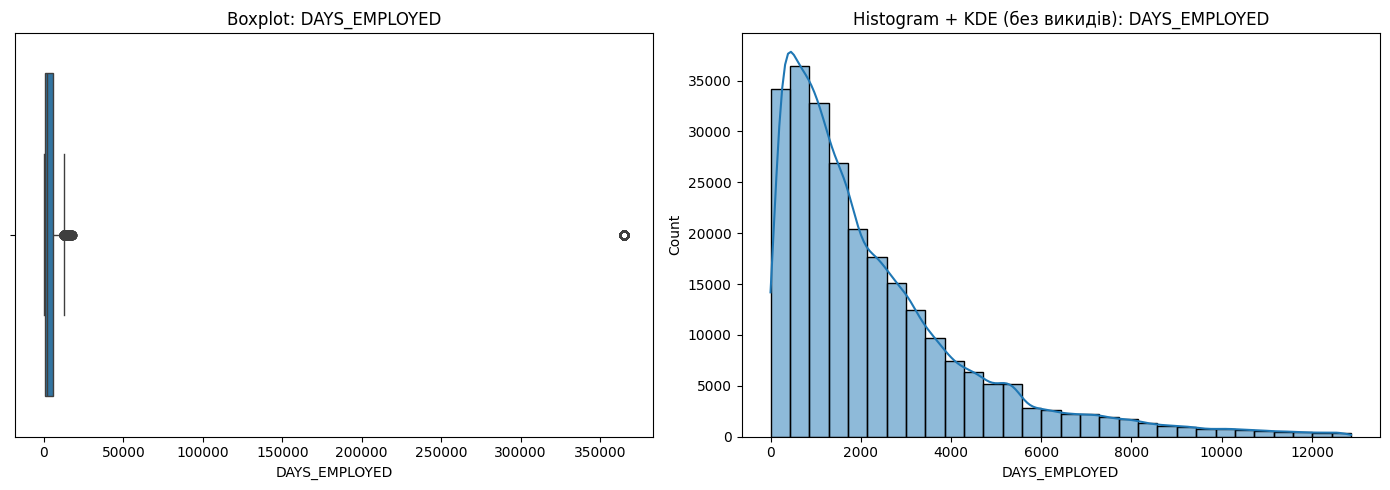

0          637
1         1188
2          225
3         3039
4         3038
          ... 
307504    7258
307506     236
307508    7921
307509    4786
307510    1262
Name: DAYS_EMPLOYED, Length: 251154, dtype: int64

In [445]:
days_employed_analys = full_numeric_analysis(df, 'DAYS_EMPLOYED', bins=30)
days_employed_analys

- викиди не є реальними значеннями
- Значення `365243` - спеціальний флаг/код(?) чи значення про відсутність даних
- без попереднього очищення змінну не можна коректно використовувати

---

- *Описова статистика*:
  - середнє значно більше за медіану -> сильна правостороння асиметрія.
  - максимальне значення є нереалістичним (≈ 1000 років стажу)
- *Аналіз IQR*: значна кількість значень значно перевищує верхню межу
  - Lower: -6228
  - Upper: 12868
  - Кількість викидів: 56357
- *Boxplot*: показує технічну аномалію змінної
  - один екстремальний правий 'хвіст' - `365243`
  - дуже велика кількість викидів
- *Histogram + KDE*: після усунення викидів розподіл далекий від нормального
  - розподіл різко правосторонній
  - більшість клієнтів має стаж до 5000 днів

### 2.4 - `CNT_CHILDREN`

----- Аналіз колонки: `CNT_CHILDREN` -----
count   307511.00
mean         0.42
std          0.72
min          0.00
25%          0.00
50%          0.00
75%          1.00
max         19.00
Name: CNT_CHILDREN, dtype: float64
----- IQR для викидів -----
Q1 = 0.0, Q3 = 1.0, IQR = 1.0
Lower межа: -1.5
Upper межа: 2.5
Кількість викидів: 4272
----- Візуалізація -----


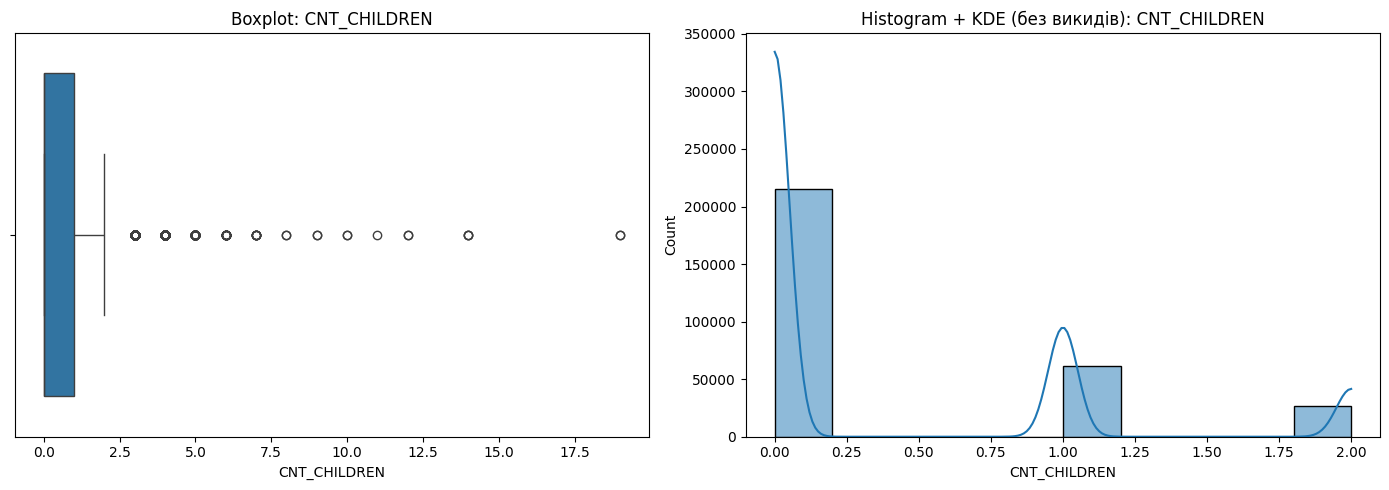

0         0
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Name: CNT_CHILDREN, Length: 303239, dtype: int64

In [446]:
cnt_children_analys = full_numeric_analysis(df, 'CNT_CHILDREN', bins=10)
cnt_children_analys

- `CNT_CHILDREN` — дискретна змінна
- Видалення значень небажане
- **KDE не є оптимальним для фічей як CNT_CHILDREN**

---

- *Описова статистика*: Переважна більшість клієнтів не має дітей або має 1 дитину
- *Аналіз IQR*: до викидів відносяться значення 3 і більше дітей. Це рідкісні, але реальні значення, а не помилки вимірювання
  - Lower: −1.5(не має сенсу для цієї змінної)
  - Upper: 2.5
  - Кількість викидів: 4272
- *Boxplot*: показує сильну асиметрію та дискретність змінної
  - основна маса значень сконцентрована в точці 0
  - довгий правий 'хвіст'
- *Histogram + KDE*:  має обмежену інтерпретативну цінність
  - розподіл дискретний
  - основні піки на значеннях 0, 1, 2
  - KDE менш інформативний через цілочисельну природу змінної


### 2.5 - `AMT_INCOME_TOTAL`

----- Аналіз колонки: `AMT_INCOME_TOTAL` -----
count      307511.00
mean       168797.92
std        237123.15
min         25650.00
25%        112500.00
50%        147150.00
75%        202500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64
----- IQR для викидів -----
Q1 = 112500.0, Q3 = 202500.0, IQR = 90000.0
Lower межа: -22500.0
Upper межа: 337500.0
Кількість викидів: 14035
----- Візуалізація -----


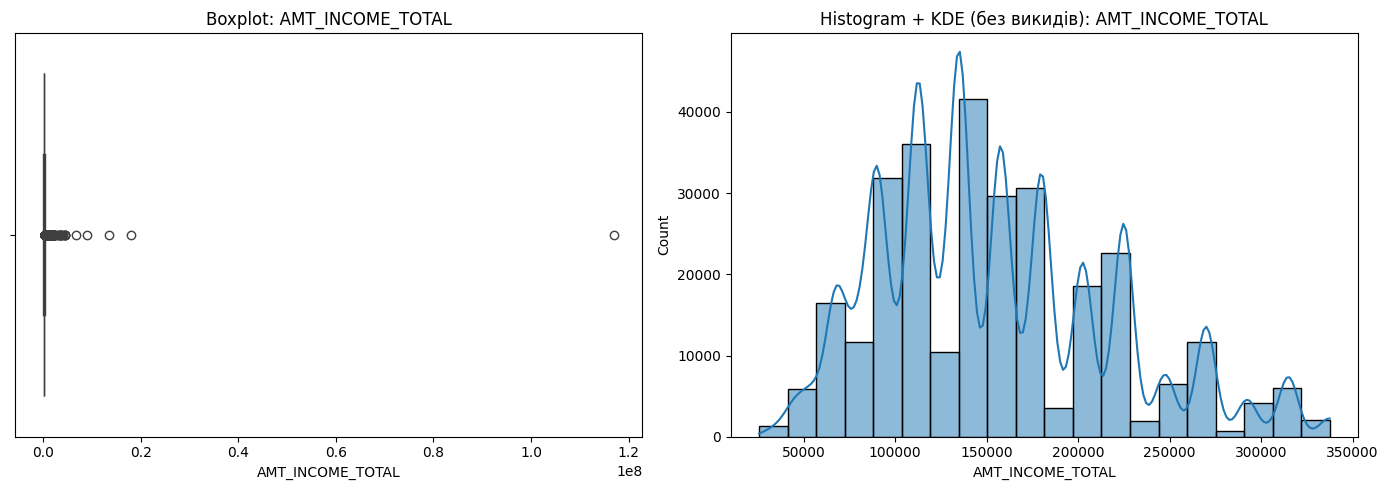

0        202500.00
1        270000.00
2         67500.00
3        135000.00
4        121500.00
            ...   
307506   157500.00
307507    72000.00
307508   153000.00
307509   171000.00
307510   157500.00
Name: AMT_INCOME_TOTAL, Length: 293476, dtype: float64

In [447]:
amt_income_total_analys = full_numeric_analysis(df, 'AMT_INCOME_TOTAL', bins=20)
amt_income_total_analys

- викиди є інформативними та відображають реальні доходи

---

- *Описова статистика*:
  - середнє значення більше за медіану -> правостороння асиметрія
  - є великі значення доходу
- *Аналіз IQR*: викиди є високими доходами, а не технічним помилкам
  - Lower: −22500 (не має сенсу)
  - Upper: 337500
  - Кількість викидів: 14035
- *Boxplot*: показує асиметрію
  - основна маса значень зосереджена біля нижньої межі
  - дуже довгий правий 'хвіст'
- *Histogram + KDE*: загальну форму розподілу без надмірного шуму
  - розподіл далекий від нормального
  - Видно кілька піків, що свідчить про дискретні рівні доходів



## Звіт аналізу ДЗ

###  **Висновок**
- `YEARS_BIRTH`: Змінна є стабільною, не потребує агресивного очищення, добре підходить для моделювання

- `AMT_GOODS_PRICE`: має правосторонній скошений розподіл з інформативними викидами. Значення `AMT_GOODS_PRICE` формуються дискретними рівнями, що відповідає фіксованим цінам товарів

- `DAYS_EMPLOYED`:  містить технічні аномалії та без очищення не може бути використана в моделі

- `CNT_CHILDREN`: більшість клієнтів не має дітей або має одну дитину.  Для подальшого аналізу можемо розглянути бінарну ознаку наявності дітей або об’єднання значень >=3 в одну категорію

- `AMT_INCOME_TOTAL`: сильна асиметрична змінна з інформативними викидами. Викиди не є помилками вимірювання, а відображають реальні рівні доходів

---



# Двовимірний/Багатовимірний аналіз

## Неперервні vs неперервні змінні

### Аналіз стовпця `AMT_GOODS_PRICE` vs `AMT_CREDIT`

**Пошук викидів для ствопця `AMT_GOODS_PRICE ` для групи із платіжними труднощами**

In [448]:
max_value1_AMT_GOODS_PRICE = outlier_range(df1,'AMT_GOODS_PRICE')
max_value1_AMT_GOODS_PRICE

np.float64(1329750.0)

**Пошук викидів для ствопця `AMT_CREDIT` для групи із платіжними труднощами**

In [449]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

np.float64(1406688.75)

**Пошук викидів для `AMT_GOODS_PRICE `для групи із вчасними оплатами**

In [450]:
max_value0_AMT_GOODS_PRICE = outlier_range(df0,'AMT_GOODS_PRICE')
max_value0_AMT_GOODS_PRICE

np.float64(1363500.0)

**Пошук викидів для `AMT_CREDIT `для групи із вчасними оплатами**

In [451]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

np.float64(1620000.0)

Побудова діаграми розсіювання для порівняння з видаленими викидами

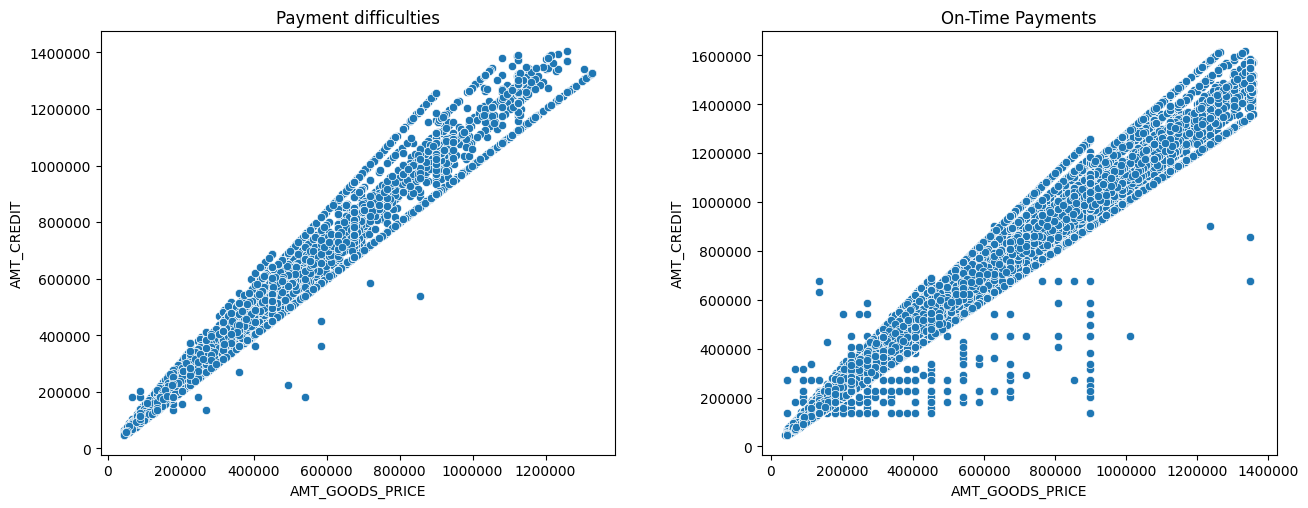

In [452]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(pad = 4)
plt.show()

**Спостереження**
- AMT_GOODS_PRICE та AMT_CREDIT мають сильну позитивну кореляцію. Це означає, що зі збільшенням ціни товару зростає і сума кредиту

# ДЗ 6. Кореляційний аналіз для пари числових змінних

За наведеним вище прикладом, проведіть кореляційний аналіз для пар змінних
- AMT_ANNUITY і AMT_CREDIT

Опціонально:
- DAYS_EMPLOYED і AMT_INCOME_TOTAL
- AMT_CREDIT і DAYS_BIRTH

[Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.](https://)
Зробіть висновок про наявність кореляції між змінними.

## 1 - Загальна функція для аналізу

In [453]:
def full_correlation_analysis(data, column_1, column_2):
  print('----- Коефіцієнт Кореляції Пірсона -----')
  corr_value = data[column_1].corr(data[column_2])

  print(f'Кореляційний аналіз: {column_1} vs {column_2}')
  print(f'Коефіцієнт кореляції Пірсона аналіз: {corr_value:.3f}')

  print('----- Матриця кореляції Пірсона -----')

  print(df[[column_1, column_2]].corr())

  print('----- Візуалізація -----')

  plt.figure(figsize=(6, 5))
  sns.scatterplot(
      data=data,
      x=column_1,
      y=column_2,
      alpha=0.3
  )
  plt.title(f'{column_1} vs {column_2} \nCorrelation = {corr_value:.3f}')
  plt.tight_layout()
  plt.show()

  return corr_value


## 2 - Виклик функції для аналізу


### 2.1 - `AMT_ANNUITY` і `AMT_CREDIT`

----- Коефіцієнт Кореляції Пірсона -----
Кореляційний аналіз: AMT_ANNUITY vs AMT_CREDIT
Коефіцієнт кореляції Пірсона аналіз: 0.770
----- Матриця кореляції Пірсона -----
             AMT_ANNUITY  AMT_CREDIT
AMT_ANNUITY         1.00        0.77
AMT_CREDIT          0.77        1.00
----- Візуалізація -----


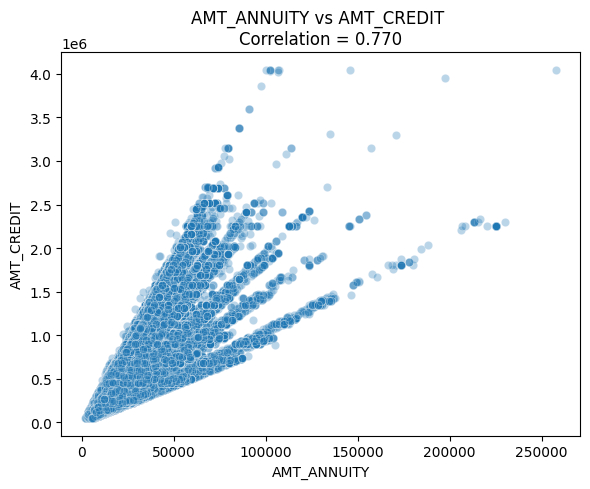

np.float64(0.7701380033118824)

In [454]:
full_correlation_analysis(df, 'AMT_ANNUITY', 'AMT_CREDIT')

- `AMT_ANNUITY` напряму залежить від `AMT_CREDIT`
- Це очікуваний та економічно обґрунтований результат

---

- *Коефіцієнт кореляції Пірсона*: 0.77
  - Значення близьке до 1 - > між змінними існує сильна лінійна кореляція
- *Кореляційна матриця*:
  - Значення підтверджують результат парної кореляції
- *Scatter plot*: візуально підтверджує сильну кореляцію
  - Чим більший `AMT_ANNUITY`, тим більший `AMT_CREDIT`


### 2.2 - `DAYS_EMPLOYED` та `AMT_INCOME_TOTAL`

----- Коефіцієнт Кореляції Пірсона -----
Кореляційний аналіз: DAYS_EMPLOYED vs AMT_INCOME_TOTAL
Коефіцієнт кореляції Пірсона аналіз: -0.064
----- Матриця кореляції Пірсона -----
                  DAYS_EMPLOYED  AMT_INCOME_TOTAL
DAYS_EMPLOYED              1.00             -0.06
AMT_INCOME_TOTAL          -0.06              1.00
----- Візуалізація -----


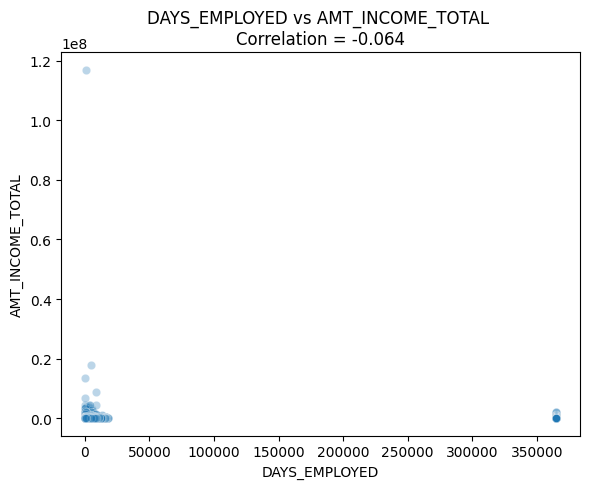

np.float64(-0.06383535332995134)

In [455]:
full_correlation_analysis(df, 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL')

- Тривалість зайнятості не визначає рівень доходу клієнта
- Дохід залежить від типу роботи,  посади та інший факторів. Люди можуть мати високий дохід з малим стажем і навпаки
- Раніше виявлений викид `DAYS_EMPLOYED` = `365243` також впливає на результат

---

- *Коефіцієнт кореляції Пірсона*: −0.064
  - Значення дуже близьке до 0 -> лінійна кореляція відсутня
  - Невеликий мінус означає слабку зворотну тенденцію, але вона незначуща
- *Кореляційна матриця*:
  - Жодного сильного зв’язку між змінними немає
- *Scatter plot*: візуально кореляція не простежується
  - Точки розташовані хаотично
  - Видно окремі аномальні значення `DAYS_EMPLOYED` (365243)


### 2.3 - `AMT_CREDIT` та `DAYS_BIRTH`

----- Коефіцієнт Кореляції Пірсона -----
Кореляційний аналіз: AMT_CREDIT vs DAYS_BIRTH
Коефіцієнт кореляції Пірсона аналіз: 0.055
----- Матриця кореляції Пірсона -----
            AMT_CREDIT  DAYS_BIRTH
AMT_CREDIT        1.00        0.06
DAYS_BIRTH        0.06        1.00
----- Візуалізація -----


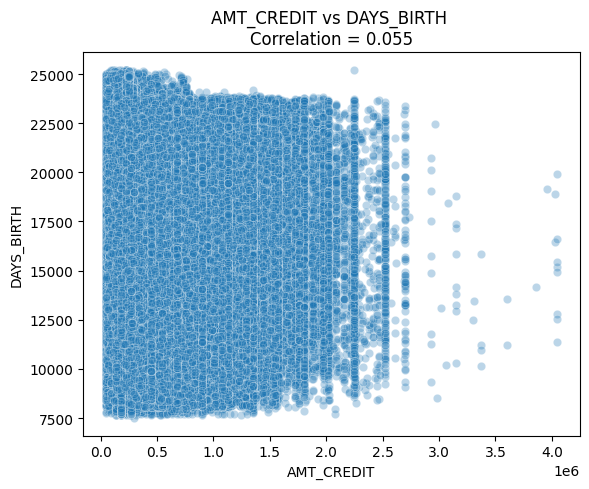

np.float64(0.055435947014526185)

In [456]:
full_correlation_analysis(df, 'AMT_CREDIT', 'DAYS_BIRTH')

- вік клієнта не є визначальним фактором для суми кредиту
- Рішення про суму кредиту залежить більше від інший факторів(доход, кредитної історії та інші)

---

- *Коефіцієнт кореляції Пірсона*: 0.055
  - Значення дуже близьке до 0 -> лінійна кореляція відсутня
  - Відсутність мінуса означає дуже слабку тенденцію, але вона не має практичного значення
- *Кореляційна матриця*:
  - Матриця підтверджує відсутність сильного зв’язку
- *Scatter plot*: візуально кореляція не простежується
  - Точки розташовані хаотично
  - Відсутній чіткий зростаючий або спадний тренд


## Звіт аналізу ДЗ
До основного аналізу було додано `df.corr()`, воно доповнює коефіцієнт кореляції Пірсона, але не замінює парний аналіз

###  **Висновок**
`AMT_ANNUITY` та `AMT_CREDIT`:
- Сильна позитивна кореляція
- Зі збільшенням суми кредиту `AMT_CREDIT` зростає розмір `AMT_ANNUITY` платежу

`DAYS_EMPLOYED` та `AMT_INCOME_TOTAL`:
- Дуже слабка та від’ємна кореляція що свідчить про відсутність лінійної залежності між тривалістю зайнятості та рівнем доходу клієнтів
- Довший стаж не гарантує вищий дохід
- Слабка кореляція може бути пов’язана з наявністю викиду у `DAYS_EMPLOYED`

`AMT_CREDIT` та `DAYS_BIRTH`:
- Кореляція слабка -> кореляція між віком клієнта та сумою кредиту практично відсутня
- Вік клієнта має незначний вплив на суму кредиту


---



## Неперервні та категоріальні змінні

In [457]:
def draw_boxplot(df, categorical, continuous, max_continuous, title, hue_column, subplot_position):
    """
    Малює блок-діаграму для заданого DataFrame, категоріальної та неперервної змінної.
    """
    plt.subplot(1, 2, subplot_position)
    plt.title(title)
    red_diamond = dict(markerfacecolor='r', marker='D')
    sns.boxplot(x=categorical,
                y=df[df[continuous] < max_continuous][continuous],
                data=df,
                flierprops=red_diamond,
                order=sorted(df[categorical].unique(), reverse=True),
                hue=hue_column, hue_order=sorted(df[hue_column].unique(), reverse=True))
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=90)

def bi_boxplot(categorical, continuous, max_continuous1, max_continuous0, hue_column):
    """
    Створює паралельні блок-діаграми для двох груп, визначених у наборі даних, на основі
    категоріальної та неперервної змінної, виділяючи відмінності за допомогою відтінків.
    """
    plt.figure(figsize=(16, 10))

    # Графік для першо групи "Труднощі з платежами" (Payment Difficulties)
    draw_boxplot(df1, categorical, continuous, max_continuous1, 'Payment Difficulties', hue_column, 1)

    # Графік для другої групи "Вчасні оплати" (On-Time Payments)
    draw_boxplot(df0, categorical, continuous, max_continuous0, 'On-Time Payments', hue_column, 2)

    plt.tight_layout(pad=4)
    plt.show()

### Аналіз стовпців `AMT_CREDIT` vs `NAME_EDUCATION_TYPE` vs `CODE_GENDER`

**Пошук викидів для `AMT_CREDIT `для групи із платіжними труднощами**

In [458]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

np.float64(1406688.75)

**Пошук викидів для `AMT_CREDIT ` для групи із вчасними платежами**

In [459]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

np.float64(1620000.0)

**Клієнт з платіжними труднощами**

In [460]:
df1.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                         
Academic degree     F              3.00 950245.50 504711.38 544491.00   
Higher education    F           2438.00 648500.58 410415.70  47970.00   
                    M           1571.00 642070.94 409695.93  45000.00   
Incomplete higher   F            504.00 520150.35 352227.49  91692.00   
                    M            368.00 554723.82 347843.71  74628.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           667660.50 790830.00 1153122.75 1515415.50  
Higher education    F           323595.00 545040.00  877500.00 2687355.00  
                    M           329202.00 545040.00  832797.00 2695500.00  
Incomplete higher   F           269550.00 450000.00  675000.00 2695500.00  
                    M           284400.00 497520.00  699976.12 2013840.00

**Клієнт зі вчасними платежами**

In [461]:
df0.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                          
Academic degree     F              97.00 708770.74 463052.42 130824.00   
                    M              64.00 735235.38 497739.97  74182.50   
Higher education    F           47852.00 682485.00 456642.78  45000.00   
                    M           23002.00 713144.54 486073.66  45000.00   
Incomplete higher   F            5780.00 555340.53 385980.60  45000.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           354469.50 607500.00 1006920.00 2463840.00  
                    M           309519.00 610056.00 1036890.00 1984500.00  
Higher education    F           302206.50 568057.50  916470.00 4050000.00  
                    M           315000.00 592560.00  973503.00 4050000.00  
Incomplete higher   F           253737.00 454500.00  760225.50 2517300.00

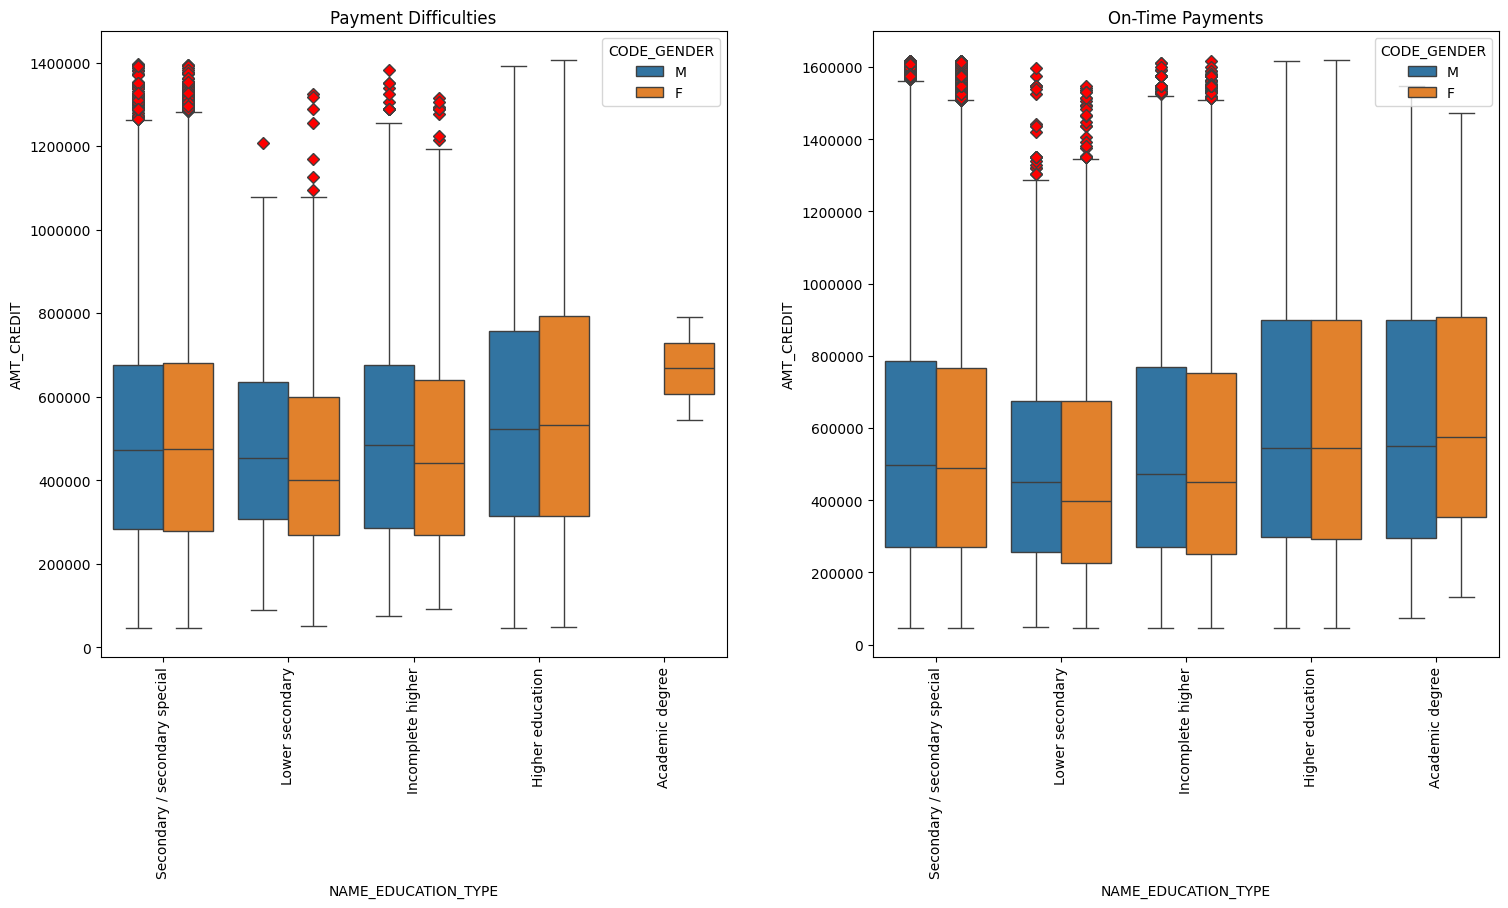

In [462]:
bi_boxplot('NAME_EDUCATION_TYPE','AMT_CREDIT',max_value1_AMT_CREDIT, max_value0_AMT_CREDIT, 'CODE_GENDER')

**Спостереження
- Клієнти з "академічним ступенем" мають широкий діапазон кредитів для своєчасних платежів, тоді як для клієнтів з проблемами з оплатою цей діапазон значно нижчий
- Якщо поглянути на зведену статистику, то клієнти з "вищою освітою" та проблемами з оплатою беруть середній та медіанний кредит у значно більшому діапазоні, ніж клієнти з вчасною оплатою.
- Клієнти-чоловіки з "вищою освітою" завжди сплачують кредит вчасно

# ДЗ 7. Кореляційний аналіз між двома категоріальними змінними і числовою

Проведіть аналогічний кореляційний аналіз для трійок змінних

- AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS vs CODE_GENDER

Опціонально - трійки які можна додатково проаналізувати:
- AMT_INCOME_TOTAL vs YEARS_BIRTH_CATEGORY vs NAME_HOUSING_TYPE
- AMT_GOODS_PRICE vs NAME_INCOME_TYPE vs CODE_GENDER
- AMT_INCOME_TOTAL vs OCCUPATION_TYPE vs CODE_GENDER

А ще можете також проаналізувати додатково до обовʼязкової свою трійку :)

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної трійки змінних.

Зробіть висновок про наявність кореляції між змінними.


Групуємо дані за двома категоріальними

Рахуємо середнє значення числової

Будуємо barplot

Робимо висновок, чи є залежність

-  Тут не використовується Pearson, бо категоріальні змінні

## 1 - Загальна функція для аналізу

In [463]:
def numeric_categorical_analys(df, numeric_col, cat_col_1, cat_col_2, agg_func='mean'):
  print(f'----- Аналіз: {numeric_col} vs {cat_col_1} vs {cat_col_2} -----')

  grouped_data = (df.groupby([cat_col_1, cat_col_2])[numeric_col].agg(agg_func).reset_index())

  print('----- Агреговані значення: -----')
  print(grouped_data.head(5))

  print('----- Візуалізація -----')
  plt.figure(figsize=(10, 5))
  sns.barplot(
      data=grouped_data,
      x=cat_col_1,
      y=numeric_col,
      hue=cat_col_2
  )

  plt.title(f'{numeric_col} ({agg_func}) by {cat_col_1} and {cat_col_2}')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

  return grouped_data


## 2 - Виклик функції для аналізу


### 2.1 - `AMT_INCOME_TOTAL` vs `NAME_FAMILY_STATUS` vs `CODE_GENDER`

----- Аналіз: AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS vs CODE_GENDER -----
----- Агреговані значення: -----
  NAME_FAMILY_STATUS CODE_GENDER  AMT_INCOME_TOTAL
0     Civil marriage           F         161371.58
1     Civil marriage           M         182761.17
2            Married           F         154671.46
3            Married           M         198061.57
4          Separated           F         166021.75
----- Візуалізація -----


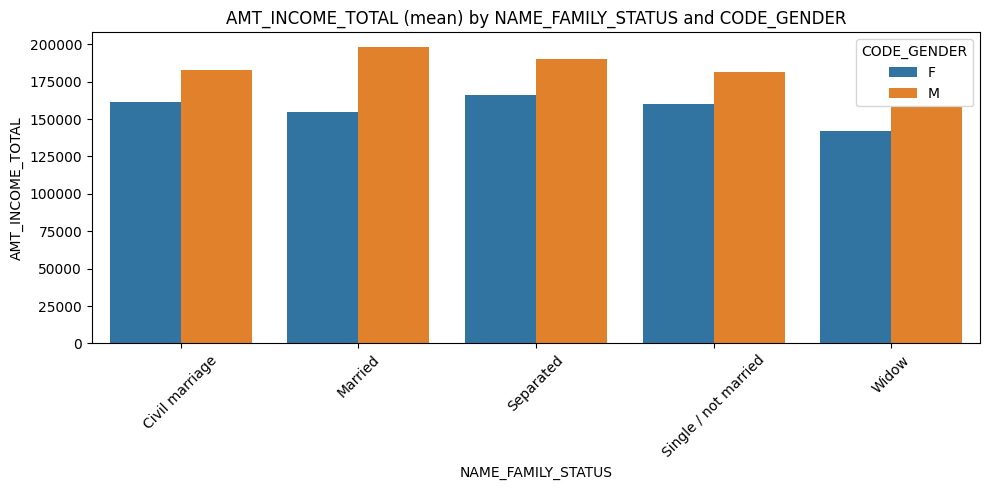

NAME_FAMILY_STATUS CODE_GENDER  AMT_INCOME_TOTAL
0        Civil marriage           F         161371.58
1        Civil marriage           M         182761.17
2               Married           F         154671.46
3               Married           M         198061.57
4             Separated           F         166021.75
5             Separated           M         189925.79
6  Single / not married           F         159987.33
7  Single / not married           M         181368.48
8                 Widow           F         142097.85
9                 Widow           M         158253.64

In [464]:
numeric_categorical_analys(df, 'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS', 'CODE_GENDER')

- **Рівень доходу клієнтів відрізняється залежно від сімейного стану та статі**
- У всіх категоріях сімейного стану **чоловіки мають вищий середній дохід, ніж жінки**
- Найвищі середні доходи спостерігаються серед клієнтів у категоріях **Married** та **Civil marriage**

---

**Тип житла**: додатковий фактор, що впливає на рівень доходу
- Клієнти, які проживають у **Office apartment** та **Rented apartment**, мають вищі середні доходи у всіх вікових групах
- Найнижчі доходи характерні для клієнтів, які проживають **With parents**

**Сімейний стан**:
- **Married**: мають найвищі середні доходи, особливо серед чоловіків, та мають більшу фінансову стабільність цієї групи
- **Civil marriage**: дещо нижчий, але близький до категорії Married
- **Single / not married** та **Separated**: середні значення доходу
- **Widow**: найнижчі середні доходи незалежно від статі

**Гендерні відмінності**: додатковий фактор, що змінює рівень доходу, але не є єдиним визначальним
- У всіх сімейних статусах середній дохід чоловіків перевищує дохід жінок
- Найбільший гендерний розрив у доходах спостерігається у категорії **Married**

**Взаємозалежність змінних**:
- Залежність між доходом, сімейним станом та статтю є **нелінійною**
- Сімейний стан має суттєвіший вплив на рівень доходу, ніж стать
- Комбінація сімейного стану та статі дозволяє краще сегментувати клієнтів за фінансовим профілем

### 2.2 - `AMT_INCOME_TOTAL` vs `YEARS_BIRTH_CATEGORY` vs `NAME_HOUSING_TYPE`

----- Аналіз: AMT_INCOME_TOTAL vs YEARS_BIRTH_CATEGORY vs NAME_HOUSING_TYPE -----
----- Агреговані значення: -----
  YEARS_BIRTH_CATEGORY    NAME_HOUSING_TYPE  AMT_INCOME_TOTAL
0                20-30      Co-op apartment         159670.97
1                20-30    House / apartment         162589.95
2                20-30  Municipal apartment         164692.09
3                20-30     Office apartment         175488.65
4                20-30     Rented apartment         151883.33
----- Візуалізація -----


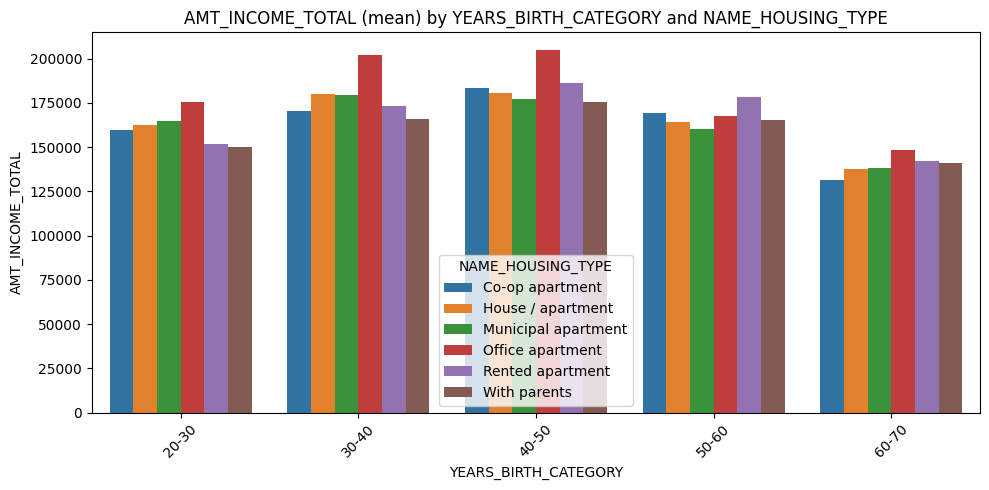

YEARS_BIRTH_CATEGORY    NAME_HOUSING_TYPE  AMT_INCOME_TOTAL
0                 20-30      Co-op apartment         159670.97
1                 20-30    House / apartment         162589.95
2                 20-30  Municipal apartment         164692.09
3                 20-30     Office apartment         175488.65
4                 20-30     Rented apartment         151883.33
5                 20-30         With parents         150323.90
6                 30-40      Co-op apartment         170459.99
7                 30-40    House / apartment         180089.97
8                 30-40  Municipal apartment         179443.79
9                 30-40     Office apartment         202338.95
10                30-40     Rented apartment         173114.47
11                30-40         With parents         165822.84
12                40-50      Co-op apartment         183564.81
13                40-50    House / apartment         180476.39
14                40-50  Municipal apartment         177356.40
15                40-50     Office apartment         204682.40
16                40-50     Rented apartment         186273.05
17                40-50         With parents         175434.06
18                50-60      Co-op apartment         169168.31
19                50-60    House / apartment         163982.74
20                50-60  Municipal apartment         160516.58
21                50-60     Office apartment         167700.51
22                50-60     Rented apartment         178163.10
23                50-60         With parents         165334.04
24                60-70      Co-op apartment         131308.59
25                60-70    House / apartment         137478.75
26                60-70  Municipal apartment         138483.96
27                60-70     Office apartment         148342.23
28                60-70     Rented apartment         141966.86
29                60-70         With parents         141195.73

In [465]:
numeric_categorical_analys(df, 'AMT_INCOME_TOTAL', 'YEARS_BIRTH_CATEGORY', 'NAME_HOUSING_TYPE')

- Рівень доходу змінюється залежно від вікової категорії клієнта
- Найвищі середні доходи спостерігаються у вікових групах 30–40 та 40–50 років

---

**Тип житла**: додатковий фактор, що впливає на рівень доходу
- Клієнти, які проживають у **Office apartment** та **Rented apartment**, мають вищі середні доходи у всіх вікових групах
- Найнижчі доходи характерні для клієнтів, які проживають **With parents**

**Вікові категорії**:
- У 20–30 років середній дохід є нижчим, що є типовим для початкового етапу кар’єри
- Максимальні значення доходу можно побачити у віці 40–50 років, що відповідає піку професійного розвитку
- Після 50 років простежується тенденція до зниження середнього доходу

**Взаємозалежність змінних**:
- **Залежність між доходом, віком та типом житла є нелінійною**
- Вік клієнта сам по собі не є визначальним фактором доходу
- Вплив віку посилюється або послаблюється залежно від житлових умов

### 2.3 - `AMT_GOODS_PRICE` vs `NAME_INCOME_TYPE` vs `CODE_GENDER`


----- Аналіз: AMT_GOODS_PRICE vs NAME_INCOME_TYPE vs CODE_GENDER -----
----- Агреговані значення: -----
       NAME_INCOME_TYPE CODE_GENDER  AMT_GOODS_PRICE
0           Businessman           F       1125000.00
1           Businessman           M       1272857.14
2  Commercial associate           F        597646.99
3  Commercial associate           M        611742.66
4       Maternity leave           F        745875.00
----- Візуалізація -----


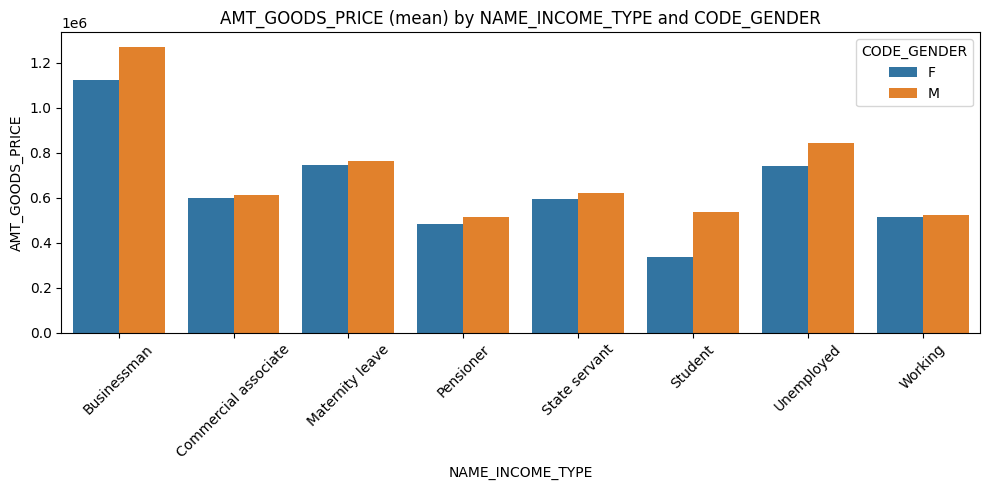

NAME_INCOME_TYPE CODE_GENDER  AMT_GOODS_PRICE
0            Businessman           F       1125000.00
1            Businessman           M       1272857.14
2   Commercial associate           F        597646.99
3   Commercial associate           M        611742.66
4        Maternity leave           F        745875.00
5        Maternity leave           M        765000.00
6              Pensioner           F        482503.99
7              Pensioner           M        512874.04
8          State servant           F        594484.39
9          State servant           M        622459.19
10               Student           F        338142.86
11               Student           M        534681.82
12            Unemployed           F        740382.35
13            Unemployed           M        846000.00
14               Working           F        514929.63
15               Working           M        521633.57

In [466]:
numeric_categorical_analys(df, 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'CODE_GENDER')

- Середня вартість придбаних товарів відрізняється залежно від типу доходу клієнта
- У більшості категорій **чоловіки мають вищу середню вартість товарів**, ніж жінки
- **Тип доходу є ключовим фактором, що впливає на суму покупки**

---

**Тип доходу**:
- **Businessman**:
  - мають найвищу середню вартість придбаних товарів
  - особливо високі значення спостерігаються серед чоловіків
- **Commercial associate** та **Working**:
  - мають середні значення вартості товарів
  - характерні стабільні покупки середнього діапазону
- **Pensioner** та **Student**:
  - мають найнижчі середні значення `AMT_GOODS_PRICE`, що відповідає обмеженішим фінансовим можливостям цих груп
- **Maternity leave** та **Unemployed**:
  - показують відносно високі значення, що може свідчити про підтримку з інших джерел доходу

**Гендерні відмінності**:
- У більшості типів доходу чоловіки купують дорожчі товари, ніж жінки
- Найбільший гендерний розрив у вартості покупок спостерігається у категоріях **Businessman** та **Student**
- У категорії **Working** та **Commercial associate** різниця між статями є мінімальною

**Взаємозалежність змінних**:
- Залежність між вартістю товару, типом доходу та статтю є **нелінійною**
- Тип доходу має сильніший вплив на `AMT_GOODS_PRICE`, ніж стать клієнта
- Гендер виступає додатковим модифікуючим фактором у межах кожної категорії доходу


### 2.4 - `AMT_INCOME_TOTAL` vs `OCCUPATION_TYPE` vs `CODE_GENDER`


----- Аналіз: AMT_INCOME_TOTAL vs OCCUPATION_TYPE vs CODE_GENDER -----
----- Агреговані значення: -----
  OCCUPATION_TYPE CODE_GENDER  AMT_INCOME_TOTAL
0     Accountants           F         193390.08
1     Accountants           M         234448.30
2  Cleaning staff           F         130441.05
3  Cleaning staff           M         135242.92
4   Cooking staff           F         133928.38
----- Візуалізація -----


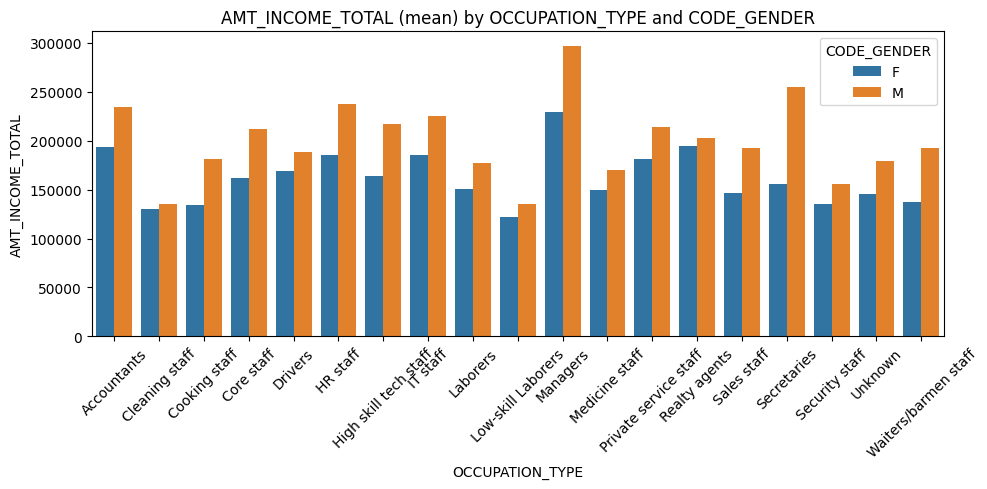

OCCUPATION_TYPE CODE_GENDER  AMT_INCOME_TOTAL
0             Accountants           F         193390.08
1             Accountants           M         234448.30
2          Cleaning staff           F         130441.05
3          Cleaning staff           M         135242.92
4           Cooking staff           F         133928.38
5           Cooking staff           M         181285.72
6              Core staff           F         162113.41
7              Core staff           M         212334.27
8                 Drivers           F         169106.91
9                 Drivers           M         187948.47
10               HR staff           F         185320.36
11               HR staff           M         237230.77
12  High skill tech staff           F         164069.35
13  High skill tech staff           M         217080.08
14               IT staff           F         185214.30
15               IT staff           M         225595.24
16               Laborers           F         150871.25
17               Laborers           M         177539.06
18     Low-skill Laborers           F         121967.24
19     Low-skill Laborers           M         135267.90
20               Managers           F         229609.51
21               Managers           M         296767.46
22         Medicine staff           F         149120.97
23         Medicine staff           M         170060.62
24  Private service staff           F         180934.37
25  Private service staff           M         213513.16
26          Realty agents           F         194345.79
27          Realty agents           M         202318.55
28            Sales staff           F         146906.28
29            Sales staff           M         192150.86
30            Secretaries           F         156148.85
31            Secretaries           M         254987.07
32         Security staff           F         135193.96
33         Security staff           M         155959.36
34                Unknown           F         145334.93
35                Unknown           M         179291.97
36   Waiters/barmen staff           F         137553.25
37   Waiters/barmen staff           M         192117.47

In [467]:
numeric_categorical_analys(df, 'AMT_INCOME_TOTAL', 'OCCUPATION_TYPE', 'CODE_GENDER')

- Рівень доходу клієнтів суттєво відрізняється залежно від типу професії
- У всіх професійних категоріях **чоловіки мають вищий середній дохід**, ніж жінки**
- **Тип професії є одним з найсильніших факторів, що впливає на рівень доходу**

---

**Тип професії**:
- **Managers**:
  - мають найвищі середні доходи серед усіх професій
  - різниця між чоловіками та жінками є найбільш помітною
- **High skill tech staff**, **IT staff**, **HR staff**:
  - демонструють високі середні доходи
- **Accountants**, **Core staff**, **Drivers**:
  - мають середні значення доходу
  - доходи стабільні, але нижчі порівняно з управлінськими та технічними ролями
- **Low-skill Laborers**, **Cleaning staff**, **Cooking staff**:
  - мають найнижчі середні доходи

**Гендерні відмінності**:
- Найбільший гендерний розрив у доходах спостерігається у професіях **Managers**, **IT staff**, **High skill tech staff**

**Взаємозалежність змінних**:
- Залежність між доходом, професією та статтю є **чітко вираженою, але нелінійною**
- Тип професії має значно більший вплив на `AMT_INCOME_TOTAL`, ніж стать
- Гендер виступає додатковим модифікуючим фактором у межах кожної професійної категорії


In [468]:
def numeric_vs_categorical_analysis(df0, df1, column_1, column_2, column_3):
  max_value1_column_1 = outlier_range(df1, column_1)
  max_value0_column_1 = outlier_range(df0, column_1)

  # Клієнт з платіжними труднощами

  display(df1.groupby(by = [column_2, column_3])[column_1].describe().head())

  # Клієнт зі своєчасними платежами

  display(df0.groupby(by = [column_2, column_3])[column_1].describe().head())

  bi_boxplot(column_2, column_1, max_value1_column_1, max_value0_column_1, column_3)

## Звіт аналізу ДЗ
###  **Висновок**
`AMT_INCOME_TOTAL` vs `NAME_FAMILY_STATUS` vs `CODE_GENDER`:
- Рівень доходу клієнтів визначається поєднанням **соціально-демографічних факторів**
- Найбільш фінансово стабільними є **одружені клієнти**, особливо чоловіки
- Аналіз підтверджує, що **для оцінки доходу доцільно враховувати сімейний стан разом зі статтю**, а не окремо

`AMT_INCOME_TOTAL` vs `YEARS_BIRTH_CATEGORY` vs `NAME_HOUSING_TYPE`
- Рівень доходу клієнтів визначається комбінацією **віку та житлових умов**
- Н**айбільш фінансово стабільними є клієнти середнього віку, які проживають окремо або орендують житло**
- Аналіз підтверджує, що для оцінки фінансового стану клієнта доцільно враховувати сукупність соціально-демографічних характеристик

`AMT_GOODS_PRICE` vs `NAME_INCOME_TYPE` vs `CODE_GENDER`
- Середня вартість придбаних товарів визначається **типом доходу клієнта**
- Найдорожчі покупки здійснюють клієнти з **підприємницьким типом доходу**
- Аналіз підтверджує **доцільність використання типу доходу та статі як важливих факторів для сегментації клієнтів за рівнем фінансових витрат**

`AMT_INCOME_TOTAL` vs `OCCUPATION_TYPE` vs `CODE_GENDER`

- Рівень доходу клієнтів визначається ** типом професійної діяльності**
- Найвищі доходи характерні для **управлінських та висококваліфікованих спеціалістів**
- Аналіз підтверджує доцільність **використання професії та статі як ключових факторів сегментації клієнтів за рівнем доходу**

---



## Категоріальні та категоріальні змінні

### Аналіз стовпців `NAME_INCOME_TYPE` vs `CODE_GENDER`

In [469]:
def bi_countplot_target(df0, df1, column, hue_column) :
    group_name = f'Нормалізований розподіл значень за категорією: {column}'
    print (group_name.upper())

    pltname = 'Клієнт зі складнощями щодо платності'
    unique_hue_values = df1[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,4)

    proportions = df1.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[0], title=pltname)

    # анотація значень в барплоті
    for container in ax.containers:
      ax. bar_label(container, fmt='{:,.1f}%')

    pltname = 'Клієнти зі своєчасними платежами'
    unique_hue_values = df0[hue_column].unique()

    proportions = df0.groupby(hue_column)[column].value_counts (normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
    by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container, fmt='{:,.1f}%')

    plt.show()

    #------------
    group_name = f'Кількість значень за категорією {column}'
    print(group_name.upper())

    pltname = 'Клієнт зі своєчасними платежами'
    unique_hue_values = df1[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,4)
    counts = df1.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
      by=unique_hue_values [0], ascending=False
      ).plot.bar(ax=axes [0], title=pltname )

    for container in ax.containers:
      ax.bar_label(container)

    pltname = 'Клієнти зі своєчасними платежами'
    unique_hue_values = df0[hue_column].unique()
    counts = df0.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values (
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

    for container in ax. containers:
      ax.bar_label(container)

    plt.show()

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_INCOME_TYPE


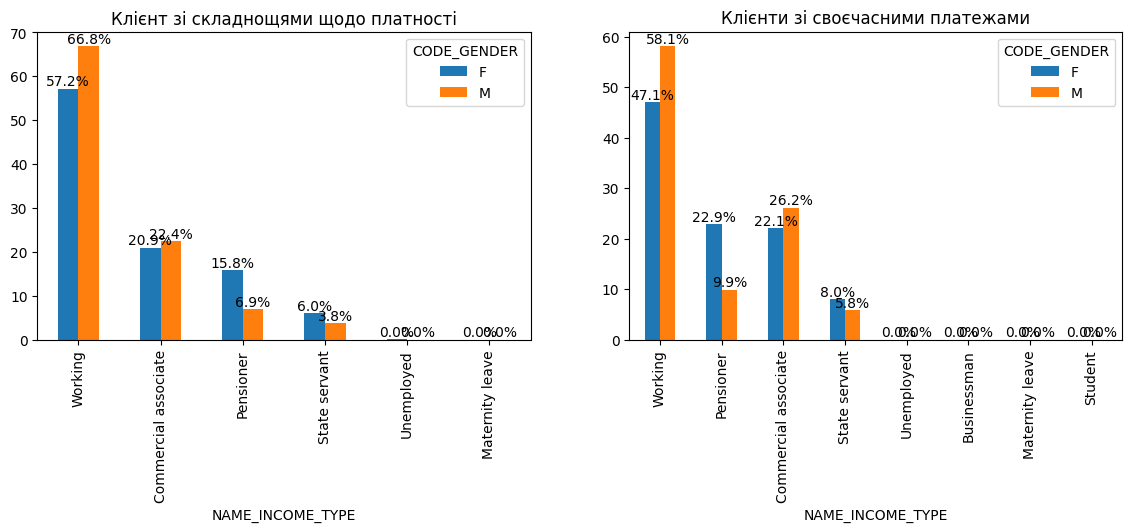

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ NAME_INCOME_TYPE


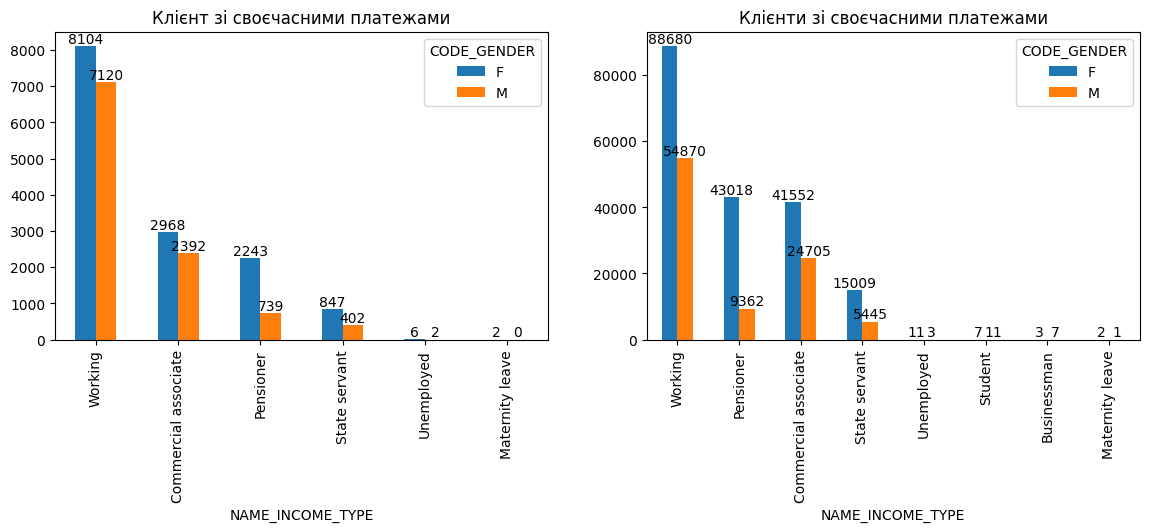

In [470]:
bi_countplot_target(df0, df1, 'NAME_INCOME_TYPE','CODE_GENDER')

**Спостереження**
- Клієнти категорії `Working` та `Male` мають більше труднощів з оплатою порівняно з тими, хто платить вчасно
- Клієнти категорії `Pensioner` та `Female` мають більше труднощів з оплатою порівняно з тими, хто платить вчасно
- Клієнти категорії `Businessman` та `Student` здійснюють платежі вчасно, хоча їхня історія невелика

# ДЗ 8. Аналіз взаємозалежностей між двома категоріальними змінними

Проведіть подібний до прикладу аналіз залежностей між категоріальними змінними для пар змінних

- NAME_EDUCATION_TYPE vs CODE_GENDER

Опціонально:
- NAME_FAMILY_STATUS vs OCCUPATION_TYPE
- OCCUPATION_TYPE vs NAME_CONTRACT_TYPE

Опишіть спостереження щодо того, чи є цікаві знахідки стосовно цільової змінної з цього аналізу.

## 1 - Загальна функція для аналізу

Для задачі, буде використано `bi_countplot_target` функція, але також буде додана нова функція

In [471]:
def categoricals_analysis(df, cat_col_1, cat_col_2, target=None, normalize='index'):
  print(f'----- Аналіз: {cat_col_1} vs {cat_col_2} -----')

  # крос-таблиця між двома категоріальними змінними
  ct = pd.crosstab(df[cat_col_1], df[cat_col_2], normalize=normalize) * 100
  print('Крос-таблиця (%):')
  print(ct.round(2))


  print('----- Візуалізація -----')

  ct.plot(kind='bar', stacked=True, figsize=(10, 5))
  plt.title(f"{cat_col_1} vs {cat_col_2} (%)")
  plt.ylabel("Частка, %")
  plt.legend(title=cat_col_2, bbox_to_anchor=(1.05, 1))
  plt.tight_layout()
  plt.show()

  if target:
    print(f'TARGET rate за {cat_col_1}:')
    target_rate = df.groupby(cat_col_1)[target].mean().sort_values(ascending=False)
    print((target_rate * 100).round(2))

  return ct


In [472]:
df_0 = df[df['TARGET'] == 0]  # без дефолту
df_1 = df[df['TARGET'] == 1]  # з дефолтом

## 2 - Виклик функції для аналізу


### 2.1 - `NAME_EDUCATION_TYPE` vs `CODE_GENDER`

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_EDUCATION_TYPE


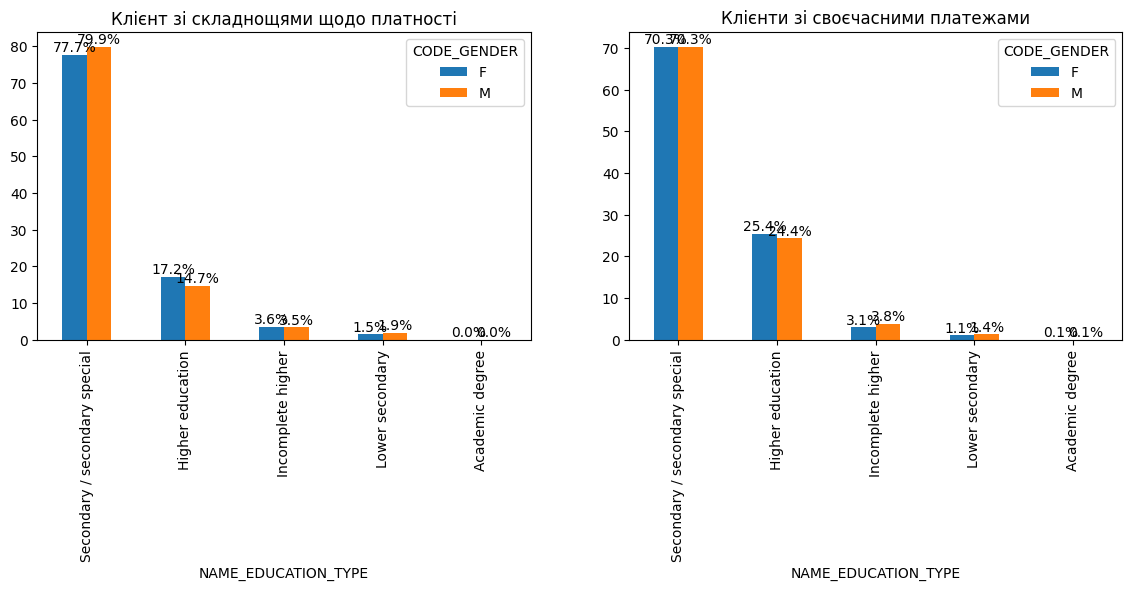

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ NAME_EDUCATION_TYPE


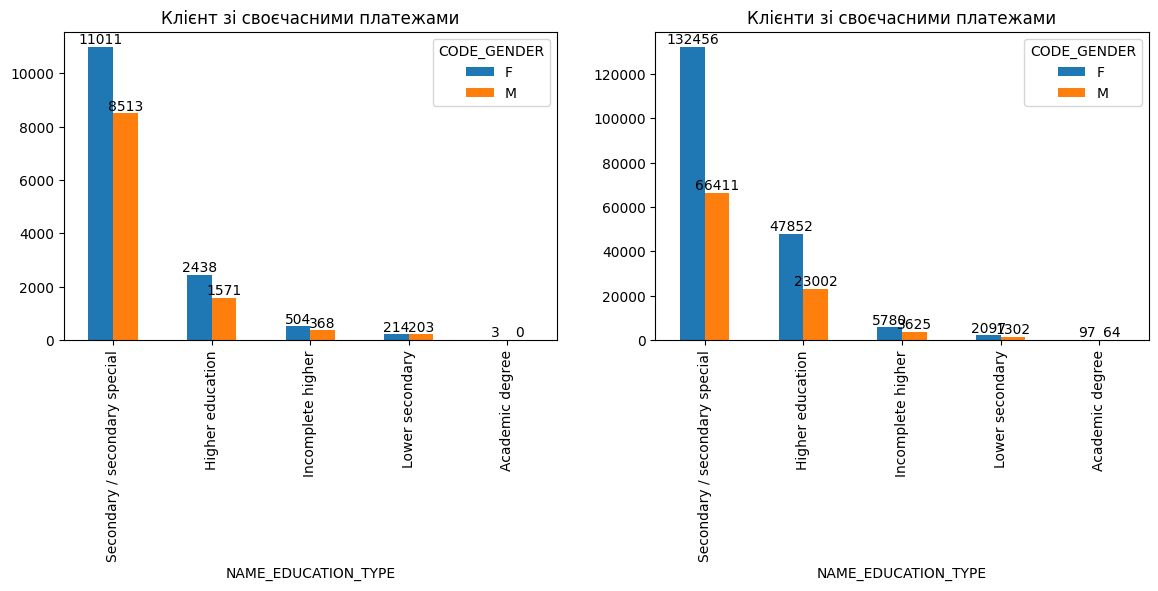

In [473]:
bi_countplot_target(df_0, df_1, 'NAME_EDUCATION_TYPE', 'CODE_GENDER')

----- Аналіз: NAME_EDUCATION_TYPE vs CODE_GENDER -----
Крос-таблиця (%):
CODE_GENDER                       F     M
NAME_EDUCATION_TYPE                      
Academic degree               60.98 39.02
Higher education              67.18 32.82
Incomplete higher             61.15 38.85
Lower secondary               60.56 39.44
Secondary / secondary special 65.69 34.31
----- Візуалізація -----


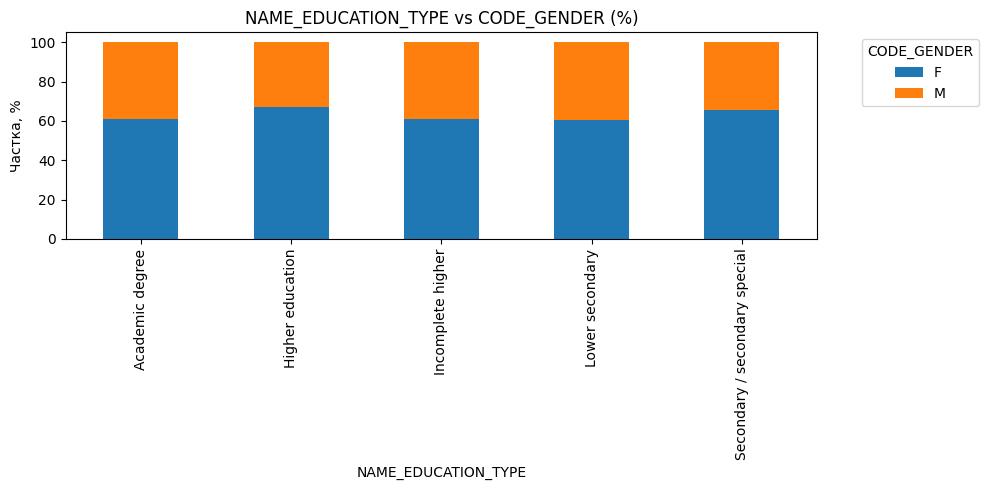

TARGET rate за NAME_EDUCATION_TYPE:
NAME_EDUCATION_TYPE
Lower secondary                 10.93
Secondary / secondary special    8.94
Incomplete higher                8.48
Higher education                 5.36
Academic degree                  1.83
Name: TARGET, dtype: float64


CODE_GENDER                       F     M
NAME_EDUCATION_TYPE                      
Academic degree               60.98 39.02
Higher education              67.18 32.82
Incomplete higher             61.15 38.85
Lower secondary               60.56 39.44
Secondary / secondary special 65.69 34.31

In [474]:
categoricals_analysis(df, 'NAME_EDUCATION_TYPE', 'CODE_GENDER', target='TARGET')

- Найбільш поширеною категорією освіти є **Secondary / secondary special** для обох статей
- Частка **чоловіків** дещо вища у групах з нижчим рівнем освіти

---

**Клієнти з та без дефолту**:
- *З дефолтом*:
  - більша частка осіб з освітою **Lower secondary** та **Incomplete higher**
  - З **Higher education** та **Academic degree** є мінімальною
- *Без дефолту*:
  - значно вища частка клієнтів з **Higher education**
  - присутні клієнти з **Academic degree**, яких майже немає серед дефолтних

**TARGET**:
- **Рівень дефолту зменшується зі зростанням рівня освіти**
- Найвищий TARGET rate:
  - **Lower secondary** -> `10.9%`
  - **Secondary / secondary special** -> `~8.9%`
- Найнижчий TARGET rate:
  - **Higher education** -> `~5.4%`
  - **Academic degree** -> `1.8%`
- Гендерні відмінності у межах одного рівня освіти значно слабші, ніж вплив самого рівня освіти

### 2.2 - `NAME_FAMILY_STATUS` vs `OCCUPATION_TYPE`

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_FAMILY_STATUS


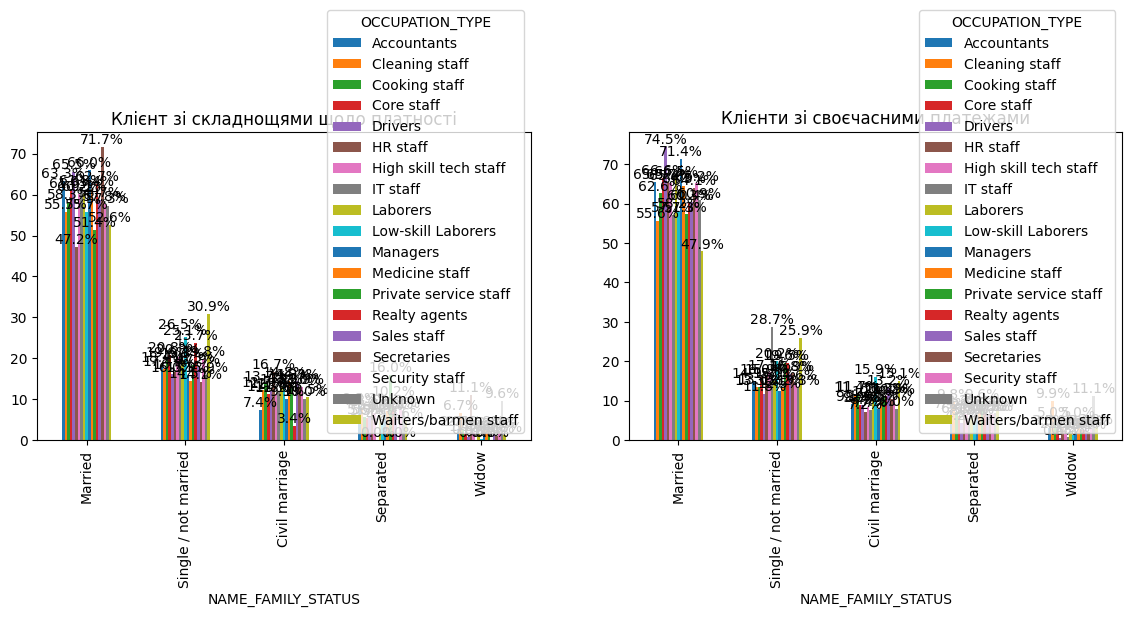

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ NAME_FAMILY_STATUS


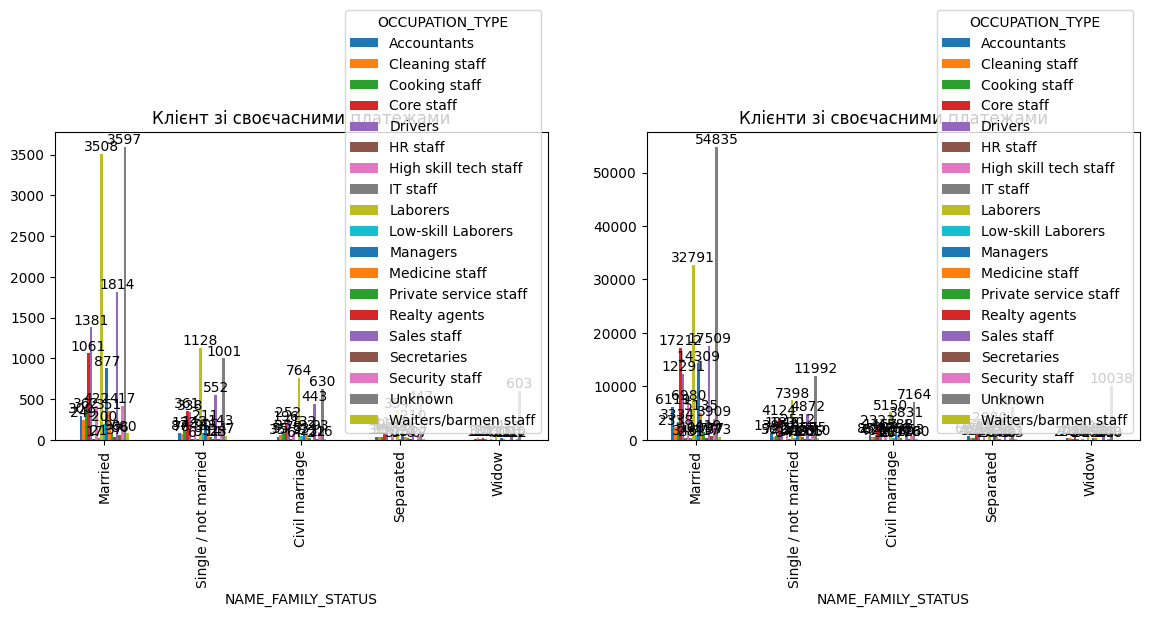

In [475]:
bi_countplot_target(df_0, df_1, 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE')

> через реалізацію `bi_countplot_target` функції, ми не зможемо показати більш читаєму версію результатів. Тому, через складну читаємость, результат `bi_countplot_target` буде пропушен, а більшіть інтерпретації та аналізу буде грунтуватися на попередніх результату аналізів датасету та резутату `categoricals_analysis`

----- Аналіз: NAME_FAMILY_STATUS vs OCCUPATION_TYPE -----
Крос-таблиця (%):
OCCUPATION_TYPE       Accountants  Cleaning staff  Cooking staff  Core staff  \
NAME_FAMILY_STATUS                                                             
Civil marriage               2.99            1.80           2.37        8.46   
Married                      3.27            1.32           1.88        9.30   
Separated                    3.70            2.25           2.10        8.35   
Single / not married         3.26            1.41           1.86        9.87   
Widow                        1.82            2.77           1.77        4.00   

OCCUPATION_TYPE       Drivers  HR staff  High skill tech staff  IT staff  \
NAME_FAMILY_STATUS                                                         
Civil marriage           5.77      0.15                   3.31      0.14   
Married                  6.96      0.18                   3.77      0.15   
Separated                4.13      0.23                   3

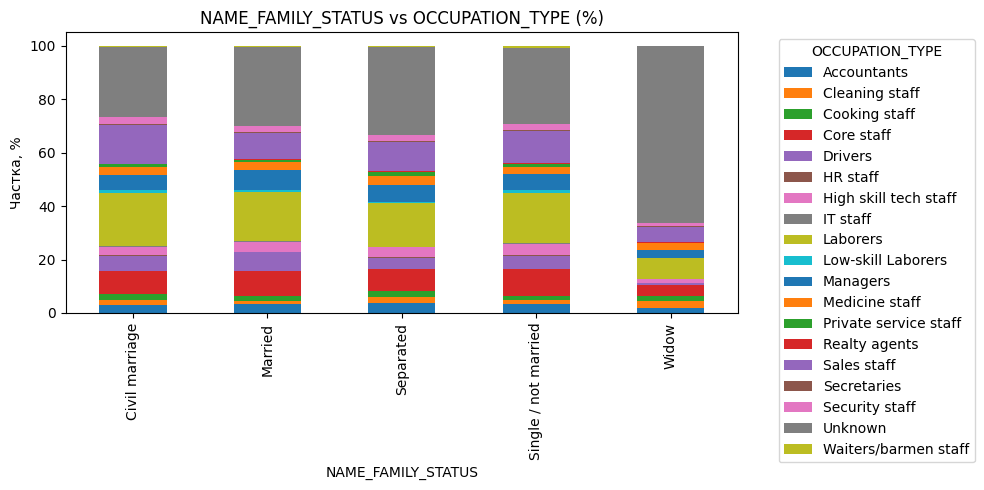

TARGET rate за NAME_FAMILY_STATUS:
NAME_FAMILY_STATUS
Civil marriage         9.94
Single / not married   9.81
Separated              8.19
Married                7.56
Widow                  5.82
Name: TARGET, dtype: float64


OCCUPATION_TYPE       Accountants  Cleaning staff  Cooking staff  Core staff  \
NAME_FAMILY_STATUS                                                             
Civil marriage               2.99            1.80           2.37        8.46   
Married                      3.27            1.32           1.88        9.30   
Separated                    3.70            2.25           2.10        8.35   
Single / not married         3.26            1.41           1.86        9.87   
Widow                        1.82            2.77           1.77        4.00   

OCCUPATION_TYPE       Drivers  HR staff  High skill tech staff  IT staff  \
NAME_FAMILY_STATUS                                                         
Civil marriage           5.77      0.15                   3.31      0.14   
Married                  6.96      0.18                   3.77      0.15   
Separated                4.13      0.23                   3.80      0.14   
Single / not married     5.03      0.20                   4.34      0.33   
Widow                    0.69      0.12                   1.67      0.02   

OCCUPATION_TYPE       Laborers  Low-skill Laborers  Managers  Medicine staff  \
NAME_FAMILY_STATUS                                                             
Civil marriage           19.86                1.10      5.78            2.83   
Married                  18.48                0.62      7.73            2.79   
Separated                16.36                0.46      6.47            3.34   
Single / not married     18.76                0.97      5.99            2.49   
Widow                     7.54                0.15      2.87            2.58   

OCCUPATION_TYPE       Private service staff  Realty agents  Sales staff  \
NAME_FAMILY_STATUS                                                        
Civil marriage                         1.01           0.27        14.35   
Married                                0.77           0.23         9.84   
Separated                              1.35           0.26        10.85   
Single / not married                   1.14           0.33        11.94   
Widow                                  0.36           0.11         5.82   

OCCUPATION_TYPE       Secretaries  Security staff  Unknown  \
NAME_FAMILY_STATUS                                           
Civil marriage               0.46            2.51    26.18   
Married                      0.43            2.20    29.75   
Separated                    0.40            2.26    33.03   
Single / not married         0.48            2.24    28.59   
Widow                        0.16            1.15    66.14   

OCCUPATION_TYPE       Waiters/barmen staff  
NAME_FAMILY_STATUS                          
Civil marriage                        0.66  
Married                               0.33  
Separated                             0.51  
Single / not married                  0.79  
Widow                                 0.26

In [476]:
categoricals_analysis(df, 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', target='TARGET')

- Професійний склад клієнтів відрізняється залежно від сімейного стану
- У всіх категоріях сімейного стану найчастіше зустрічаються **Laborers**, **Core staff**, **Sales staff**
- У деяких сімейних статусах значну частку займає категорія **Unknown**, що може свідчити про відсутність або неповноту інформації про професію


**Вплив сімейного стану на професію**:
- **Married**:
  - частіше представлені у стабільних професіях - **Core staff**, **Managers**, **IT staff**
  - але цілкому спостерігається ширший розподіл професій
- **Single / not married** та **Civil marriage**:
  - частіше зосереджені у менш стабільних та низькооплачуваних професіях. Частіше зустрічаються **Laborers** та **Drivers**
  - професійний склад менш різноманітний
- **Widow**:
  - мають найбільшу частку категорії **Unknown**
  - професійний склад є менш стабільним і менш різноманітним


**Клієнти з та без дефолту**:
- *З дефолтом*:
  - **частіше зустрічаються професії з нижчим рівнем доходу**(**Laborers**, **Cleaning staff**,  **Drivers**)
  - більша частка клієнтів з нестабільною або невизначеною професією
- *Без дефолту*:
  - **частіше представлені стабільні та кваліфіковані професії**(**Managers**, **IT staff**, **High skill tech staff**, **Core staff**)
  - спостерігається ширший розподіл професій


**TARGET**:
- **Сімейний стан у поєднанні з професією дозволяє краще сегментувати клієнтів за рівнем кредитного ризику**
- Найвищий TARGET rate:
  - **Civil marriage** -> `9.9%`
  - **Single / not married** -> `9.8%`
- Найнижчий TARGET rate:
  - **Widow** -> `5.8%`
  - **Married** -> `7.6%`

### 2.3 - `OCCUPATION_TYPE` vs `NAME_CONTRACT_TYPE`

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: OCCUPATION_TYPE


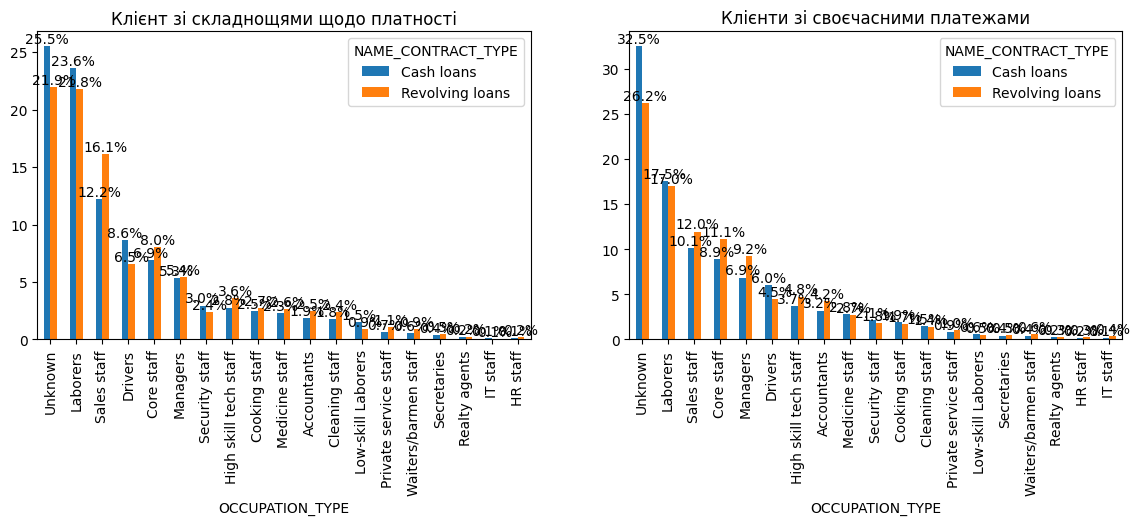

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ OCCUPATION_TYPE


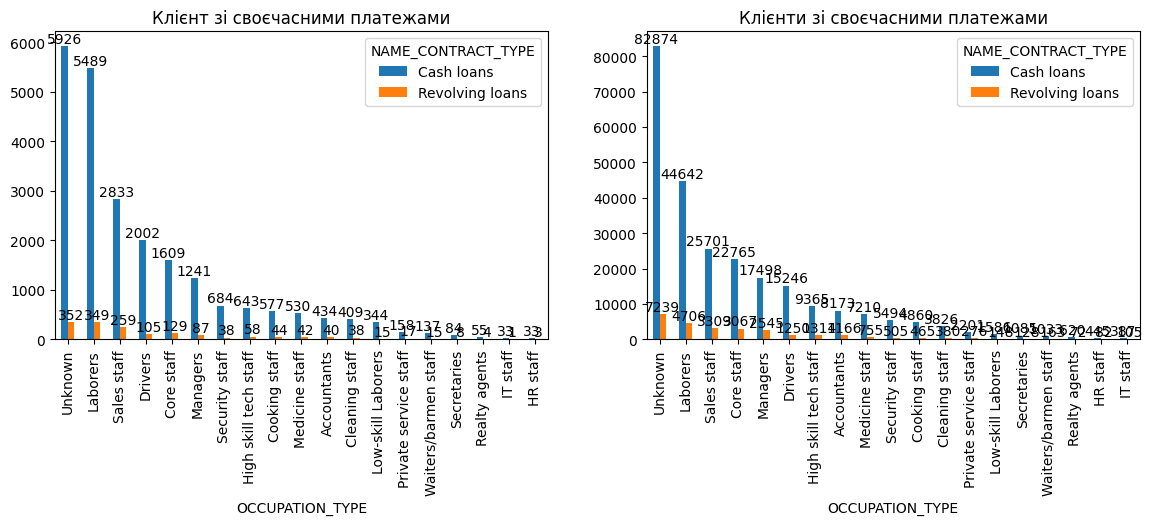

In [477]:
bi_countplot_target(df_0, df_1, 'OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE')

----- Аналіз: OCCUPATION_TYPE vs NAME_CONTRACT_TYPE -----
Крос-таблиця (%):
NAME_CONTRACT_TYPE     Cash loans  Revolving loans
OCCUPATION_TYPE                                   
Accountants                 87.71            12.29
Cleaning staff              91.02             8.98
Cooking staff               91.44             8.56
Core staff                  88.41            11.59
Drivers                     92.72             7.28
HR staff                    84.90            15.10
High skill tech staff       87.94            12.06
IT staff                    79.85            20.15
Laborers                    90.84             9.16
Low-skill Laborers          92.21             7.79
Managers                    87.68            12.32
Medicine staff              90.66             9.34
Private service staff       88.95            11.05
Realty agents               89.88            10.12
Sales staff                 88.89            11.11
Secretaries                 89.58            10.42
Securi

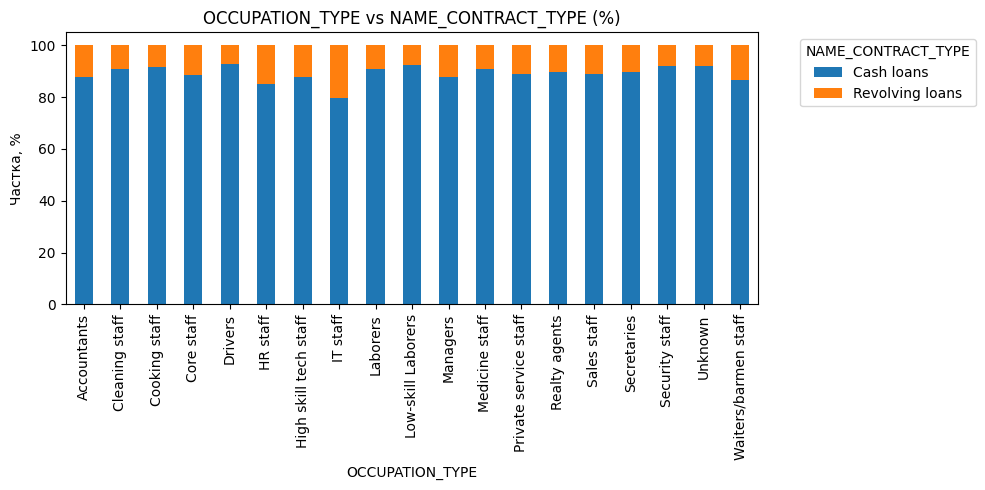

TARGET rate за OCCUPATION_TYPE:
OCCUPATION_TYPE
Low-skill Laborers      17.15
Drivers                 11.33
Waiters/barmen staff    11.28
Security staff          10.74
Laborers                10.58
Cooking staff           10.44
Sales staff              9.63
Cleaning staff           9.61
Realty agents            7.86
Secretaries              7.05
Medicine staff           6.70
Private service staff    6.60
Unknown                  6.51
IT staff                 6.46
HR staff                 6.39
Core staff               6.30
Managers                 6.21
High skill tech staff    6.16
Accountants              4.83
Name: TARGET, dtype: float64


NAME_CONTRACT_TYPE     Cash loans  Revolving loans
OCCUPATION_TYPE                                   
Accountants                 87.71            12.29
Cleaning staff              91.02             8.98
Cooking staff               91.44             8.56
Core staff                  88.41            11.59
Drivers                     92.72             7.28
HR staff                    84.90            15.10
High skill tech staff       87.94            12.06
IT staff                    79.85            20.15
Laborers                    90.84             9.16
Low-skill Laborers          92.21             7.79
Managers                    87.68            12.32
Medicine staff              90.66             9.34
Private service staff       88.95            11.05
Realty agents               89.88            10.12
Sales staff                 88.89            11.11
Secretaries                 89.58            10.42
Security staff              91.92             8.08
Unknown                     92.12             7.88
Waiters/barmen staff        86.80            13.20

In [478]:
categoricals_analysis(df, 'OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE', target='TARGET')

- **Для всіх типів професій переважають Cash loans**
- Частка **Revolving loans** значно менша, але відрізняється залежно від професії
- Найбільша частка клієнтів з **Unknown** професією присутня в обох типах контрактів, що може впливати на стабільність оцінки ризику

**Вплив професії на тип контракту**

- **IT staff**:
  - мають найвищу частку **Revolving loans** -> `20%`
- **HR staff**, **Waiters/barmen staff**, **Managers**:
  - також мають підвищену частку **Revolving loans**
- **Drivers**, **Low-skill Laborers**, **Security staff**:
  - переважно користуються **Cash loans**
  - беруть кредити обережніше і на менш ризикованих умовах

**Клієнти з та без дефолту:**
- *З дефолтом*:
  - частіше зустрічаються професії з нижчим рівнем доходу(Laborers, Cleaning staff,  Drivers)
  - більша частка клієнтів з **Cash loans**
- *Без дефолту*:
  - вища частка **Revolving loans** серед професій з вищим доходом
  - у цій групі клієнтів використовуються різні типи кредитних контрактів, нема домінуючого типу кредита

**TARGET:**
- Професії з вищим рівнем дефолту частіше користуються **Cash loans**
- Найвищий TARGET rate:
  - **Low-skill Laborers** -> `17.1%`
  - **Drivers** -> `11.3%`
  - **Waiters/barmen staff** -> `11.3%`
- Найнижчий TARGET rate:
  - **Accountants** -> `4.8%`
  - **High skill tech staff** -> `6.2%`
  - **Managers** -> `6.2%`

## Звіт аналізу ДЗ
###  **Висновок**

- Категоріальні змінні демонструють значущі відмінності у поведінці клієнтів
- Найбільш інформативними щодо TARGET є:
  - рівень освіти
  - сімейний стан
  - тип контракту
- Освіта та стабільність зайнятості мають сильніший вплив на кредитний ризик, ніж гендер


`NAME_EDUCATION_TYPE` vs `CODE_GENDER`:
- Рівень освіти є одним з найсильніших категоріальних факторів, пов’язаних з кредитним ризиком
- Стать клієнта має другорядний вплив порівняно з рівнем освіти
- Клієнти з вищою освітою демонструють стабільно нижчий рівень дефолту незалежно від статі
- Змінна `NAME_EDUCATION_TYPE` є інформативною для прогнозування TARGET

`NAME_FAMILY_STATUS` vs `OCCUPATION_TYPE`:
- Клієнти з більш стабільним сімейним станом та професійною зайнятістю демонструють нижчий рівень дефолту
- Сімейний стан та професія є інформативними категоріальними змінними щодо TARGET
- Поєднання `NAME_FAMILY_STATUS` та `OCCUPATION_TYPE` доцільно використовувати для побудови моделей кредитного скорингу

`OCCUPATION_TYPE` vs `NAME_CONTRACT_TYPE`:
- Тип професії є важливим фактором кредитного ризику
- Тип кредитного контракту виступає додатковим індикатором фінансової поведінки клієнтів
- Поєднання `OCCUPATION_TYPE` та `NAME_CONTRACT_TYPE` дозволяє ефективніше сегментувати клієнтів за рівнем ризику
- Змінна `OCCUPATION_TYPE` є інформативною для прогнозування TARGET

---



# ДЗ 9. Висновок з проведеного аналізу
Напишіть Ваш висновок з проведеного ананлізу, яким категоріям осіб Ви б видали кредит? Категорія може бути, наприклад, люди з такою-то освітою, з таким-то доходом, з таким-то досвідом роботи.

###  **Висновок**

На основі EDA можна зробити висновок


## Підсумкова таблиця


| Критерій               | Доцільно видавати кредит                                           | Особи з високим ризиком                        |
| ---------------------- | ------------------------------------------------------------------ | ---------------------------------------------- |
| **Професія**           | Managers, IT staff, High skill tech staff, Accountants, Core staff | Low-skill Laborers, Cleaning staff, Drivers    |
| **Рівень освіти**      | Higher education, Academic degree                                  | Lower secondary, Secondary / secondary special |
| **Рівень доходу**      | Середній та вище середнього, стабільний                            | Низький або нестабільний                       |
| **Тип контракту**      | Permanent contract                                                 | Temporary contract                             |
| **Сімейний стан**      | Married                                                            | Single / not married, Civil marriage           |
| **Тип кредиту**        | Використання різних типів кредитів (cash + revolving)              | Лише cash loans                                |
| **Кредитна поведінка** | Обережна, без перевантаження боргом                                | Підвищене кредитне навантаження                |
| **Загальний ризик**\*  | Низький `≈5–7%`                                                    | Підвищений `≈9–15%`                            |


\* -  значення є **орієнтовними** і відображають **загальні тенденції**, виявлені під час аналізу


# Висновок: Категорії клієнтів, на яких слід орієнтуватися при наданні кредиту



- Рішення про видачу кредиту доцільно приймати **на основі сукупності ознак**, а не однієї характеристики
- Найкращі результати дає **поєднання факторів -> освіта, дохід, професія, тип контракту та сімейний стан**
- Інші розглянуті фічі не додані до висновку, бо мають невеликий, але не ключовий влип. Як для прикладу, **стать клієнта**:
  - Змінна `CODE_GENDER` має слабкий, але помітний вплив: у чоловіків рівень дефолту вищий(`7.0%` vs `10.1%`), але вплив слабший, ніж у освіти, професії, тип контракту. Це **не є ключовим фактор, а більш другорядним**

---

- **Найбільш надійними є клієнти з вищою освітою, стабільним доходом, кваліфікованою професією та постійним контрактом**
- **Найменш надійними є клієнти з низьким рівнем освіти, низькокваліфікованою професією, тимчасовим контрактом і без стабільного сімейного стану**

